In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from scipy.stats import kurtosis, skew

In [2]:
def calculate_mean_of_range(range_value, delimiter='-'):
    nums = str(range_value).split(delimiter)
    sum=0
    for x in nums:
        sum = sum + float(x)
    return round(sum/len(nums),2)

In [3]:
gold_master_data = pd.read_csv('final_merged_gold_dataset_new.csv')
gold_master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Columns: 105 entries, Unnamed: 0 to date_10YrBondRate
dtypes: float64(26), int64(23), object(56)
memory usage: 642.4+ KB


In [4]:
columns_to_consider=['monday_date',
 ' Inflation Rate (%)_inflation',
 '1 to 3 yrs._interest',
 'Over 3 yrs. & upto 5 yrs._interest',
 'Above 5 yrs._interest',
 'Uncertainty Index_uncertainty',
 'Price_10YrBondRate',                     
 'Price_fxrate',
 'Price_nifty',
 'Price_snp',
 'Adj Close_wpm',
 'Adj Close_ego',
 'Spot Price(Rs.)_gold',
 'Spot Price(Rs.)_silver',
 'Spot Price(Rs.)_copper',
 'Spot Price(Rs.)_crudeoil', 'pd_price_inr', 'rh_price_inr', 'gdp_per_capita', 'gni_per_capita']

In [5]:
model_input_df = gold_master_data[columns_to_consider]
model_input_df.rename(columns={'monday_date':'date', ' Inflation Rate (%)_inflation': 'inflation_rate', '1 to 3 yrs._interest':'interest_rate_1_to_3', 
                               'Over 3 yrs. & upto 5 yrs._interest': 'interest_rate_1_to_5' ,'Above 5 yrs._interest':'interest_rate_above_5', 
                               'Uncertainty Index_uncertainty': 'uncertainty', 'Price_fxrate': 'fx_rate', 'Price_nifty': 'price_nifty',
                              'Price_snp': 'price_snp', 'Adj Close_wpm': 'wpm_price', 'Adj Close_ego': 'ego_price', 'Spot Price(Rs.)_gold': 'gold_price', 
                               'Spot Price(Rs.)_silver': 'silver_price',
                              'Spot Price(Rs.)_copper': 'copper_price', 'Spot Price(Rs.)_crudeoil': 'oil_price'}, inplace=True)
model_input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   783 non-null    object 
 1   inflation_rate         783 non-null    float64
 2   interest_rate_1_to_3   783 non-null    object 
 3   interest_rate_1_to_5   783 non-null    object 
 4   interest_rate_above_5  783 non-null    object 
 5   uncertainty            783 non-null    float64
 6   Price_10YrBondRate     783 non-null    float64
 7   fx_rate                783 non-null    float64
 8   price_nifty            783 non-null    object 
 9   price_snp              783 non-null    object 
 10  wpm_price              783 non-null    float64
 11  ego_price              783 non-null    float64
 12  gold_price             783 non-null    int64  
 13  silver_price           783 non-null    int64  
 14  copper_price           783 non-null    float64
 15  oil_pr

C:\Users\Surya\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [6]:
model_input_df.head(5)

,date,inflation_rate,interest_rate_1_to_3,interest_rate_1_to_5,interest_rate_above_5,uncertainty,Price_10YrBondRate,fx_rate,price_nifty,price_snp,wpm_price,ego_price,gold_price,silver_price,copper_price,oil_price,pd_price_inr,rh_price_inr,gdp_per_capita,gni_per_capita
0,2006-01-02,5.7965,6.00-6.50,6.25-7.00,6.25-7.00,39.99015,7.180,45.075,"2,835.95","1,273.46",5.048476,23.455441,7640,13300,202.90,2755,11809.650,135225.00,36364.404998,35609.25
1,2006-01-09,5.7965,6.00-6.50,6.25-7.00,6.25-7.00,39.99015,7.187,44.250,"2,910.10","1,290.15",5.161630,25.513779,7845,13500,205.40,2816,12124.500,132750.00,35698.833525,34957.50
2,2006-01-16,5.7965,6.00-6.50,6.25-7.00,6.25-7.00,39.99015,7.202,44.170,"2,833.10","1,287.61",5.266082,24.843624,8010,13600,206.10,2830,12588.450,136485.30,35634.293261,34894.30
3,2006-01-23,5.7965,6.00-6.50,6.25-7.00,6.25-7.00,39.99015,7.205,44.095,"2,884.05","1,263.82",5.031067,22.306606,8030,13275,204.40,3032,12214.315,138458.30,35573.786764,34835.05
4,2006-01-30,5.7965,6.00-6.50,6.25-7.00,6.25-7.00,39.99015,7.425,44.045,"2,974.50","1,285.19",6.484680,23.790525,8080,14170,217.35,2982,12200.465,147550.75,35533.449099,34795.55


In [7]:
model_input_df['interest_rate_1_to_3']=model_input_df['interest_rate_1_to_3'].apply(lambda x: calculate_mean_of_range(x))
model_input_df['interest_rate_1_to_5']=model_input_df['interest_rate_1_to_5'].apply(lambda x: calculate_mean_of_range(x))
model_input_df['interest_rate_above_5']=model_input_df['interest_rate_above_5'].apply(lambda x: calculate_mean_of_range(x))
model_input_df['price_nifty'] = model_input_df['price_nifty'].apply(lambda x: str(x).replace(',', ''))
model_input_df['price_snp'] = model_input_df['price_snp'].apply(lambda x: str(x).replace(',', ''))
model_input_df['price_nifty'] = pd.to_numeric(model_input_df['price_nifty'],errors = 'coerce')
model_input_df['price_snp'] = pd.to_numeric(model_input_df['price_snp'],errors = 'coerce')

<ipython-input-7-2d3330926d1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_input_df['interest_rate_1_to_3']=model_input_df['interest_rate_1_to_3'].apply(lambda x: calculate_mean_of_range(x))
<ipython-input-7-2d3330926d1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_input_df['interest_rate_1_to_5']=model_input_df['interest_rate_1_to_5'].apply(lambda x: calculate_mean_of_range(x))
<ipython-input-7-2d3330926d1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [8]:
model_input_df.describe()

,inflation_rate,interest_rate_1_to_3,interest_rate_1_to_5,interest_rate_above_5,uncertainty,Price_10YrBondRate,fx_rate,price_nifty,price_snp,wpm_price,ego_price,gold_price,silver_price,copper_price,oil_price,pd_price_inr,rh_price_inr,gdp_per_capita,gni_per_capita
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,7.830000e+02,783.000000,783.000000
mean,7.114451,7.526003,7.552069,7.514049,98.966078,7.604040,56.854672,6997.873946,1851.830741,19.833462,33.232717,24751.014049,37335.080460,373.362133,3899.372925,48631.705093,1.769603e+05,89149.554824,87652.874815
std,2.722230,1.199070,1.101480,1.035466,50.631470,0.770052,10.983243,2715.865147,696.185484,9.606632,24.704446,10127.085156,13212.898244,75.948783,1106.180754,40117.503290,2.042104e+05,37275.203008,37560.843223
min,3.328200,5.170000,5.300000,5.380000,27.739460,5.172000,39.190000,2524.200000,676.530000,2.254405,2.660000,7640.000000,13275.000000,137.600000,1295.000000,8398.720000,4.172750e+04,35533.449099,34795.550000
25%,4.907000,6.580000,6.700000,6.620000,63.247227,7.176000,46.005000,4977.825000,1297.665000,12.657355,14.188278,15782.500000,25557.500000,321.800000,3072.500000,18560.540000,6.556171e+04,53858.334100,54359.200000
50%,6.623400,7.380000,7.250000,7.380000,87.388771,7.749000,58.715000,6035.650000,1642.810000,18.953203,26.997696,27505.000000,38189.000000,388.300000,3673.000000,37939.575000,9.482550e+04,86331.553328,90523.600000
75%,9.312400,8.620000,8.620000,8.380000,126.778580,8.126000,66.593500,8945.650000,2358.000000,25.031256,45.115828,30315.500000,45037.500000,428.625000,4678.500000,52943.250000,2.164730e+05,127161.187484,117112.450000
max,11.989400,9.120000,9.120000,8.880000,283.689087,9.383000,76.570000,13873.200000,3735.360000,55.573048,100.720306,55331.000000,73288.000000,610.500000,7291.000000,196406.210000,1.232533e+06,151296.123030,152682.400000


In [9]:
# No missing value
gold_master_data[gold_master_data.isnull().sum(axis=1)>0]

,Unnamed: 0,Unnamed: 0_x,monday_date,date_inflation,Inflation Rate (%)_inflation,Annual Change_inflation,year_inflation,date_gdp,gdp_per_capita,date_gni,...,pd_price_inr,date_rh,rh_price_inr,Unnamed: 0.1,Price_10YrBondRate,Open_10YrBondRate,High_10YrBondRate,Low_10YrBondRate,Change %_10YrBondRate,date_10YrBondRate


In [10]:
## Scatter Plot

In [11]:
def density_plot(df):
    df.plot(kind='kde', figsize=(12,6))
    plt.show()

Skewness: 0.1779347719106384
kurtosis: -0.06775521863439371


array([[<AxesSubplot:title={'center':'gold_price'}>]], dtype=object)

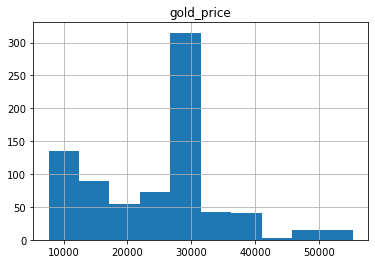

In [12]:
# Hist plot
print(f"Skewness: {skew(model_input_df['gold_price'])}")
print(f"kurtosis: {kurtosis(model_input_df['gold_price'])}")
model_input_df[['gold_price']].hist()

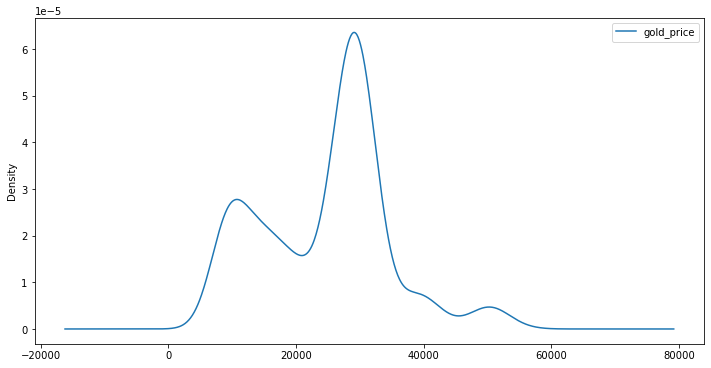

In [13]:
density_plot(model_input_df[['gold_price']])

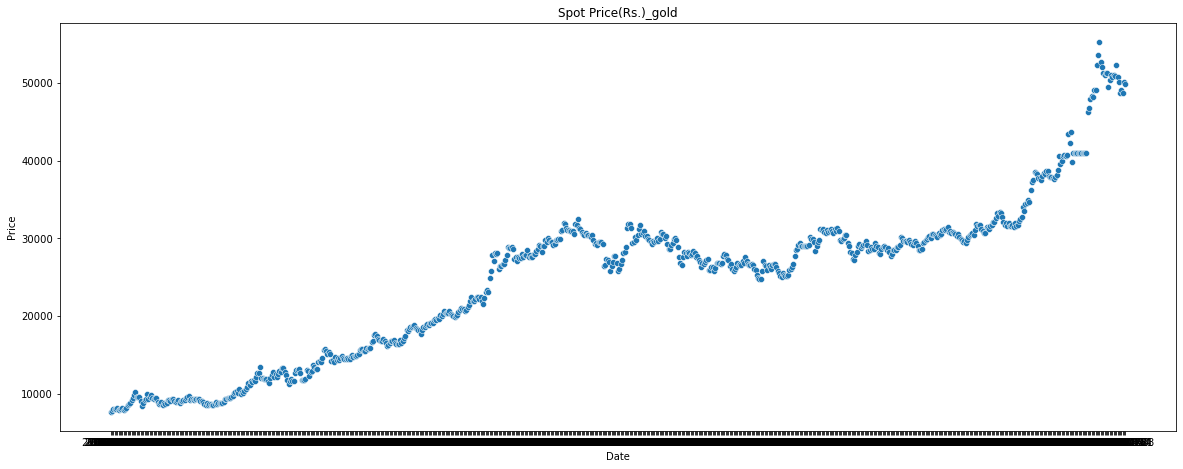

In [14]:
# Scatter Plot
plt.figure(figsize=[20, 7.5]); # Set dimensions for figure
sns.scatterplot(x=model_input_df['date'], y=model_input_df['gold_price']);
plt.title('Spot Price(Rs.)_gold');
plt.ylabel('Price');
plt.xlabel('Date');

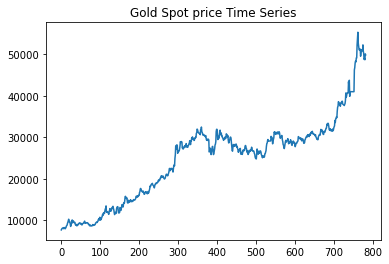

In [15]:
plt.plot(model_input_df['gold_price'])
plt.title('Gold Spot price Time Series')
plt.show()

So overall, what this means to us is, if a series is stationary according to the KPSS test by setting regression='ct' and is not stationary according to the ADF test, it means the series is stationary around a deterministic trend and so is fairly easy to model this series and produce fairly accurate forecasts.

In [16]:
model_input_df.columns

Index(['date', 'inflation_rate', 'interest_rate_1_to_3',
       'interest_rate_1_to_5', 'interest_rate_above_5', 'uncertainty',
       'Price_10YrBondRate', 'fx_rate', 'price_nifty', 'price_snp',
       'wpm_price', 'ego_price', 'gold_price', 'silver_price', 'copper_price',
       'oil_price', 'pd_price_inr', 'rh_price_inr', 'gdp_per_capita',
       'gni_per_capita'],
      dtype='object')

In [17]:
model_input_df.head(5)

,date,inflation_rate,interest_rate_1_to_3,interest_rate_1_to_5,interest_rate_above_5,uncertainty,Price_10YrBondRate,fx_rate,price_nifty,price_snp,wpm_price,ego_price,gold_price,silver_price,copper_price,oil_price,pd_price_inr,rh_price_inr,gdp_per_capita,gni_per_capita
0,2006-01-02,5.7965,6.25,6.62,6.62,39.99015,7.180,45.075,2835.95,1273.46,5.048476,23.455441,7640,13300,202.90,2755,11809.650,135225.00,36364.404998,35609.25
1,2006-01-09,5.7965,6.25,6.62,6.62,39.99015,7.187,44.250,2910.10,1290.15,5.161630,25.513779,7845,13500,205.40,2816,12124.500,132750.00,35698.833525,34957.50
2,2006-01-16,5.7965,6.25,6.62,6.62,39.99015,7.202,44.170,2833.10,1287.61,5.266082,24.843624,8010,13600,206.10,2830,12588.450,136485.30,35634.293261,34894.30
3,2006-01-23,5.7965,6.25,6.62,6.62,39.99015,7.205,44.095,2884.05,1263.82,5.031067,22.306606,8030,13275,204.40,3032,12214.315,138458.30,35573.786764,34835.05
4,2006-01-30,5.7965,6.25,6.62,6.62,39.99015,7.425,44.045,2974.50,1285.19,6.484680,23.790525,8080,14170,217.35,2982,12200.465,147550.75,35533.449099,34795.55


In [18]:
model_input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   783 non-null    object 
 1   inflation_rate         783 non-null    float64
 2   interest_rate_1_to_3   783 non-null    float64
 3   interest_rate_1_to_5   783 non-null    float64
 4   interest_rate_above_5  783 non-null    float64
 5   uncertainty            783 non-null    float64
 6   Price_10YrBondRate     783 non-null    float64
 7   fx_rate                783 non-null    float64
 8   price_nifty            783 non-null    float64
 9   price_snp              783 non-null    float64
 10  wpm_price              783 non-null    float64
 11  ego_price              783 non-null    float64
 12  gold_price             783 non-null    int64  
 13  silver_price           783 non-null    int64  
 14  copper_price           783 non-null    float64
 15  oil_pr

In [19]:
model_input_df.head(5)

,date,inflation_rate,interest_rate_1_to_3,interest_rate_1_to_5,interest_rate_above_5,uncertainty,Price_10YrBondRate,fx_rate,price_nifty,price_snp,wpm_price,ego_price,gold_price,silver_price,copper_price,oil_price,pd_price_inr,rh_price_inr,gdp_per_capita,gni_per_capita
0,2006-01-02,5.7965,6.25,6.62,6.62,39.99015,7.180,45.075,2835.95,1273.46,5.048476,23.455441,7640,13300,202.90,2755,11809.650,135225.00,36364.404998,35609.25
1,2006-01-09,5.7965,6.25,6.62,6.62,39.99015,7.187,44.250,2910.10,1290.15,5.161630,25.513779,7845,13500,205.40,2816,12124.500,132750.00,35698.833525,34957.50
2,2006-01-16,5.7965,6.25,6.62,6.62,39.99015,7.202,44.170,2833.10,1287.61,5.266082,24.843624,8010,13600,206.10,2830,12588.450,136485.30,35634.293261,34894.30
3,2006-01-23,5.7965,6.25,6.62,6.62,39.99015,7.205,44.095,2884.05,1263.82,5.031067,22.306606,8030,13275,204.40,3032,12214.315,138458.30,35573.786764,34835.05
4,2006-01-30,5.7965,6.25,6.62,6.62,39.99015,7.425,44.045,2974.50,1285.19,6.484680,23.790525,8080,14170,217.35,2982,12200.465,147550.75,35533.449099,34795.55


<AxesSubplot:>

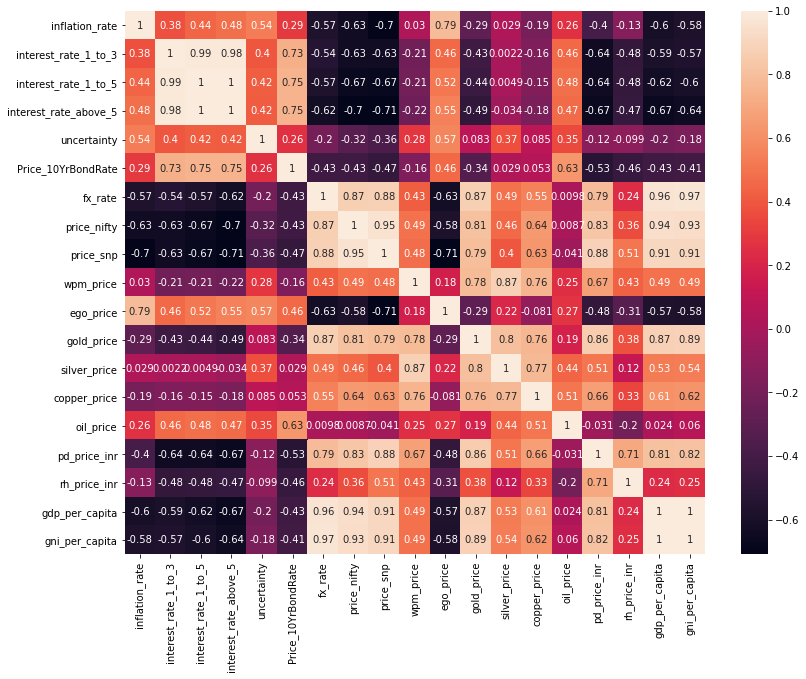

In [20]:
fig, ax = plt.subplots(figsize=(13,10))  
sns.heatmap(model_input_df.corr(), ax=ax, annot=True)

## Models

In [21]:
#!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import Conv1D
import numpy as np
from matplotlib import pyplot
from sklearn import metrics # for the evaluation
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

In [22]:
model_input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   783 non-null    object 
 1   inflation_rate         783 non-null    float64
 2   interest_rate_1_to_3   783 non-null    float64
 3   interest_rate_1_to_5   783 non-null    float64
 4   interest_rate_above_5  783 non-null    float64
 5   uncertainty            783 non-null    float64
 6   Price_10YrBondRate     783 non-null    float64
 7   fx_rate                783 non-null    float64
 8   price_nifty            783 non-null    float64
 9   price_snp              783 non-null    float64
 10  wpm_price              783 non-null    float64
 11  ego_price              783 non-null    float64
 12  gold_price             783 non-null    int64  
 13  silver_price           783 non-null    int64  
 14  copper_price           783 non-null    float64
 15  oil_pr

In [23]:
model_input_df.columns

Index(['date', 'inflation_rate', 'interest_rate_1_to_3',
       'interest_rate_1_to_5', 'interest_rate_above_5', 'uncertainty',
       'Price_10YrBondRate', 'fx_rate', 'price_nifty', 'price_snp',
       'wpm_price', 'ego_price', 'gold_price', 'silver_price', 'copper_price',
       'oil_price', 'pd_price_inr', 'rh_price_inr', 'gdp_per_capita',
       'gni_per_capita'],
      dtype='object')

In [24]:
# Transforming the dataset to ln scale
cols=['inflation_rate', 'interest_rate_1_to_3',
       'interest_rate_1_to_5', 'interest_rate_above_5', 'uncertainty',
       'Price_10YrBondRate', 'fx_rate', 'price_nifty', 'price_snp',
       'wpm_price', 'ego_price', 'gold_price', 'silver_price', 'copper_price',
       'oil_price', 'pd_price_inr', 'rh_price_inr', 'gdp_per_capita',
       'gni_per_capita']
model_input_df[cols] = np.log(model_input_df[cols])

C:\Users\Surya\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Skewness: -0.7001179876087381
kurtosis: -0.5568074112254298


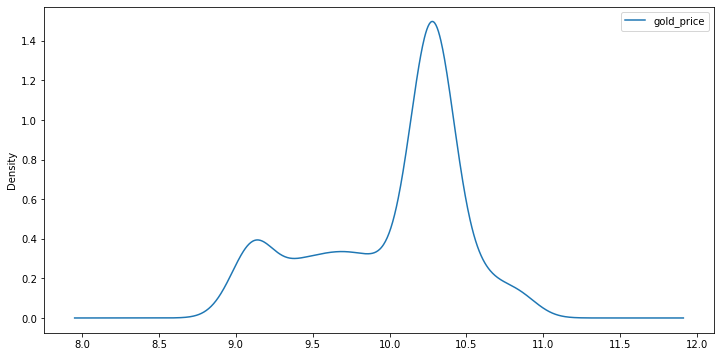

In [25]:
print(f"Skewness: {skew(model_input_df['gold_price'])}")
print(f"kurtosis: {kurtosis(model_input_df['gold_price'])}")
density_plot(model_input_df[['gold_price']])

In [26]:
model_input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   783 non-null    object 
 1   inflation_rate         783 non-null    float64
 2   interest_rate_1_to_3   783 non-null    float64
 3   interest_rate_1_to_5   783 non-null    float64
 4   interest_rate_above_5  783 non-null    float64
 5   uncertainty            783 non-null    float64
 6   Price_10YrBondRate     783 non-null    float64
 7   fx_rate                783 non-null    float64
 8   price_nifty            783 non-null    float64
 9   price_snp              783 non-null    float64
 10  wpm_price              783 non-null    float64
 11  ego_price              783 non-null    float64
 12  gold_price             783 non-null    float64
 13  silver_price           783 non-null    float64
 14  copper_price           783 non-null    float64
 15  oil_pr

In [27]:
model_input_df.describe()

,inflation_rate,interest_rate_1_to_3,interest_rate_1_to_5,interest_rate_above_5,uncertainty,Price_10YrBondRate,fx_rate,price_nifty,price_snp,wpm_price,ego_price,gold_price,silver_price,copper_price,oil_price,pd_price_inr,rh_price_inr,gdp_per_capita,gni_per_capita
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,1.885303,2.004955,2.010765,2.006861,4.470951,2.023299,4.021311,8.774886,7.454821,2.861266,3.177545,10.015348,10.456501,5.898413,8.228683,10.509821,11.701760,11.300131,11.277277
std,0.398762,0.166353,0.150453,0.142580,0.501663,0.105195,0.197507,0.403361,0.372104,0.528906,0.877603,0.478857,0.393117,0.230580,0.284266,0.746734,0.791058,0.457479,0.472448
min,1.202432,1.642873,1.667707,1.682688,3.322856,1.643259,3.668422,7.833679,6.516977,0.812886,0.978326,8.941153,9.493638,4.924351,7.166266,9.035835,10.638916,10.478230,10.457245
25%,1.590663,1.884035,1.902108,1.890095,4.147051,1.970742,3.828750,8.512748,7.168322,2.538238,2.652385,9.666657,10.148686,5.773929,8.030247,9.828787,11.090747,10.894112,10.903369
50%,1.890609,1.998774,1.981001,1.998774,4.470367,2.047564,4.072695,8.705439,7.404163,2.941973,3.295752,10.222123,10.550303,5.961778,8.208764,10.543750,11.459794,11.365950,11.413366
75%,2.231347,2.154085,2.154085,2.125848,4.842442,2.095069,4.198607,9.098922,7.765569,3.220124,3.809230,10.319414,10.715251,6.060582,8.450733,10.876976,12.285221,11.753211,11.670890
max,2.484023,2.210470,2.210470,2.183802,5.647879,2.238900,4.338205,9.537714,8.225599,4.017698,4.612347,10.921089,11.202152,6.414278,8.894396,12.187940,14.024582,11.926994,11.936115


In [28]:
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

In [29]:
def define_dataset(start_week=0, split_time=750, no_of_validation_steps=1):
    # Normalized train and validation data
    train_val_df = model_input_df[start_week:split_time]
    X_train_val = train_val_df.drop(columns=['gold_price', 'date'])
    X_train_val= X_scaler.fit_transform(X_train_val)

    y_train_val = train_val_df[['gold_price']]
    y_train_val = y_scaler.fit_transform(y_train_val)

    # Normalized test data
    test_df = model_input_df[split_time:]
    X_test = test_df.drop(columns=['gold_price', 'date'])
    X_test = X_scaler.transform(X_test)

    y_test = test_df[['gold_price']]
    y_test_Inverse = y_test
    y_test = y_scaler.transform(y_test)

    X_train = X_train_val[:-no_of_validation_steps]
    y_train = y_train_val[:-no_of_validation_steps]

    X_val = X_train_val[-no_of_validation_steps:]
    y_val = y_train_val[-no_of_validation_steps:]

    print('Train Input Shape', X_train.shape)
    print('Train output Shape',y_train.shape)
    print('Validation Input Shape', X_val.shape)
    print('validation output Shape',y_val.shape)
    print('Test Input Shape', X_test.shape)
    print('Test output Shape',y_test.shape)

    return X_train, y_train, X_val, y_val, X_test, y_test

In [30]:
X_train, y_train, X_val, y_val, X_test, y_test = define_dataset()

Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)


In [31]:
def plot_history(history):
    # plot history
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    pyplot.show()

### Split data into train and test dataset

In [32]:
n_features=18

In [33]:
print('X_train shape' , X_train.shape)
print('X_test shape' , X_test.shape)
print('y_train shape' , y_train.shape)
print('y_test shape' , y_test.shape)

X_train shape (749, 18)
X_test shape (33, 18)
y_train shape (749, 1)
y_test shape (33, 1)


### 2nd LSTM model

In [34]:
#from keras.optimizers import rmsprop_v2
from keras.layers import Dropout
from keras.layers.convolutional import MaxPooling1D

In [35]:
## Timeseries Generator
lookback=5
from keras.preprocessing.sequence import TimeseriesGenerator

### GRU Model

In [36]:
## Hyperparameter to Tune
#n_hidden_nodes=[128,256]
#activations=['relu']
#lookbacks=[4, 5,10]
#measures=['mae']
#optimizers=['adam', 'RMSprop']
#epochs=[10,20,50]
#batch_size=[5,10,15,20]
#config_list = np.array(np.meshgrid(n_hidden_nodes, activations, lookbacks, measures, optimizers, epochs, batch_size)).T.reshape(-1,7)
#config_list.shape

In [37]:
n_hidden_nodes=[64, 128,256]
activations=['relu']
lookbacks=[5,10]
measures=['mae']
optimizers=['adam', 'RMSprop']
epochs=[10,20]
batch_size=[5,10,50]
config_list = np.array(np.meshgrid(n_hidden_nodes, activations, lookbacks, measures, optimizers, epochs, batch_size)).T.reshape(-1,7)
config_list.shape

(72, 7)

In [38]:
n_hidden_nodes=[100]
activations=['relu']
lookbacks=[5,10]
measures=['mae']
optimizers=['adam', 'RMSprop']
epochs=[10,20]
batch_size=[5,10,50]
config_list_fixed_nodes = np.array(np.meshgrid(n_hidden_nodes, activations, lookbacks, measures, optimizers, epochs, batch_size)).T.reshape(-1,7)
config_list_fixed_nodes.shape

(24, 7)

### Predict gold price and compare it with actual

In [39]:
def plot_true_vs_pred(y_true, y_pred):
    
    print('y_true shape: ', y_true.shape)
    print('y_pred shape: ', y_pred.shape)
    fig, ax = plt.subplots() # Create the figure and axes object
    
    ax.plot(range(0,len(y_true)), y_true, label='Actual')
    ax.plot(range(0,len(y_pred)), y_pred, label='Predicted')
    plt.legend()
    plt.show()
    # Plot the first x and y axes:
    #df.plot(y = 'deaths', ax = ax) 
    # Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
    # (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html for details)
    #df.plot(x = 'year', y = 'cheese', ax = ax, secondary_y = True) 

In [40]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
     def mean_absolute_percentage_error(y_true, y_pred): 
         y_true, y_pred = np.array(y_true), np.array(y_pred)
         return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        
     mse = metrics.mean_squared_error(y_true, y_pred)
     mae = metrics.mean_absolute_error(y_true, y_pred)
     rmse = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
     mape = mean_absolute_percentage_error(y_true, y_pred)
     r2 = metrics.r2_score(y_true, y_pred)
    
     print('Evaluation metric results:-')
     print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
     print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
     print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
     print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
     print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
     return mse, mae, rmse, mape, r2

## GRU Model

In [41]:
result_df = pd.DataFrame(columns=['model_name','n_hidden_node', 'activation', 'lookback', 'measure', 'optimizer', 'epoch', 'batch_size', 'mse', 'mae', 'rmse', 
                                  'mape', 'r2', 'test_loss', 'time_taken'])

In [42]:
# Evaluate and plot actual vs predicted gold price
def evaluate_model(model, test_gen_new, lookback):
    #print('Test Gen Length: ', len(test_gen_new))

    pred = model.predict_generator(test_gen_new)
    pred_Inverse = y_scaler.inverse_transform(pred.reshape(-1, 1))
    y_test_inverse = y_scaler.inverse_transform(y_test.reshape(-1, 1))[lookback:]

    print(pred_Inverse.shape)
    #print(f'y_test_inverse = {y_test_inverse}')
    #print(f'pred_Inverse = {pred_Inverse}')
    test_loss = model.evaluate(test_gen_new, verbose = 0, steps=1) 
    mse, mae, rmse, mape, r2 = timeseries_evaluation_metrics_func(y_test_inverse, pred_Inverse)
    return mse, mae, rmse, mape, r2, test_loss
#plot_true_vs_pred(y_test_inverse, pred_Inverse)

In [43]:
X_train, y_train, X_val, y_val, X_test, y_test = define_dataset(no_of_validation_steps=1)

## GRU Model
# don't know appropriate batch size , activaation function, what dropout value to choose
def build_GRU_model(config):
    n_hidden_node, activation, lookback, measure, optimizer, epoch,batch_size = config
    #print(f'X_train shape: {X_train.shape}')
    #print(f'y_train shape: {y_train.shape}')
    train_gen_new = TimeseriesGenerator(X_train, y_train, length=int(lookback), batch_size=int(batch_size))
    #val_gen_new = TimeseriesGenerator(X_val, y_val, length=int(lookback), batch_size=int(batch_size))
    test_gen_new = TimeseriesGenerator(X_test, y_test, length=int(lookback), batch_size=int(batch_size))

    #print(f'train_gen_new length: {len(train_gen_new)}')
    #print(f'test_gen_new length: {len(test_gen_new)}')
    
    model = Sequential()
    model.add(layers.GRU(100, activation=str(activation),input_shape=(int(lookback), n_features), return_sequences=True))
    model.add(layers.GRU(100, activation=str(activation), input_shape=(int(lookback), n_features), return_sequences=False))
    model.add(layers.Dense(32))
    model.add(layers.Dense(1))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile( optimizer=str(optimizer),  loss=str(measure))
    history = model.fit_generator(train_gen_new, epochs=int(epoch),  verbose=0)
    #history = model.fit(train_gen_new, epochs=int(epoch), validation_data=val_gen_new)
    print(model.summary())
    #plot_history(history)
    mse, mae, rmse, mape, r2, test_loss = evaluate_model(model, test_gen_new, int(lookback))
    return mse, mae, rmse, mape, r2, test_loss

Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)


In [44]:
for config in config_list_fixed_nodes:
    start = datetime.now()
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    print(f"n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: {'100/100', activation, lookback, measure, optimizer, epoch, batch_size}")
    mse, mae, rmse, mape, r2, test_loss = build_GRU_model(config)
    end = datetime.now()
    timediff = divmod((end-start).total_seconds(), 60)
    
    row={'model_name':'GRU', 'n_hidden_node': 100, 'activation': activation, 'lookback': lookback,
         'measure': measure, 'optimizer': optimizer, 'epoch': epoch, 'batch_size': batch_size, 'mse': mse, 'mae': mae, 'rmse': rmse, 
                                  'mape': mape, 'r2': r2, 'test_loss': test_loss, 'time_taken': timediff}
    result_df = result_df.append(row, ignore_index=True)
    print(f'Config: {config} Result: {mse, mae, rmse, mape, r2}')

#result_df.to_csv('result_gru_df.csv')

n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 5, 100)            36000     
_________________________________________________________________
gru_1 (GRU)                  (None, 100)               60600     
_________________________________________________________________
dense (Dense)                (None, 32)                3232      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.01833753822280554
MAE is : 0.13084979492785967
RMSE is : 0.13541616677046187
MAPE is : 1.207758044987171
R2 is : -15.894050973032158

Config: ['100' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.01833753822280554, 0.13084979492785967, 0.13541616677046187, 1.207758044987171, -15.894050973032158)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 10, 100)           36000     
_________________________________________________________________
gru_3 (GRU)                  (None, 100)               60600     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                3232      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.02184447328736981
MAE is : 0.14515866066251257
RMSE is : 0.14779875942432605
MAPE is : 1.3384731633829428
R2 is : -24.646520371452972

Config: ['100' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.02184447328736981, 0.14515866066251257, 0.14779875942432605, 1.3384731633829428, -24.646520371452972)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 5, 100)            36000     
_________________________________________________________________
gru_5 (GRU)                  (None, 100)               60600     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                3232      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.032645436280551214
MAE is : 0.1762545882682899
RMSE is : 0.18068048118308522
MAPE is : 1.6277904995535533
R2 is : -29.07566543881085

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.032645436280551214, 0.1762545882682899, 0.18068048118308522, 1.6277904995535533, -29.07566543881085)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_6 (GRU)                  (None, 10, 100)           36000     
_________________________________________________________________
gru_7 (GRU)                  (None, 100)               60600     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                3232      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.08025544273460532
MAE is : 0.28160747936686886
RMSE is : 0.2832939158093681
MAPE is : 2.597148096623787
R2 is : -93.22396319361471

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.08025544273460532, 0.28160747936686886, 0.2832939158093681, 2.597148096623787, -93.22396319361471)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_8 (GRU)                  (None, 5, 100)            36000     
_________________________________________________________________
gru_9 (GRU)                  (None, 100)               60600     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                3232      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.02198884506414126
MAE is : 0.14372702080371416
RMSE is : 0.14828636169297993
MAPE is : 1.326402602835556
R2 is : -19.2579356529829

Config: ['100' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.02198884506414126, 0.14372702080371416, 0.14828636169297993, 1.326402602835556, -19.2579356529829)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_10 (GRU)                 (None, 10, 100)           36000     
_________________________________________________________________
gru_11 (GRU)                 (None, 100)               60600     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.01691444117113202
MAE is : 0.12313505178759784
RMSE is : 0.13005553110549362
MAPE is : 1.136883455463037
R2 is : -18.85841243963505

Config: ['100' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.01691444117113202, 0.12313505178759784, 0.13005553110549362, 1.136883455463037, -18.85841243963505)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_12 (GRU)                 (None, 5, 100)            36000     
_________________________________________________________________
gru_13 (GRU)                 (None, 100)               60600     
_________________________________________________________________
dense_12 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0020565518059520766
MAE is : 0.038776204023046254
RMSE is : 0.04534922056609216
MAPE is : 0.3579832353451174
R2 is : -0.8946649553660841

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.0020565518059520766, 0.038776204023046254, 0.04534922056609216, 0.3579832353451174, -0.8946649553660841)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_14 (GRU)                 (None, 10, 100)           36000     
_________________________________________________________________
gru_15 (GRU)                 (None, 100)               60600     
_________________________________________________________________
dense_14 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0016620111401422994
MAE is : 0.031084775431997846
RMSE is : 0.04076777085078726
MAPE is : 0.2864663305963172
R2 is : -0.9512854351075777

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.0016620111401422994, 0.031084775431997846, 0.04076777085078726, 0.2864663305963172, -0.9512854351075777)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_16 (GRU)                 (None, 5, 100)            36000     
_________________________________________________________________
gru_17 (GRU)                 (None, 100)               60600     
_________________________________________________________________
dense_16 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.04216767779273611
MAE is : 0.20161198642784223
RMSE is : 0.20534769975029207
MAPE is : 1.8612260708363593
R2 is : -37.84833882221566

Config: ['100' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.04216767779273611, 0.20161198642784223, 0.20534769975029207, 1.8612260708363593, -37.84833882221566)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_18 (GRU)                 (None, 10, 100)           36000     
_________________________________________________________________
gru_19 (GRU)                 (None, 100)               60600     
_________________________________________________________________
dense_18 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.035474279227688685
MAE is : 0.18651043512699542
RMSE is : 0.18834616860368752
MAPE is : 1.720058241205856
R2 is : -40.648604336070605

Config: ['100' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.035474279227688685, 0.18651043512699542, 0.18834616860368752, 1.720058241205856, -40.648604336070605)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_20 (GRU)                 (None, 5, 100)            36000     
_________________________________________________________________
gru_21 (GRU)                 (None, 100)               60600     
_________________________________________________________________
dense_20 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0010821326413875691
MAE is : 0.02606827903717227
RMSE is : 0.03289578455345866
MAPE is : 0.24058125844587352
R2 is : 0.0030502578340889652

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.0010821326413875691, 0.02606827903717227, 0.03289578455345866, 0.24058125844587352, 0.0030502578340889652)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_22 (GRU)                 (None, 10, 100)           36000     
_________________________________________________________________
gru_23 (GRU)                 (None, 100)               60600     
_________________________________________________________________
dense_22 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.01847852943872474
MAE is : 0.12949046182443122
RMSE is : 0.1359357548208886
MAPE is : 1.195467338129661
R2 is : -20.69473145222302

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.01847852943872474, 0.12949046182443122, 0.1359357548208886, 1.195467338129661, -20.69473145222302)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_24 (GRU)                 (None, 5, 100)            36000     
_________________________________________________________________
gru_25 (GRU)                 (None, 100)               60600     
_________________________________________________________________
dense_24 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.009159354996473551
MAE is : 0.08977987861141853
RMSE is : 0.09570451920611456
MAPE is : 0.8285464513972645
R2 is : -7.438352428249054

Config: ['100' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.009159354996473551, 0.08977987861141853, 0.09570451920611456, 0.8285464513972645, -7.438352428249054)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_26 (GRU)                 (None, 10, 100)           36000     
_________________________________________________________________
gru_27 (GRU)                 (None, 100)               60600     
_________________________________________________________________
dense_26 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.051498202850997384
MAE is : 0.2248990190981019
RMSE is : 0.22693215473131476
MAPE is : 2.0740581807182434
R2 is : -59.46150397569724

Config: ['100' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.051498202850997384, 0.2248990190981019, 0.22693215473131476, 2.0740581807182434, -59.46150397569724)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_28 (GRU)                 (None, 5, 100)            36000     
_________________________________________________________________
gru_29 (GRU)                 (None, 100)               60600     
_________________________________________________________________
dense_28 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0008666835356216105
MAE is : 0.022082565220514678
RMSE is : 0.029439489391319452
MAPE is : 0.20366479270326837
R2 is : 0.2015397241233885

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.0008666835356216105, 0.022082565220514678, 0.029439489391319452, 0.20366479270326837, 0.2015397241233885)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_30 (GRU)                 (None, 10, 100)           36000     
_________________________________________________________________
gru_31 (GRU)                 (None, 100)               60600     
_________________________________________________________________
dense_30 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0017375808558366085
MAE is : 0.028005666130015813
RMSE is : 0.04168429987221338
MAPE is : 0.25798700480258485
R2 is : -1.0400081169284112

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.0017375808558366085, 0.028005666130015813, 0.04168429987221338, 0.25798700480258485, -1.0400081169284112)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_32 (GRU)                 (None, 5, 100)            36000     
_________________________________________________________________
gru_33 (GRU)                 (None, 100)               60600     
_________________________________________________________________
dense_32 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.03997486455452372
MAE is : 0.19550152260425127
RMSE is : 0.199937151511478
MAPE is : 1.804728673476348
R2 is : -35.828138609374214

Config: ['100' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.03997486455452372, 0.19550152260425127, 0.199937151511478, 1.804728673476348, -35.828138609374214)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_34 (GRU)                 (None, 10, 100)           36000     
_________________________________________________________________
gru_35 (GRU)                 (None, 100)               60600     
_________________________________________________________________
dense_34 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.03243193803098573
MAE is : 0.17551797031508984
RMSE is : 0.1800886949005565
MAPE is : 1.6182232919973956
R2 is : -37.07674135490794

Config: ['100' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.03243193803098573, 0.17551797031508984, 0.1800886949005565, 1.6182232919973956, -37.07674135490794)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_36 (GRU)                 (None, 5, 100)            36000     
_________________________________________________________________
gru_37 (GRU)                 (None, 100)               60600     
_________________________________________________________________
dense_36 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.12623831145339942
MAE is : 0.3538623785242255
RMSE is : 0.35530031164269954
MAPE is : 3.266614505778927
R2 is : -115.30113282004938

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.12623831145339942, 0.3538623785242255, 0.35530031164269954, 3.266614505778927, -115.30113282004938)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_38 (GRU)                 (None, 10, 100)           36000     
_________________________________________________________________
gru_39 (GRU)                 (None, 100)               60600     
_________________________________________________________________
dense_38 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.14756322339042238
MAE is : 0.38110187441559085
RMSE is : 0.3841395884186143
MAPE is : 3.514546522302544
R2 is : -172.24671393875502

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.14756322339042238, 0.38110187441559085, 0.3841395884186143, 3.514546522302544, -172.24671393875502)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_40 (GRU)                 (None, 5, 100)            36000     
_________________________________________________________________
gru_41 (GRU)                 (None, 100)               60600     
_________________________________________________________________
dense_40 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.00725982568465411
MAE is : 0.0759698911345247
RMSE is : 0.0852046107006781
MAPE is : 0.7009966139690712
R2 is : -5.688349530982474

Config: ['100' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.00725982568465411, 0.0759698911345247, 0.0852046107006781, 0.7009966139690712, -5.688349530982474)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_42 (GRU)                 (None, 10, 100)           36000     
_________________________________________________________________
gru_43 (GRU)                 (None, 100)               60600     
_________________________________________________________________
dense_42 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.002540372267032919
MAE is : 0.035944219396558764
RMSE is : 0.05040210577974812
MAPE is : 0.3310190486530592
R2 is : -1.982525979933048

Config: ['100' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.002540372267032919, 0.035944219396558764, 0.05040210577974812, 0.3310190486530592, -1.982525979933048)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_44 (GRU)                 (None, 5, 100)            36000     
_________________________________________________________________
gru_45 (GRU)                 (None, 100)               60600     
_________________________________________________________________
dense_44 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0026523186447278612
MAE is : 0.03951440859470517
RMSE is : 0.05150066644935637
MAPE is : 0.36456706920518367
R2 is : -1.4435344502802416

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.0026523186447278612, 0.03951440859470517, 0.05150066644935637, 0.36456706920518367, -1.4435344502802416)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_46 (GRU)                 (None, 10, 100)           36000     
_________________________________________________________________
gru_47 (GRU)                 (None, 100)               60600     
_________________________________________________________________
dense_46 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.005601872755502348
MAE is : 0.06573338792824371
RMSE is : 0.07484565956354683
MAPE is : 0.605564577785751
R2 is : -5.5768829420733

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.005601872755502348, 0.06573338792824371, 0.07484565956354683, 0.605564577785751, -5.5768829420733)


In [45]:
result_df

,model_name,n_hidden_node,activation,lookback,measure,optimizer,epoch,batch_size,mse,mae,rmse,mape,r2,test_loss,time_taken
0,GRU,100,relu,5,mae,adam,10,5,0.018338,0.130850,0.135416,1.207758,-15.894051,0.094402,"(0.0, 5.626593)"
1,GRU,100,relu,10,mae,adam,10,5,0.021844,0.145159,0.147799,1.338473,-24.646520,0.105025,"(0.0, 7.624598)"
2,GRU,100,relu,5,mae,RMSprop,10,5,0.032645,0.176255,0.180680,1.627790,-29.075665,0.081481,"(0.0, 5.904241)"
3,GRU,100,relu,10,mae,RMSprop,10,5,0.080255,0.281607,0.283294,2.597148,-93.223963,0.186197,"(0.0, 7.772137)"
4,GRU,100,relu,5,mae,adam,20,5,0.021989,0.143727,0.148286,1.326403,-19.257936,0.094772,"(0.0, 9.710638)"
5,GRU,100,relu,10,mae,adam,20,5,0.016914,0.123135,0.130056,1.136883,-18.858412,0.034117,"(0.0, 13.790391)"
6,GRU,100,relu,5,mae,RMSprop,20,5,0.002057,0.038776,0.045349,0.357983,-0.894665,0.003016,"(0.0, 10.19298)"
7,GRU,100,relu,10,mae,RMSprop,20,5,0.001662,0.031085,0.040768,0.286466,-0.951285,0.037797,"(0.0, 14.653561)"
8,GRU,100,relu,5,mae,adam,10,10,0.042168,0.201612,0.205348,1.861226,-37.848339,0.139067,"(0.0, 4.301267)"
9,GRU,100,relu,10,mae,adam,10,10,0.035474,0.186510,0.188346,1.720058,-40.648604,0.108588,"(0.0, 5.087181)"


In [46]:
## GRU Model
# don't know appropriate batch size , activaation function, what dropout value to choose
def build_GRU_model2_without_val(config):
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    
    train_gen_new = TimeseriesGenerator(X_train, y_train, length=int(lookback), batch_size=int(batch_size))
    if len(X_val)>int(lookback):
        val_gen_new = TimeseriesGenerator(X_val, y_val, length=int(lookback), batch_size=int(batch_size))
    test_gen_new = TimeseriesGenerator(X_test, y_test, length=int(lookback), batch_size=int(batch_size))

    model = Sequential()
    print(f'{n_hidden_node}, {activation}, {lookback}, {measure}, {optimizer}, {epoch}')
    model.add(layers.GRU(int(n_hidden_node), dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=True))
    model.add(layers.GRU(int(n_hidden_node), dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=True))
    model.add(layers.GRU(int(int(n_hidden_node)/2), return_sequences=False))

    model.add(layers.Dense(1))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile( optimizer=str(optimizer),  loss=str(measure))
    history = model.fit_generator(train_gen_new, epochs=int(epoch), verbose=0)
    #history = model.fit(train_gen_new, epochs=int(epoch), validation_data=val_gen_new)
    #print(model.summary())
    #plot_history(history)
    mse, mae, rmse, mape, r2, test_loss = evaluate_model(model, test_gen_new, int(lookback))
    return mse, mae, rmse, mape, r2, test_loss

In [47]:
X_train, y_train, X_val, y_val, X_test, y_test = define_dataset(no_of_validation_steps=1)
for config in config_list:
    start = datetime.now()
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    
    mse, mae, rmse, mape, r2, test_loss = build_GRU_model2_without_val(config)
    end = datetime.now()
    timediff = divmod((end-start).total_seconds(), 60)
    row={'model_name':'GRU-OLD-NO-VAL', 'n_hidden_node': n_hidden_node, 'activation': activation, 'lookback': lookback,
         'measure': measure, 'optimizer': optimizer, 'epoch': epoch, 'batch_size': batch_size, 'mse': mse, 'mae': mae, 'rmse': rmse, 
                                  'mape': mape, 'r2': r2, 'test_loss': test_loss, 'time_taken': timediff}
    result_df = result_df.append(row, ignore_index=True)
    print(f'Config: {config} Result: {mse, mae, rmse, mape, r2}')

Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)
64, relu, 5, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.03910488356179265
MAE is : 0.19464256858334236
RMSE is : 0.1977495475640656
MAPE is : 1.7962923087271587
R2 is : -35.02664044434303

Config: ['64' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.03910488356179265, 0.19464256858334236, 0.1977495475640656, 1.7962923087271587, -35.02664044434303)
128, relu, 5, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.03032961007496391
MAE is : 0.1708645387327913
RMSE is : 0.1741539838044594
MAPE is : 1.5767449827666737
R2 is : -26.942135545838674

Config: ['128' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.03032961007496391, 0.1708645387327913, 0.1741539838044594, 1.5767449827666737, -26.942135545838674)
256, relu, 5, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.023394434439285693
MAE is : 0.14918922451072797
RMSE is : 0.15295239272167563
MAPE is : 1.3765905721938325
R2 is : -20.552880386693698

Config: ['256' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.023394434439285693, 0.14918922451072797, 0.15295239272167563, 1.3765905721938325, -20.552880386693698)
64, relu, 10, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.04498865861492674
MAE is : 0.20511413319403854
RMSE is : 0.2121053007704587
MAPE is : 1.8909073629979585
R2 is : -51.81896864591262

Config: ['64' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.04498865861492674, 0.20511413319403854, 0.2121053007704587, 1.8909073629979585, -51.81896864591262)
128, relu, 10, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.04163291635963418
MAE is : 0.1997342075905866
RMSE is : 0.20404145745322
MAPE is : 1.8415510345571615
R2 is : -47.87915691506779

Config: ['128' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.04163291635963418, 0.1997342075905866, 0.20404145745322, 1.8415510345571615, -47.87915691506779)
256, relu, 10, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.01837661902581198
MAE is : 0.13050064495524777
RMSE is : 0.13556038885239294
MAPE is : 1.2029749341094769
R2 is : -20.575083454926546

Config: ['256' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.01837661902581198, 0.13050064495524777, 0.13556038885239294, 1.2029749341094769, -20.575083454926546)
64, relu, 5, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.08673204364280611
MAE is : 0.2927649609652829
RMSE is : 0.294503045218222
MAPE is : 2.702215509597214
R2 is : -78.90470413714237

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.08673204364280611, 0.2927649609652829, 0.294503045218222, 2.702215509597214, -78.90470413714237)
128, relu, 5, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.005534250943074976
MAE is : 0.06400260679570982
RMSE is : 0.07439254628707755
MAPE is : 0.5901716462935865
R2 is : -4.098607915297126

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.005534250943074976, 0.06400260679570982, 0.07439254628707755, 0.5901716462935865, -4.098607915297126)
256, relu, 5, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.06896110910826259
MAE is : 0.2603423162138704
RMSE is : 0.2626044727499183
MAPE is : 2.402806874600085
R2 is : -62.53265516212661

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.06896110910826259, 0.2603423162138704, 0.2626044727499183, 2.402806874600085, -62.53265516212661)
64, relu, 10, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.1885409893481575
MAE is : 0.4318548458989044
RMSE is : 0.4342130690665097
MAPE is : 3.9827928090101534
R2 is : -220.35669102935964

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.1885409893481575, 0.4318548458989044, 0.4342130690665097, 3.9827928090101534, -220.35669102935964)
128, relu, 10, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.013566558724781748
MAE is : 0.11045619378071908
RMSE is : 0.11647557136490788
MAPE is : 1.0180836014727044
R2 is : -14.927828523418764

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.013566558724781748, 0.11045619378071908, 0.11647557136490788, 1.0180836014727044, -14.927828523418764)
256, relu, 10, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.13440760172091454
MAE is : 0.36454364190083627
RMSE is : 0.36661642314674686
MAPE is : 3.3619820307350134
R2 is : -156.801346375636

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.13440760172091454, 0.36454364190083627, 0.36661642314674686, 3.3619820307350134, -156.801346375636)
64, relu, 5, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.032392433834373374
MAE is : 0.17633617700357812
RMSE is : 0.17997898164611714
MAPE is : 1.6271223796066658
R2 is : -28.84257874145283

Config: ['64' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.032392433834373374, 0.17633617700357812, 0.17997898164611714, 1.6271223796066658, -28.84257874145283)
128, relu, 5, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.004019616248796444
MAE is : 0.052183253796966804
RMSE is : 0.06340044360094371
MAPE is : 0.48094989794640935
R2 is : -2.703201649758086

Config: ['128' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.004019616248796444, 0.052183253796966804, 0.06340044360094371, 0.48094989794640935, -2.703201649758086)
256, relu, 5, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.007177302244888331
MAE is : 0.07807499094880344
RMSE is : 0.08471896036241433
MAPE is : 0.7199210084348847
R2 is : -5.61232213946821

Config: ['256' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.007177302244888331, 0.07807499094880344, 0.08471896036241433, 0.7199210084348847, -5.61232213946821)
64, relu, 10, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.022852322935415087
MAE is : 0.14442163627233337
RMSE is : 0.15116984797047026
MAPE is : 1.331224898168667
R2 is : -25.82978701239779

Config: ['64' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.022852322935415087, 0.14442163627233337, 0.15116984797047026, 1.331224898168667, -25.82978701239779)
128, relu, 10, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.03616467979665314
MAE is : 0.18670212366459307
RMSE is : 0.19017013381878117
MAPE is : 1.721445269229106
R2 is : -41.459169645816345

Config: ['128' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.03616467979665314, 0.18670212366459307, 0.19017013381878117, 1.721445269229106, -41.459169645816345)
256, relu, 10, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0987976324886879
MAE is : 0.3123455635794623
RMSE is : 0.3143209068590378
MAPE is : 2.8805327076167933
R2 is : -114.9934350871933

Config: ['256' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.0987976324886879, 0.3123455635794623, 0.3143209068590378, 2.8805327076167933, -114.9934350871933)
64, relu, 5, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.09386654709717084
MAE is : 0.30352271379251855
RMSE is : 0.30637647934717643
MAPE is : 2.8013381850611814
R2 is : -85.47759650474565

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.09386654709717084, 0.30352271379251855, 0.30637647934717643, 2.8013381850611814, -85.47759650474565)
128, relu, 5, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.061304666372048955
MAE is : 0.2452549160499474
RMSE is : 0.24759779153306063
MAPE is : 2.2634440284437405
R2 is : -55.47890932743052

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.061304666372048955, 0.2452549160499474, 0.24759779153306063, 2.2634440284437405, -55.47890932743052)
256, relu, 5, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.044647430430286995
MAE is : 0.2085992856657747
RMSE is : 0.21129938577830035
MAPE is : 1.9250001194891615
R2 is : -40.1328912496072

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.044647430430286995, 0.2085992856657747, 0.21129938577830035, 1.9250001194891615, -40.1328912496072)
64, relu, 10, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0015905491476575155
MAE is : 0.033097871660137945
RMSE is : 0.03988168937817849
MAPE is : 0.30538028349739654
R2 is : -0.8673854288251968

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.0015905491476575155, 0.033097871660137945, 0.03988168937817849, 0.30538028349739654, -0.8673854288251968)
128, relu, 10, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.07037588255081294
MAE is : 0.2628270613025856
RMSE is : 0.26528453130707214
MAPE is : 2.4237047047855116
R2 is : -81.62485809360179

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.07037588255081294, 0.2628270613025856, 0.26528453130707214, 2.4237047047855116, -81.62485809360179)
256, relu, 10, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.07073817112039019
MAE is : 0.26379773590028427
RMSE is : 0.2659664849570152
MAPE is : 2.4327070722041184
R2 is : -82.05020326250452

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.07073817112039019, 0.26379773590028427, 0.2659664849570152, 2.4327070722041184, -82.05020326250452)
64, relu, 5, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.06072257517970029
MAE is : 0.2432456605044675
RMSE is : 0.24641951054999742
MAPE is : 2.245269961036054
R2 is : -54.94263896469113

Config: ['64' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.06072257517970029, 0.2432456605044675, 0.24641951054999742, 2.245269961036054, -54.94263896469113)
128, relu, 5, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.06852918946094386
MAE is : 0.2595239614710028
RMSE is : 0.2617808042254891
MAPE is : 2.3954445928057346
R2 is : -62.134735198748864

Config: ['128' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.06852918946094386, 0.2595239614710028, 0.2617808042254891, 2.3954445928057346, -62.134735198748864)
256, relu, 5, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.014041784768709417
MAE is : 0.11015475572367091
RMSE is : 0.11849803698251468
MAPE is : 1.0164492962260585
R2 is : -11.93644897982548

Config: ['256' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.014041784768709417, 0.11015475572367091, 0.11849803698251468, 1.0164492962260585, -11.93644897982548)
64, relu, 10, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.02510973169248295
MAE is : 0.1508356350834747
RMSE is : 0.15846050515028326
MAPE is : 1.3903260768009793
R2 is : -28.48009946961374

Config: ['64' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.02510973169248295, 0.1508356350834747, 0.15846050515028326, 1.3903260768009793, -28.48009946961374)
128, relu, 10, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.057639069076711534
MAE is : 0.23651269906689434
RMSE is : 0.24008138011247673
MAPE is : 2.1808606569597084
R2 is : -66.6711926088036

Config: ['128' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.057639069076711534, 0.23651269906689434, 0.24008138011247673, 2.1808606569597084, -66.6711926088036)
256, relu, 10, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.08296966220055849
MAE is : 0.28402831942291507
RMSE is : 0.28804454898601795
MAPE is : 2.619053403858035
R2 is : -96.41059460882076

Config: ['256' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.08296966220055849, 0.28402831942291507, 0.28804454898601795, 2.619053403858035, -96.41059460882076)
64, relu, 5, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.03824479621428815
MAE is : 0.19242561639566796
RMSE is : 0.19556276796539812
MAPE is : 1.7760573336317789
R2 is : -34.234257120395526

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.03824479621428815, 0.19242561639566796, 0.19556276796539812, 1.7760573336317789, -34.234257120395526)
128, relu, 5, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.06259099507331405
MAE is : 0.2477815058522807
RMSE is : 0.25018192395397804
MAPE is : 2.2869562953682787
R2 is : -56.66398130291633

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.06259099507331405, 0.2477815058522807, 0.25018192395397804, 2.2869562953682787, -56.66398130291633)
256, relu, 5, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.014295413132131094
MAE is : 0.11472353689519713
RMSE is : 0.11956342723479908
MAPE is : 1.058557268790777
R2 is : -12.170112323715541

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.014295413132131094, 0.11472353689519713, 0.11956342723479908, 1.058557268790777, -12.170112323715541)
64, relu, 10, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.012632941770090033
MAE is : 0.1041008252079864
RMSE is : 0.1123963601282979
MAPE is : 0.9593709311632448
R2 is : -13.831714832205204

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.012632941770090033, 0.1041008252079864, 0.1123963601282979, 0.9593709311632448, -13.831714832205204)
128, relu, 10, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0027840958972750597
MAE is : 0.032905893348163656
RMSE is : 0.052764532569473784
MAPE is : 0.30289698984830715
R2 is : -2.2686698922068937

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.0027840958972750597, 0.032905893348163656, 0.052764532569473784, 0.30289698984830715, -2.2686698922068937)
256, relu, 10, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.03941724355239549
MAE is : 0.19404209877286413
RMSE is : 0.19853776354234348
MAPE is : 1.7890371782893877
R2 is : -45.27784458128968

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.03941724355239549, 0.19404209877286413, 0.19853776354234348, 1.7890371782893877, -45.27784458128968)
64, relu, 5, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.004787198536900078
MAE is : 0.056523022600810116
RMSE is : 0.06918958402028501
MAPE is : 0.520972228318166
R2 is : -3.4103616918346322

Config: ['64' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.004787198536900078, 0.056523022600810116, 0.06918958402028501, 0.520972228318166, -3.4103616918346322)
128, relu, 5, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.04414886562972211
MAE is : 0.20637000383158105
RMSE is : 0.210116314525365
MAPE is : 1.904631159217418
R2 is : -39.67357228041058

Config: ['128' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.04414886562972211, 0.20637000383158105, 0.210116314525365, 1.904631159217418, -39.67357228041058)
256, relu, 5, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.09340813315265115
MAE is : 0.30394805253763574
RMSE is : 0.30562744175327444
MAPE is : 2.8053912735393807
R2 is : -85.05526781201888

Config: ['256' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.09340813315265115, 0.30394805253763574, 0.30562744175327444, 2.8053912735393807, -85.05526781201888)
64, relu, 10, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0022241048380873987
MAE is : 0.03451675984557003
RMSE is : 0.04716041600842171
MAPE is : 0.3179146175151521
R2 is : -1.6112119659683297

Config: ['64' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.0022241048380873987, 0.03451675984557003, 0.04716041600842171, 0.3179146175151521, -1.6112119659683297)
128, relu, 10, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0019464913926393688
MAE is : 0.03423356170355935
RMSE is : 0.04411905929005478
MAPE is : 0.3155980844392383
R2 is : -1.2852796905406252

Config: ['128' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.0019464913926393688, 0.03423356170355935, 0.04411905929005478, 0.3155980844392383, -1.2852796905406252)
256, relu, 10, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.10816661212913646
MAE is : 0.32625929867892306
RMSE is : 0.32888692909438716
MAPE is : 3.008751506566665
R2 is : -125.99309271443487

Config: ['256' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.10816661212913646, 0.32625929867892306, 0.32888692909438716, 3.008751506566665, -125.99309271443487)
64, relu, 5, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.01979430048766567
MAE is : 0.13658655465860742
RMSE is : 0.14069221900185408
MAPE is : 1.2603487020196769
R2 is : -17.236140388694817

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.01979430048766567, 0.13658655465860742, 0.14069221900185408, 1.2603487020196769, -17.236140388694817)
128, relu, 5, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.011549773825318235
MAE is : 0.1015908284819368
RMSE is : 0.10746987403602107
MAPE is : 0.9372833468439385
R2 is : -9.64060319117722

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.011549773825318235, 0.1015908284819368, 0.10746987403602107, 0.9372833468439385, -9.64060319117722)
256, relu, 5, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.029169481401922832
MAE is : 0.16682950864027943
RMSE is : 0.17079075326821072
MAPE is : 1.5394125378039794
R2 is : -25.87332943350799

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.029169481401922832, 0.16682950864027943, 0.17079075326821072, 1.5394125378039794, -25.87332943350799)
64, relu, 10, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.03181338169191133
MAE is : 0.1696538269435078
RMSE is : 0.17836306145587244
MAPE is : 1.5637702884245974
R2 is : -36.3505248175591

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.03181338169191133, 0.1696538269435078, 0.17836306145587244, 1.5637702884245974, -36.3505248175591)
128, relu, 10, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0024861093357291665
MAE is : 0.03648818773134783
RMSE is : 0.04986089986882674
MAPE is : 0.33598969242140747
R2 is : -1.9188185444280181

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.0024861093357291665, 0.03648818773134783, 0.04986089986882674, 0.33598969242140747, -1.9188185444280181)
256, relu, 10, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.17167111328585558
MAE is : 0.4124095924437838
RMSE is : 0.4143321291981296
MAPE is : 3.8035242780355367
R2 is : -200.55060028942552

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.17167111328585558, 0.4124095924437838, 0.4143321291981296, 3.8035242780355367, -200.55060028942552)
64, relu, 5, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.06369702900428123
MAE is : 0.2494735965679615
RMSE is : 0.2523827034570341
MAPE is : 2.3025340051997847
R2 is : -57.68295088218213

Config: ['64' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.06369702900428123, 0.2494735965679615, 0.2523827034570341, 2.3025340051997847, -57.68295088218213)
128, relu, 5, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.00564404377716343
MAE is : 0.06396762738417593
RMSE is : 0.07512685123950977
MAPE is : 0.5901281890685247
R2 is : -4.199758119486324

Config: ['128' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.00564404377716343, 0.06396762738417593, 0.07512685123950977, 0.5901281890685247, -4.199758119486324)
256, relu, 5, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.06625935505632524
MAE is : 0.2550611403279887
RMSE is : 0.25740892575108043
MAPE is : 2.354299801006166
R2 is : -60.04357674192401

Config: ['256' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.06625935505632524, 0.2550611403279887, 0.25740892575108043, 2.354299801006166, -60.04357674192401)
64, relu, 10, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.010509998258987279
MAE is : 0.09039026420202088
RMSE is : 0.10251828255968434
MAPE is : 0.8327260217631236
R2 is : -11.339271398633349

Config: ['64' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.010509998258987279, 0.09039026420202088, 0.10251828255968434, 0.8327260217631236, -11.339271398633349)
128, relu, 10, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.10711486583786674
MAE is : 0.3245408604889604
RMSE is : 0.3272840751363664
MAPE is : 2.9929034019764633
R2 is : -124.75828918633859

Config: ['128' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.10711486583786674, 0.3245408604889604, 0.3272840751363664, 2.9929034019764633, -124.75828918633859)
256, relu, 10, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.052376367130715924
MAE is : 0.224808461502144
RMSE is : 0.22885883668916068
MAPE is : 2.0728718145974443
R2 is : -60.49251341195156

Config: ['256' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.052376367130715924, 0.224808461502144, 0.22885883668916068, 2.0728718145974443, -60.49251341195156)
64, relu, 5, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.07195233845413034
MAE is : 0.26512945474405664
RMSE is : 0.26823933055040666
MAPE is : 2.4474126919488683
R2 is : -65.2884220719004

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.07195233845413034, 0.26512945474405664, 0.26823933055040666, 2.4474126919488683, -65.2884220719004)
128, relu, 5, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.16670165433369247
MAE is : 0.407025293890262
RMSE is : 0.4082911391809679
MAPE is : 3.7573039064453653
R2 is : -152.57929790705106

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.16670165433369247, 0.407025293890262, 0.4082911391809679, 3.7573039064453653, -152.57929790705106)
256, relu, 5, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.10834360051766223
MAE is : 0.32637375668608426
RMSE is : 0.32915589090530073
MAPE is : 3.0139098241239197
R2 is : -98.81505082677253

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.10834360051766223, 0.32637375668608426, 0.32915589090530073, 3.0139098241239197, -98.81505082677253)
64, relu, 10, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.09685036276081962
MAE is : 0.3088024561735095
RMSE is : 0.31120790921957564
MAPE is : 2.8477743087255787
R2 is : -112.70724159158897

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.09685036276081962, 0.3088024561735095, 0.31120790921957564, 2.8477743087255787, -112.70724159158897)
128, relu, 10, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.2635576744053088
MAE is : 0.5122724374914442
RMSE is : 0.5133786851879505
MAPE is : 4.724985287259473
R2 is : -308.43008681269885

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.2635576744053088, 0.5122724374914442, 0.5133786851879505, 4.724985287259473, -308.43008681269885)
256, relu, 10, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.16859261189277533
MAE is : 0.40920603455857235
RMSE is : 0.41060030673731274
MAPE is : 3.774154996593034
R2 is : -196.9362834023789

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.16859261189277533, 0.40920603455857235, 0.41060030673731274, 3.774154996593034, -196.9362834023789)
64, relu, 5, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.12592584743455412
MAE is : 0.35293772315487554
RMSE is : 0.35486032102019255
MAPE is : 3.25793100057554
R2 is : -115.01326522313029

Config: ['64' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.12592584743455412, 0.35293772315487554, 0.35486032102019255, 3.25793100057554, -115.01326522313029)
128, relu, 5, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0029631682902847537
MAE is : 0.041491547923652776
RMSE is : 0.05443499141439037
MAPE is : 0.3826895058155787
R2 is : -1.7299147535237855

Config: ['128' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.0029631682902847537, 0.041491547923652776, 0.05443499141439037, 0.3826895058155787, -1.7299147535237855)
256, relu, 5, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.09917899555035316
MAE is : 0.312876215248643
RMSE is : 0.31492696859804364
MAPE is : 2.8881359576141876
R2 is : -90.37186169286406

Config: ['256' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.09917899555035316, 0.312876215248643, 0.31492696859804364, 2.8881359576141876, -90.37186169286406)
64, relu, 10, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.03527723323946503
MAE is : 0.18260650711663534
RMSE is : 0.18782234488863414
MAPE is : 1.6835386257815128
R2 is : -40.417262344684026

Config: ['64' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.03527723323946503, 0.18260650711663534, 0.18782234488863414, 1.6835386257815128, -40.417262344684026)
128, relu, 10, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.018637162982769993
MAE is : 0.1309472547840309
RMSE is : 0.13651799508771725
MAPE is : 1.207091958236167
R2 is : -20.8809752844927

Config: ['128' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.018637162982769993, 0.1309472547840309, 0.13651799508771725, 1.207091958236167, -20.8809752844927)
256, relu, 10, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.008599213045488174
MAE is : 0.08151665640066642
RMSE is : 0.09273194188351808
MAPE is : 0.7509765188684415
R2 is : -9.095912574696404

Config: ['256' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.008599213045488174, 0.08151665640066642, 0.09273194188351808, 0.7509765188684415, -9.095912574696404)
64, relu, 5, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.13886893200266484
MAE is : 0.37157384762953727
RMSE is : 0.372651220315545
MAPE is : 3.4300522382272867
R2 is : -126.93750106030441

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.13886893200266484, 0.37157384762953727, 0.372651220315545, 3.4300522382272867, -126.93750106030441)
128, relu, 5, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.18852176516482816
MAE is : 0.43308093642697026
RMSE is : 0.4341909316934523
MAPE is : 3.9978153000579684
R2 is : -172.68178168319773

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.18852176516482816, 0.43308093642697026, 0.4341909316934523, 3.9978153000579684, -172.68178168319773)
256, relu, 5, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.11969187260100297
MAE is : 0.3440887680102856
RMSE is : 0.3459651320595805
MAPE is : 3.1774462502617014
R2 is : -109.27001401225428

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.11969187260100297, 0.3440887680102856, 0.3459651320595805, 3.1774462502617014, -109.27001401225428)
64, relu, 10, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.10564633350725873
MAE is : 0.3221413744447816
RMSE is : 0.32503281912332904
MAPE is : 2.970757180341235
R2 is : -123.03415769378154

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.10564633350725873, 0.3221413744447816, 0.32503281912332904, 2.970757180341235, -123.03415769378154)
128, relu, 10, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.00617621694726979
MAE is : 0.06339605657103413
RMSE is : 0.07858891109609416
MAPE is : 0.5837406456097457
R2 is : -6.251192174464179

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.00617621694726979, 0.06339605657103413, 0.07858891109609416, 0.5837406456097457, -6.251192174464179)
256, relu, 10, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.058799644286905074
MAE is : 0.23816413127010427
RMSE is : 0.24248637959049385
MAPE is : 2.195985357335026
R2 is : -68.0337668114071

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.058799644286905074, 0.23816413127010427, 0.24248637959049385, 2.195985357335026, -68.0337668114071)


In [48]:
result_df.to_csv('result_gru.csv')

In [49]:
result_df

,model_name,n_hidden_node,activation,lookback,measure,optimizer,epoch,batch_size,mse,mae,rmse,mape,r2,test_loss,time_taken
0,GRU,100,relu,5,mae,adam,10,5,0.018338,0.130850,0.135416,1.207758,-15.894051,0.094402,"(0.0, 5.626593)"
1,GRU,100,relu,10,mae,adam,10,5,0.021844,0.145159,0.147799,1.338473,-24.646520,0.105025,"(0.0, 7.624598)"
2,GRU,100,relu,5,mae,RMSprop,10,5,0.032645,0.176255,0.180680,1.627790,-29.075665,0.081481,"(0.0, 5.904241)"
3,GRU,100,relu,10,mae,RMSprop,10,5,0.080255,0.281607,0.283294,2.597148,-93.223963,0.186197,"(0.0, 7.772137)"
4,GRU,100,relu,5,mae,adam,20,5,0.021989,0.143727,0.148286,1.326403,-19.257936,0.094772,"(0.0, 9.710638)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,GRU-OLD-NO-VAL,128,relu,5,mae,RMSprop,20,50,0.188522,0.433081,0.434191,3.997815,-172.681782,0.248171,"(0.0, 12.766519)"
92,GRU-OLD-NO-VAL,256,relu,5,mae,RMSprop,20,50,0.119692,0.344089,0.345965,3.177446,-109.270014,0.197175,"(0.0, 22.603909)"
93,GRU-OLD-NO-VAL,64,relu,10,mae,RMSprop,20,50,0.105646,0.322141,0.325033,2.970757,-123.034158,0.184598,"(0.0, 9.709882)"
94,GRU-OLD-NO-VAL,128,relu,10,mae,RMSprop,20,50,0.006176,0.063396,0.078589,0.583741,-6.251192,0.036328,"(0.0, 18.697905)"


## LSTM Model

In [50]:
## LSTM Model
# don't know appropriate batch size , activaation function, what dropout value to choose
X_train, y_train, X_val, y_val, X_test, y_test = define_dataset(no_of_validation_steps=1)

def build_LSTM_Paper_model(config):
    n_hidden_node, activation, lookback, measure, optimizer, epoch,batch_size = config
    print(f'X_train shape: {X_train.shape}')
    print(f'y_train shape: {y_train.shape}')
    train_gen_new = TimeseriesGenerator(X_train, y_train, length=int(lookback), batch_size=int(batch_size))
    #val_gen_new = TimeseriesGenerator(X_val, y_val, length=int(lookback), batch_size=int(batch_size))
    test_gen_new = TimeseriesGenerator(X_test, y_test, length=int(lookback), batch_size=int(batch_size))

    print(f'train_gen_new length: {len(train_gen_new)}')
    print(f'test_gen_new length: {len(test_gen_new)}')
    
    model = Sequential()
    model.add(layers.LSTM(100, activation=str(activation),input_shape=(int(lookback), n_features), return_sequences=True))
    model.add(layers.LSTM(100, activation=str(activation), input_shape=(int(lookback), n_features), return_sequences=False))
    model.add(layers.Dense(32))
    model.add(layers.Dense(1))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile( optimizer=str(optimizer),  loss=str(measure))
    history = model.fit_generator(train_gen_new, epochs=int(epoch), verbose=0)
    #history = model.fit(train_gen_new, epochs=int(epoch), validation_data=val_gen_new)
    print(model.summary())
    #plot_history(history)
    mse, mae, rmse, mape, r2, test_loss = evaluate_model(model, test_gen_new, int(lookback))
    return mse, mae, rmse, mape, r2, test_loss

Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)


In [51]:
for config in config_list_fixed_nodes:
    start=datetime.now()
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    print(f"n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: {'100/100', activation, lookback, measure, optimizer, epoch, batch_size}")
    mse, mae, rmse, mape, r2, test_loss = build_LSTM_Paper_model(config)
    end = datetime.now()
    timediff = divmod((end-start).total_seconds(), 60)
    row={'model_name':'LSTM-PAPER', 'n_hidden_node': 100, 'activation': activation, 'lookback': lookback,
         'measure': measure, 'optimizer': optimizer, 'epoch': epoch, 'batch_size': batch_size, 'mse': mse, 'mae': mae, 'rmse': rmse, 
                                  'mape': mape, 'r2': r2, 'test_loss': test_loss, 'time_taken': timediff}
    result_df = result_df.append(row, ignore_index=True)
    print(f'Config: {config} Result: {mse, mae, rmse, mape, r2}')

n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_96"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 100)            47600     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_120 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_121 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.03957701753676859
MAE is : 0.1957152478305173
RMSE is : 0.19893973342891708
MAPE is : 1.8065447845986022
R2 is : -35.46160915946883

Config: ['100' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.03957701753676859, 0.1957152478305173, 0.19893973342891708, 1.8065447845986022, -35.46160915946883)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10, 100)           47600     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_122 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_123 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.004086747349406498
MAE is : 0.05837841645311361
RMSE is : 0.06392767279829993
MAPE is : 0.5387144542684517
R2 is : -3.7980488140281885

Config: ['100' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.004086747349406498, 0.05837841645311361, 0.06392767279829993, 0.5387144542684517, -3.7980488140281885)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_98"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 5, 100)            47600     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_124 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_125 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.022887243163117157
MAE is : 0.14528011348777875
RMSE is : 0.15128530385704078
MAPE is : 1.3408524312747365
R2 is : -20.08561399746746

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.022887243163117157, 0.14528011348777875, 0.15128530385704078, 1.3408524312747365, -20.08561399746746)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_99"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 10, 100)           47600     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_126 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_127 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.023829375897485756
MAE is : 0.1499151320476391
RMSE is : 0.15436766467588267
MAPE is : 1.3821045557343228
R2 is : -26.97689678090029

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.023829375897485756, 0.1499151320476391, 0.15436766467588267, 1.3821045557343228, -26.97689678090029)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_100"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 5, 100)            47600     
_________________________________________________________________
lstm_9 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_128 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_129 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.002789001457668139
MAE is : 0.03900778057195182
RMSE is : 0.05281099750684642
MAPE is : 0.3598357804036177
R2 is : -1.5694579183539834

Config: ['100' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.002789001457668139, 0.03900778057195182, 0.05281099750684642, 0.3598357804036177, -1.5694579183539834)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_101"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 10, 100)           47600     
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_130 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_131 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.011258221085590839
MAE is : 0.0983231874591674
RMSE is : 0.10610476466959831
MAPE is : 0.9079386390419621
R2 is : -12.217722973658018

Config: ['100' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.011258221085590839, 0.0983231874591674, 0.10610476466959831, 0.9079386390419621, -12.217722973658018)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_102"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 5, 100)            47600     
_________________________________________________________________
lstm_13 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_132 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_133 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0036338543880541584
MAE is : 0.05017356037314645
RMSE is : 0.060281459737253865
MAPE is : 0.46269605842329226
R2 is : -2.347806042144469

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.0036338543880541584, 0.05017356037314645, 0.060281459737253865, 0.46269605842329226, -2.347806042144469)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_103"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 10, 100)           47600     
_________________________________________________________________
lstm_15 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_134 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_135 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.030208717967596967
MAE is : 0.16906018541359527
RMSE is : 0.173806553293013
MAPE is : 1.5586188786801491
R2 is : -34.46656815934319

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.030208717967596967, 0.16906018541359527, 0.173806553293013, 1.5586188786801491, -34.46656815934319)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_104"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 5, 100)            47600     
_________________________________________________________________
lstm_17 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_136 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_137 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.01839397219076128
MAE is : 0.11961597279631375
RMSE is : 0.1356243790428597
MAPE is : 1.1045805127437343
R2 is : -15.946042593699595

Config: ['100' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.01839397219076128, 0.11961597279631375, 0.1356243790428597, 1.1045805127437343, -15.946042593699595)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_105"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 10, 100)           47600     
_________________________________________________________________
lstm_19 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_138 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_139 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.013655457398099938
MAE is : 0.10672608328054924
RMSE is : 0.11685656762929475
MAPE is : 0.9834623976826482
R2 is : -15.032200078010945

Config: ['100' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.013655457398099938, 0.10672608328054924, 0.11685656762929475, 0.9834623976826482, -15.032200078010945)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_106"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 5, 100)            47600     
_________________________________________________________________
lstm_21 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_140 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_141 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.05136526966269443
MAE is : 0.22363774190138783
RMSE is : 0.2266390735568217
MAPE is : 2.0642817015353563
R2 is : -46.32191820851395

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.05136526966269443, 0.22363774190138783, 0.2266390735568217, 2.0642817015353563, -46.32191820851395)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_107"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 10, 100)           47600     
_________________________________________________________________
lstm_23 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_142 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_143 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.10209487777376546
MAE is : 0.3178484717056299
RMSE is : 0.3195228908447178
MAPE is : 2.931473861609661
R2 is : -118.86456840594957

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.10209487777376546, 0.3178484717056299, 0.3195228908447178, 2.931473861609661, -118.86456840594957)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_108"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 5, 100)            47600     
_________________________________________________________________
lstm_25 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_144 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_145 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0013737134955924184
MAE is : 0.028985763157898057
RMSE is : 0.037063641153999134
MAPE is : 0.267395582668484
R2 is : -0.2655780473312559

Config: ['100' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.0013737134955924184, 0.028985763157898057, 0.037063641153999134, 0.267395582668484, -0.2655780473312559)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_109"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 10, 100)           47600     
_________________________________________________________________
lstm_27 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_146 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_147 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.006372617822095701
MAE is : 0.07338016742636765
RMSE is : 0.07982867794280261
MAPE is : 0.6775593346321137
R2 is : -6.481776769978607

Config: ['100' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.006372617822095701, 0.07338016742636765, 0.07982867794280261, 0.6775593346321137, -6.481776769978607)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_110"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 5, 100)            47600     
_________________________________________________________________
lstm_29 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_148 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_149 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.09010146261722507
MAE is : 0.2979017573716201
RMSE is : 0.30016905672841276
MAPE is : 2.749924361795201
R2 is : -82.00889049038705

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.09010146261722507, 0.2979017573716201, 0.30016905672841276, 2.749924361795201, -82.00889049038705)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_111"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 10, 100)           47600     
_________________________________________________________________
lstm_31 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_150 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_151 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.05172432123166747
MAE is : 0.22483943518537686
RMSE is : 0.22742981605688262
MAPE is : 2.07337293019584
R2 is : -59.72697843140628

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.05172432123166747, 0.22483943518537686, 0.22742981605688262, 2.07337293019584, -59.72697843140628)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_112"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 5, 100)            47600     
_________________________________________________________________
lstm_33 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_152 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_153 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.012679870711291839
MAE is : 0.10443090465599163
RMSE is : 0.1126049320025186
MAPE is : 0.9640764600087611
R2 is : -10.681741547053106

Config: ['100' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.012679870711291839, 0.10443090465599163, 0.1126049320025186, 0.9640764600087611, -10.681741547053106)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_113"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 10, 100)           47600     
_________________________________________________________________
lstm_35 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_154 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_155 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.021993181686138518
MAE is : 0.1378305442870455
RMSE is : 0.14830098342943826
MAPE is : 1.2701978353865704
R2 is : -24.821111579410037

Config: ['100' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.021993181686138518, 0.1378305442870455, 0.14830098342943826, 1.2701978353865704, -24.821111579410037)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_114"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 5, 100)            47600     
_________________________________________________________________
lstm_37 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_156 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_157 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0023803222035717934
MAE is : 0.03972057322450879
RMSE is : 0.04878854582350035
MAPE is : 0.366626627704955
R2 is : -1.1929489199030394

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.0023803222035717934, 0.03972057322450879, 0.04878854582350035, 0.366626627704955, -1.1929489199030394)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_115"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_38 (LSTM)               (None, 10, 100)           47600     
_________________________________________________________________
lstm_39 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_158 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_159 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.08947962163643934
MAE is : 0.2966117617791905
RMSE is : 0.29913144541562214
MAPE is : 2.735355950293514
R2 is : -104.05361740425633

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.08947962163643934, 0.2966117617791905, 0.29913144541562214, 2.735355950293514, -104.05361740425633)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_116"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 5, 100)            47600     
_________________________________________________________________
lstm_41 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_160 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_161 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.06417947085787855
MAE is : 0.2502546558330982
RMSE is : 0.2533366749167569
MAPE is : 2.310114305576603
R2 is : -58.12741606432207

Config: ['100' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.06417947085787855, 0.2502546558330982, 0.2533366749167569, 2.310114305576603, -58.12741606432207)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_117"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, 10, 100)           47600     
_________________________________________________________________
lstm_43 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_162 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_163 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0022836716386755206
MAE is : 0.038715048875267645
RMSE is : 0.047787777084475486
MAPE is : 0.35683218427727087
R2 is : -1.6811464132149392

Config: ['100' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.0022836716386755206, 0.038715048875267645, 0.047787777084475486, 0.35683218427727087, -1.6811464132149392)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_118"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_44 (LSTM)               (None, 5, 100)            47600     
_________________________________________________________________
lstm_45 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_164 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_165 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.016177726694896245
MAE is : 0.11753938103213615
RMSE is : 0.1271916927118129
MAPE is : 1.0854687152455054
R2 is : -13.904254654611197

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.016177726694896245, 0.11753938103213615, 0.1271916927118129, 1.0854687152455054, -13.904254654611197)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_119"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_46 (LSTM)               (None, 10, 100)           47600     
_________________________________________________________________
lstm_47 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_166 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_167 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.12519092238127155
MAE is : 0.35154841956037686
RMSE is : 0.35382329259288675
MAPE is : 3.2421145380871574
R2 is : -145.98049703165242

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.12519092238127155, 0.35154841956037686, 0.35382329259288675, 3.2421145380871574, -145.98049703165242)


In [52]:
## LSTM Model
# don't know appropriate batch size , activaation function, what dropout value to choose
def build_LSTM_own_model_without_val(config):
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    
    train_gen_new = TimeseriesGenerator(X_train, y_train, length=int(lookback), batch_size=int(batch_size))
    if len(X_val)>int(lookback):
        val_gen_new = TimeseriesGenerator(X_val, y_val, length=int(lookback), batch_size=int(batch_size))
    test_gen_new = TimeseriesGenerator(X_test, y_test, length=int(lookback), batch_size=int(batch_size))

    model = Sequential()
    print(f'{n_hidden_node}, {activation}, {lookback}, {measure}, {optimizer}, {epoch}')
    model.add(layers.LSTM(int(n_hidden_node), dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=True))
    model.add(layers.LSTM(int(n_hidden_node), dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=True))
    model.add(layers.LSTM(int(int(n_hidden_node)/2), return_sequences=False))

    model.add(layers.Dense(1))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile( optimizer=str(optimizer),  loss=str(measure) )
    history = model.fit_generator(train_gen_new, epochs=int(epoch), verbose=0)
    #history = model.fit(train_gen_new, epochs=int(epoch), validation_data=val_gen_new)
    print(model.summary())
    #plot_history(history)
    mse, mae, rmse, mape, r2, test_loss = evaluate_model(model, test_gen_new, int(lookback))
    return mse, mae, rmse, mape, r2, test_loss

In [53]:
X_train, y_train, X_val, y_val, X_test, y_test = define_dataset(no_of_validation_steps=1)
for config in config_list:
    start = datetime.now()
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    
    mse, mae, rmse, mape, r2, test_loss = build_LSTM_own_model_without_val(config)
    end = datetime.now()
    timediff = divmod((end-start).total_seconds(), 60)
    row={'model_name':'LSTM-OWN-NO-VAL', 'n_hidden_node': n_hidden_node, 'activation': activation, 'lookback': lookback,
         'measure': measure, 'optimizer': optimizer, 'epoch': epoch, 'batch_size': batch_size, 'mse': mse, 'mae': mae, 'rmse': rmse, 
                                  'mape': mape, 'r2': r2, 'test_loss': test_loss, 'time_taken': timediff}
    result_df = result_df.append(row, ignore_index=True)
    print(f'Config: {config} Result: {mse, mae, rmse, mape, r2}')

Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)
64, relu, 5, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_120"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_48 (LSTM)               (None, 5, 64)             21248     
_________________________________________________________________
lstm_49 (LSTM)               (None, 5, 64)             33024     
_________________________________________________________________
lstm_50 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_168 (Dense)            (None, 1)                 33        
Total params: 66,721
Trainable params: 66,721
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.026909988102757753
MAE is : 0.15780052893010924
RMSE is : 0.16404264111126032
MAPE is : 1.4559813618865518
R2 is : -23.791698054992484

Config: ['64' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.026909988102757753, 0.15780052893010924, 0.16404264111126032, 1.4559813618865518, -23.791698054992484)
128, relu, 5, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_121"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_51 (LSTM)               (None, 5, 128)            75264     
_________________________________________________________________
lstm_52 (LSTM)               (None, 5, 128)            131584    
_________________________________________________________________
lstm_53 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_169 (Dense)            (None, 1)                 65        
Total params: 256,321
Trainable params: 256,321
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.46313092544105877
MAE is : 0.6753986470309569
RMSE is : 0.6805372329572121
MAPE is : 6.234521152406735
R2 is : -425.67436416619233

Config: ['128' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.46313092544105877, 0.6753986470309569, 0.6805372329572121, 6.234521152406735, -425.67436416619233)
256, relu, 5, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_122"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_54 (LSTM)               (None, 5, 256)            281600    
_________________________________________________________________
lstm_55 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
lstm_56 (LSTM)               (None, 128)               197120    
_________________________________________________________________
dense_170 (Dense)            (None, 1)                 129       
Total params: 1,004,161
Trainable params: 1,004,161
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.21804649850631833
MAE is : 0.4657724832758124
RMSE is : 0.46695449297155106
MAPE is : 4.29939034054083
R2 is : -199.882398471333

Config: ['256' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.21804649850631833, 0.4657724832758124, 0.46695449297155106, 4.29939034054083, -199.882398471333)
64, relu, 10, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_123"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_57 (LSTM)               (None, 10, 64)            21248     
_________________________________________________________________
lstm_58 (LSTM)               (None, 10, 64)            33024     
_________________________________________________________________
lstm_59 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_171 (Dense)            (None, 1)                 33        
Total params: 66,721
Trainable params: 66,721
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.05884626487297556
MAE is : 0.23941705200135852
RMSE is : 0.2425824908623365
MAPE is : 2.207687034262254
R2 is : -68.08850174571552

Config: ['64' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.05884626487297556, 0.23941705200135852, 0.2425824908623365, 2.207687034262254, -68.08850174571552)
128, relu, 10, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_124"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_60 (LSTM)               (None, 10, 128)           75264     
_________________________________________________________________
lstm_61 (LSTM)               (None, 10, 128)           131584    
_________________________________________________________________
lstm_62 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_172 (Dense)            (None, 1)                 65        
Total params: 256,321
Trainable params: 256,321
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.13195339046414414
MAE is : 0.3618270798785027
RMSE is : 0.36325389256571516
MAPE is : 3.337072025682217
R2 is : -153.91997779491572

Config: ['128' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.13195339046414414, 0.3618270798785027, 0.36325389256571516, 3.337072025682217, -153.91997779491572)
256, relu, 10, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_125"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_63 (LSTM)               (None, 10, 256)           281600    
_________________________________________________________________
lstm_64 (LSTM)               (None, 10, 256)           525312    
_________________________________________________________________
lstm_65 (LSTM)               (None, 128)               197120    
_________________________________________________________________
dense_173 (Dense)            (None, 1)                 129       
Total params: 1,004,161
Trainable params: 1,004,161
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.09426240970452728
MAE is : 0.30516423012052035
RMSE is : 0.30702183913286574
MAPE is : 2.814318109064409
R2 is : -109.66885335006789

Config: ['256' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.09426240970452728, 0.30516423012052035, 0.30702183913286574, 2.814318109064409, -109.66885335006789)
64, relu, 5, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_126"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_66 (LSTM)               (None, 5, 64)             21248     
_________________________________________________________________
lstm_67 (LSTM)               (None, 5, 64)             33024     
_________________________________________________________________
lstm_68 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_174 (Dense)            (None, 1)                 33        
Total params: 66,721
Trainable params: 66,721
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.05090456862671418
MAE is : 0.2219768158999753
RMSE is : 0.22562040826732446
MAPE is : 2.0483559292231375
R2 is : -45.897482458708694

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.05090456862671418, 0.2219768158999753, 0.22562040826732446, 2.0483559292231375, -45.897482458708694)
128, relu, 5, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_127"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_69 (LSTM)               (None, 5, 128)            75264     
_________________________________________________________________
lstm_70 (LSTM)               (None, 5, 128)            131584    
_________________________________________________________________
lstm_71 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_175 (Dense)            (None, 1)                 65        
Total params: 256,321
Trainable params: 256,321
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.08897462238037233
MAE is : 0.2959933869448972
RMSE is : 0.2982861417839795
MAPE is : 2.731775528151905
R2 is : -80.97075242798462

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.08897462238037233, 0.2959933869448972, 0.2982861417839795, 2.731775528151905, -80.97075242798462)
256, relu, 5, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_72 (LSTM)               (None, 5, 256)            281600    
_________________________________________________________________
lstm_73 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
lstm_74 (LSTM)               (None, 128)               197120    
_________________________________________________________________
dense_176 (Dense)            (None, 1)                 129       
Total params: 1,004,161
Trainable params: 1,004,161
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.13298641796429392
MAE is : 0.3629027342065985
RMSE is : 0.36467302884130864
MAPE is : 3.3495881090253974
R2 is : -121.5180444895079

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.13298641796429392, 0.3629027342065985, 0.36467302884130864, 3.3495881090253974, -121.5180444895079)
64, relu, 10, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_129"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_75 (LSTM)               (None, 10, 64)            21248     
_________________________________________________________________
lstm_76 (LSTM)               (None, 10, 64)            33024     
_________________________________________________________________
lstm_77 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_177 (Dense)            (None, 1)                 33        
Total params: 66,721
Trainable params: 66,721
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.034429228819918646
MAE is : 0.18349371447959814
RMSE is : 0.1855511487970868
MAPE is : 1.692057855064611
R2 is : -39.42166211505738

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.034429228819918646, 0.18349371447959814, 0.1855511487970868, 1.692057855064611, -39.42166211505738)
128, relu, 10, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_130"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_78 (LSTM)               (None, 10, 128)           75264     
_________________________________________________________________
lstm_79 (LSTM)               (None, 10, 128)           131584    
_________________________________________________________________
lstm_80 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_178 (Dense)            (None, 1)                 65        
Total params: 256,321
Trainable params: 256,321
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.10646026329848794
MAE is : 0.3245728293106104
RMSE is : 0.3262824900274116
MAPE is : 2.9933733109818608
R2 is : -123.98975258028136

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.10646026329848794, 0.3245728293106104, 0.3262824900274116, 2.9933733109818608, -123.98975258028136)
256, relu, 10, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_131"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_81 (LSTM)               (None, 10, 256)           281600    
_________________________________________________________________
lstm_82 (LSTM)               (None, 10, 256)           525312    
_________________________________________________________________
lstm_83 (LSTM)               (None, 128)               197120    
_________________________________________________________________
dense_179 (Dense)            (None, 1)                 129       
Total params: 1,004,161
Trainable params: 1,004,161
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.041498061734742867
MAE is : 0.19971107062238858
RMSE is : 0.20371073053411512
MAPE is : 1.841367647097179
R2 is : -47.72083074080112

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.041498061734742867, 0.19971107062238858, 0.20371073053411512, 1.841367647097179, -47.72083074080112)
64, relu, 5, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_132"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_84 (LSTM)               (None, 5, 64)             21248     
_________________________________________________________________
lstm_85 (LSTM)               (None, 5, 64)             33024     
_________________________________________________________________
lstm_86 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_180 (Dense)            (None, 1)                 33        
Total params: 66,721
Trainable params: 66,721
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.007335409925459912
MAE is : 0.07875806017792941
RMSE is : 0.08564700768538216
MAPE is : 0.7262304241976375
R2 is : -5.757983960719782

Config: ['64' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.007335409925459912, 0.07875806017792941, 0.08564700768538216, 0.7262304241976375, -5.757983960719782)
128, relu, 5, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_133"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_87 (LSTM)               (None, 5, 128)            75264     
_________________________________________________________________
lstm_88 (LSTM)               (None, 5, 128)            131584    
_________________________________________________________________
lstm_89 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_181 (Dense)            (None, 1)                 65        
Total params: 256,321
Trainable params: 256,321
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.038262165172882945
MAE is : 0.19259097671017342
RMSE is : 0.19560717055589488
MAPE is : 1.7771677764600067
R2 is : -34.25025883601754

Config: ['128' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.038262165172882945, 0.19259097671017342, 0.19560717055589488, 1.7771677764600067, -34.25025883601754)
256, relu, 5, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_134"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_90 (LSTM)               (None, 5, 256)            281600    
_________________________________________________________________
lstm_91 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
lstm_92 (LSTM)               (None, 128)               197120    
_________________________________________________________________
dense_182 (Dense)            (None, 1)                 129       
Total params: 1,004,161
Trainable params: 1,004,161
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.01713973236290573
MAE is : 0.12601974105343514
RMSE is : 0.13091880064721695
MAPE is : 1.1625299088558714
R2 is : -14.79053353208266

Config: ['256' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.01713973236290573, 0.12601974105343514, 0.13091880064721695, 1.1625299088558714, -14.79053353208266)
64, relu, 10, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_135"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_93 (LSTM)               (None, 10, 64)            21248     
_________________________________________________________________
lstm_94 (LSTM)               (None, 10, 64)            33024     
_________________________________________________________________
lstm_95 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_183 (Dense)            (None, 1)                 33        
Total params: 66,721
Trainable params: 66,721
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.025856416704134143
MAE is : 0.15767638241915743
RMSE is : 0.16079930567055986
MAPE is : 1.4537895025510807
R2 is : -29.356745571831418

Config: ['64' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.025856416704134143, 0.15767638241915743, 0.16079930567055986, 1.4537895025510807, -29.356745571831418)
128, relu, 10, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_136"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_96 (LSTM)               (None, 10, 128)           75264     
_________________________________________________________________
lstm_97 (LSTM)               (None, 10, 128)           131584    
_________________________________________________________________
lstm_98 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_184 (Dense)            (None, 1)                 65        
Total params: 256,321
Trainable params: 256,321
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.03523083692004741
MAE is : 0.18671891662538195
RMSE is : 0.1876987930703003
MAPE is : 1.7220995565893418
R2 is : -40.3627907108089

Config: ['128' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.03523083692004741, 0.18671891662538195, 0.1876987930703003, 1.7220995565893418, -40.3627907108089)
256, relu, 10, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_137"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_99 (LSTM)               (None, 10, 256)           281600    
_________________________________________________________________
lstm_100 (LSTM)              (None, 10, 256)           525312    
_________________________________________________________________
lstm_101 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_185 (Dense)            (None, 1)                 129       
Total params: 1,004,161
Trainable params: 1,004,161
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.06506249041485508
MAE is : 0.2524791974003692
RMSE is : 0.25507350002470874
MAPE is : 2.3282382583940175
R2 is : -75.38666604091674

Config: ['256' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.06506249041485508, 0.2524791974003692, 0.25507350002470874, 2.3282382583940175, -75.38666604091674)
64, relu, 5, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_138"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_102 (LSTM)              (None, 5, 64)             21248     
_________________________________________________________________
lstm_103 (LSTM)              (None, 5, 64)             33024     
_________________________________________________________________
lstm_104 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_186 (Dense)            (None, 1)                 33        
Total params: 66,721
Trainable params: 66,721
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.03704368232859577
MAE is : 0.18929793929562264
RMSE is : 0.19246735392942818
MAPE is : 1.7467557307180062
R2 is : -33.127692053549865

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.03704368232859577, 0.18929793929562264, 0.19246735392942818, 1.7467557307180062, -33.127692053549865)
128, relu, 5, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_139"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_105 (LSTM)              (None, 5, 128)            75264     
_________________________________________________________________
lstm_106 (LSTM)              (None, 5, 128)            131584    
_________________________________________________________________
lstm_107 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_187 (Dense)            (None, 1)                 65        
Total params: 256,321
Trainable params: 256,321
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.03353071959116953
MAE is : 0.17979426819446123
RMSE is : 0.1831139524754177
MAPE is : 1.659034875961976
R2 is : -29.891261359781332

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.03353071959116953, 0.17979426819446123, 0.1831139524754177, 1.659034875961976, -29.891261359781332)
256, relu, 5, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_140"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_108 (LSTM)              (None, 5, 256)            281600    
_________________________________________________________________
lstm_109 (LSTM)              (None, 5, 256)            525312    
_________________________________________________________________
lstm_110 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_188 (Dense)            (None, 1)                 129       
Total params: 1,004,161
Trainable params: 1,004,161
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0323167381527611
MAE is : 0.17618501962442773
RMSE is : 0.17976856831148513
MAPE is : 1.6257248973684257
R2 is : -28.772841643263398

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.0323167381527611, 0.17618501962442773, 0.17976856831148513, 1.6257248973684257, -28.772841643263398)
64, relu, 10, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_141"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_111 (LSTM)              (None, 10, 64)            21248     
_________________________________________________________________
lstm_112 (LSTM)              (None, 10, 64)            33024     
_________________________________________________________________
lstm_113 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_189 (Dense)            (None, 1)                 33        
Total params: 66,721
Trainable params: 66,721
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.007005651918255285
MAE is : 0.0755195791221975
RMSE is : 0.08369977251017642
MAPE is : 0.6957913297069404
R2 is : -7.224990928974513

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.007005651918255285, 0.0755195791221975, 0.08369977251017642, 0.6957913297069404, -7.224990928974513)
128, relu, 10, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_142"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_114 (LSTM)              (None, 10, 128)           75264     
_________________________________________________________________
lstm_115 (LSTM)              (None, 10, 128)           131584    
_________________________________________________________________
lstm_116 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_190 (Dense)            (None, 1)                 65        
Total params: 256,321
Trainable params: 256,321
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.019226507544873532
MAE is : 0.13570998724836514
RMSE is : 0.13865968247790536
MAPE is : 1.2512241849094257
R2 is : -21.57289571301283

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.019226507544873532, 0.13570998724836514, 0.13865968247790536, 1.2512241849094257, -21.57289571301283)
256, relu, 10, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_143"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_117 (LSTM)              (None, 10, 256)           281600    
_________________________________________________________________
lstm_118 (LSTM)              (None, 10, 256)           525312    
_________________________________________________________________
lstm_119 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_191 (Dense)            (None, 1)                 129       
Total params: 1,004,161
Trainable params: 1,004,161
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.9140114353669644
MAE is : 0.955594992370011
RMSE is : 0.9560394528297274
MAPE is : 8.814673602002044
R2 is : -1072.0958164339547

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.9140114353669644, 0.955594992370011, 0.9560394528297274, 8.814673602002044, -1072.0958164339547)
64, relu, 5, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_144"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_120 (LSTM)              (None, 5, 64)             21248     
_________________________________________________________________
lstm_121 (LSTM)              (None, 5, 64)             33024     
_________________________________________________________________
lstm_122 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_192 (Dense)            (None, 1)                 33        
Total params: 66,721
Trainable params: 66,721
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.05570802640871007
MAE is : 0.23364192171967746
RMSE is : 0.23602547830416543
MAPE is : 2.156322668834506
R2 is : -50.322823506664854

Config: ['64' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.05570802640871007, 0.23364192171967746, 0.23602547830416543, 2.156322668834506, -50.322823506664854)
128, relu, 5, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_145"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_123 (LSTM)              (None, 5, 128)            75264     
_________________________________________________________________
lstm_124 (LSTM)              (None, 5, 128)            131584    
_________________________________________________________________
lstm_125 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_193 (Dense)            (None, 1)                 65        
Total params: 256,321
Trainable params: 256,321
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0035780504239859563
MAE is : 0.05407971784513237
RMSE is : 0.05981680720320967
MAPE is : 0.49986689010504193
R2 is : -2.29639483296193

Config: ['128' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.0035780504239859563, 0.05407971784513237, 0.05981680720320967, 0.49986689010504193, -2.29639483296193)
256, relu, 5, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_146"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_126 (LSTM)              (None, 5, 256)            281600    
_________________________________________________________________
lstm_127 (LSTM)              (None, 5, 256)            525312    
_________________________________________________________________
lstm_128 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_194 (Dense)            (None, 1)                 129       
Total params: 1,004,161
Trainable params: 1,004,161
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.07853165944074973
MAE is : 0.27788481466619325
RMSE is : 0.28023500752181146
MAPE is : 2.5646069418444655
R2 is : -71.3498346107795

Config: ['256' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.07853165944074973, 0.27788481466619325, 0.28023500752181146, 2.5646069418444655, -71.3498346107795)
64, relu, 10, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_147"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_129 (LSTM)              (None, 10, 64)            21248     
_________________________________________________________________
lstm_130 (LSTM)              (None, 10, 64)            33024     
_________________________________________________________________
lstm_131 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_195 (Dense)            (None, 1)                 33        
Total params: 66,721
Trainable params: 66,721
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.029078291307781563
MAE is : 0.16684343166126
RMSE is : 0.17052357991721134
MAPE is : 1.5382705383343476
R2 is : -33.139389885095135

Config: ['64' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.029078291307781563, 0.16684343166126, 0.17052357991721134, 1.5382705383343476, -33.139389885095135)
128, relu, 10, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_148"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_132 (LSTM)              (None, 10, 128)           75264     
_________________________________________________________________
lstm_133 (LSTM)              (None, 10, 128)           131584    
_________________________________________________________________
lstm_134 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_196 (Dense)            (None, 1)                 65        
Total params: 256,321
Trainable params: 256,321
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.03146739077687498
MAE is : 0.173667220179751
RMSE is : 0.17739050362653289
MAPE is : 1.6012009441292434
R2 is : -35.94431392228665

Config: ['128' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.03146739077687498, 0.173667220179751, 0.17739050362653289, 1.6012009441292434, -35.94431392228665)
256, relu, 10, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_149"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_135 (LSTM)              (None, 10, 256)           281600    
_________________________________________________________________
lstm_136 (LSTM)              (None, 10, 256)           525312    
_________________________________________________________________
lstm_137 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_197 (Dense)            (None, 1)                 129       
Total params: 1,004,161
Trainable params: 1,004,161
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.11765477212458834
MAE is : 0.34066629072046944
RMSE is : 0.3430084140725827
MAPE is : 3.141708733162917
R2 is : -137.1326741275357

Config: ['256' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.11765477212458834, 0.34066629072046944, 0.3430084140725827, 3.141708733162917, -137.1326741275357)
64, relu, 5, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_150"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_138 (LSTM)              (None, 5, 64)             21248     
_________________________________________________________________
lstm_139 (LSTM)              (None, 5, 64)             33024     
_________________________________________________________________
lstm_140 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_198 (Dense)            (None, 1)                 33        
Total params: 66,721
Trainable params: 66,721
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.10833741897277767
MAE is : 0.32700547926275086
RMSE is : 0.3291465007755326
MAPE is : 3.0180985558175286
R2 is : -98.80935587835017

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.10833741897277767, 0.32700547926275086, 0.3291465007755326, 3.0180985558175286, -98.80935587835017)
128, relu, 5, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_151"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_141 (LSTM)              (None, 5, 128)            75264     
_________________________________________________________________
lstm_142 (LSTM)              (None, 5, 128)            131584    
_________________________________________________________________
lstm_143 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_199 (Dense)            (None, 1)                 65        
Total params: 256,321
Trainable params: 256,321
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.015832436684949436
MAE is : 0.1205445605637588
RMSE is : 0.1258270109513432
MAPE is : 1.111989670784494
R2 is : -13.586145050276986

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.015832436684949436, 0.1205445605637588, 0.1258270109513432, 1.111989670784494, -13.586145050276986)
256, relu, 5, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_152"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_144 (LSTM)              (None, 5, 256)            281600    
_________________________________________________________________
lstm_145 (LSTM)              (None, 5, 256)            525312    
_________________________________________________________________
lstm_146 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_200 (Dense)            (None, 1)                 129       
Total params: 1,004,161
Trainable params: 1,004,161
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.05700179793489402
MAE is : 0.23619535064205818
RMSE is : 0.23875049305686055
MAPE is : 2.1797368688962457
R2 is : -51.51475242565284

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.05700179793489402, 0.23619535064205818, 0.23875049305686055, 2.1797368688962457, -51.51475242565284)
64, relu, 10, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_153"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_147 (LSTM)              (None, 10, 64)            21248     
_________________________________________________________________
lstm_148 (LSTM)              (None, 10, 64)            33024     
_________________________________________________________________
lstm_149 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_201 (Dense)            (None, 1)                 33        
Total params: 66,721
Trainable params: 66,721
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.06646784012205809
MAE is : 0.2519369298912405
RMSE is : 0.2578135762950782
MAPE is : 2.3228505137007276
R2 is : -77.03661792671646

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.06646784012205809, 0.2519369298912405, 0.2578135762950782, 2.3228505137007276, -77.03661792671646)
128, relu, 10, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_154"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_150 (LSTM)              (None, 10, 128)           75264     
_________________________________________________________________
lstm_151 (LSTM)              (None, 10, 128)           131584    
_________________________________________________________________
lstm_152 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_202 (Dense)            (None, 1)                 65        
Total params: 256,321
Trainable params: 256,321
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.15190872343407924
MAE is : 0.3885325315121219
RMSE is : 0.38975469648752054
MAPE is : 3.5834683015250945
R2 is : -177.34855154901376

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.15190872343407924, 0.3885325315121219, 0.38975469648752054, 3.5834683015250945, -177.34855154901376)
256, relu, 10, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_155"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_153 (LSTM)              (None, 10, 256)           281600    
_________________________________________________________________
lstm_154 (LSTM)              (None, 10, 256)           525312    
_________________________________________________________________
lstm_155 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_203 (Dense)            (None, 1)                 129       
Total params: 1,004,161
Trainable params: 1,004,161
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.18669991455718213
MAE is : 0.4308533634743757
RMSE is : 0.43208785513733444
MAPE is : 3.9738300640105306
R2 is : -218.19517577966857

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.18669991455718213, 0.4308533634743757, 0.43208785513733444, 3.9738300640105306, -218.19517577966857)
64, relu, 5, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_156"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_156 (LSTM)              (None, 5, 64)             21248     
_________________________________________________________________
lstm_157 (LSTM)              (None, 5, 64)             33024     
_________________________________________________________________
lstm_158 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_204 (Dense)            (None, 1)                 33        
Total params: 66,721
Trainable params: 66,721
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.06518669777183385
MAE is : 0.25212280163954703
RMSE is : 0.25531685759431133
MAPE is : 2.326800279832771
R2 is : -59.055356479170584

Config: ['64' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.06518669777183385, 0.25212280163954703, 0.25531685759431133, 2.326800279832771, -59.055356479170584)
128, relu, 5, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_157"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_159 (LSTM)              (None, 5, 128)            75264     
_________________________________________________________________
lstm_160 (LSTM)              (None, 5, 128)            131584    
_________________________________________________________________
lstm_161 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_205 (Dense)            (None, 1)                 65        
Total params: 256,321
Trainable params: 256,321
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.07866571111653073
MAE is : 0.27828035108892274
RMSE is : 0.28047408278935637
MAPE is : 2.568287485560475
R2 is : -71.4733340585324

Config: ['128' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.07866571111653073, 0.27828035108892274, 0.28047408278935637, 2.568287485560475, -71.4733340585324)
256, relu, 5, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_158"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_162 (LSTM)              (None, 5, 256)            281600    
_________________________________________________________________
lstm_163 (LSTM)              (None, 5, 256)            525312    
_________________________________________________________________
lstm_164 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_206 (Dense)            (None, 1)                 129       
Total params: 1,004,161
Trainable params: 1,004,161
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.025930028926193442
MAE is : 0.15745369801711048
RMSE is : 0.161028037702114
MAPE is : 1.4527758210036517
R2 is : -22.88887892631692

Config: ['256' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.025930028926193442, 0.15745369801711048, 0.161028037702114, 1.4527758210036517, -22.88887892631692)
64, relu, 10, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_159"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_165 (LSTM)              (None, 10, 64)            21248     
_________________________________________________________________
lstm_166 (LSTM)              (None, 10, 64)            33024     
_________________________________________________________________
lstm_167 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_207 (Dense)            (None, 1)                 33        
Total params: 66,721
Trainable params: 66,721
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0936595995095887
MAE is : 0.303917114363366
RMSE is : 0.3060385588607891
MAPE is : 2.802763767676771
R2 is : -108.96112358514146

Config: ['64' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.0936595995095887, 0.303917114363366, 0.3060385588607891, 2.802763767676771, -108.96112358514146)
128, relu, 10, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_160"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_168 (LSTM)              (None, 10, 128)           75264     
_________________________________________________________________
lstm_169 (LSTM)              (None, 10, 128)           131584    
_________________________________________________________________
lstm_170 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_208 (Dense)            (None, 1)                 65        
Total params: 256,321
Trainable params: 256,321
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.05095022005411453
MAE is : 0.2246078167187923
RMSE is : 0.22572155425238974
MAPE is : 2.071476732345783
R2 is : -58.81814435889257

Config: ['128' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.05095022005411453, 0.2246078167187923, 0.22572155425238974, 2.071476732345783, -58.81814435889257)
256, relu, 10, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_161"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_171 (LSTM)              (None, 10, 256)           281600    
_________________________________________________________________
lstm_172 (LSTM)              (None, 10, 256)           525312    
_________________________________________________________________
lstm_173 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_209 (Dense)            (None, 1)                 129       
Total params: 1,004,161
Trainable params: 1,004,161
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.012298081765166934
MAE is : 0.1021629589970489
RMSE is : 0.11089671665638678
MAPE is : 0.9414169016763181
R2 is : -13.438572190363134

Config: ['256' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.012298081765166934, 0.1021629589970489, 0.11089671665638678, 0.9414169016763181, -13.438572190363134)
64, relu, 5, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_162"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_174 (LSTM)              (None, 5, 64)             21248     
_________________________________________________________________
lstm_175 (LSTM)              (None, 5, 64)             33024     
_________________________________________________________________
lstm_176 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_210 (Dense)            (None, 1)                 33        
Total params: 66,721
Trainable params: 66,721
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.014392535436698956
MAE is : 0.11220915286574108
RMSE is : 0.1199688936212173
MAPE is : 1.0369244932270343
R2 is : -12.259589392232144

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.014392535436698956, 0.11220915286574108, 0.1199688936212173, 1.0369244932270343, -12.259589392232144)
128, relu, 5, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_163"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_177 (LSTM)              (None, 5, 128)            75264     
_________________________________________________________________
lstm_178 (LSTM)              (None, 5, 128)            131584    
_________________________________________________________________
lstm_179 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_211 (Dense)            (None, 1)                 65        
Total params: 256,321
Trainable params: 256,321
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.07863688890668798
MAE is : 0.27800324058041265
RMSE is : 0.2804226968465427
MAPE is : 2.5657203537598283
R2 is : -71.44678066426964

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.07863688890668798, 0.27800324058041265, 0.2804226968465427, 2.5657203537598283, -71.44678066426964)
256, relu, 5, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_164"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_180 (LSTM)              (None, 5, 256)            281600    
_________________________________________________________________
lstm_181 (LSTM)              (None, 5, 256)            525312    
_________________________________________________________________
lstm_182 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_212 (Dense)            (None, 1)                 129       
Total params: 1,004,161
Trainable params: 1,004,161
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.2001090394738597
MAE is : 0.4449577238851176
RMSE is : 0.44733548872614576
MAPE is : 4.1072512302775275
R2 is : -183.35693340949825

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.2001090394738597, 0.4449577238851176, 0.44733548872614576, 4.1072512302775275, -183.35693340949825)
64, relu, 10, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_165"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_183 (LSTM)              (None, 10, 64)            21248     
_________________________________________________________________
lstm_184 (LSTM)              (None, 10, 64)            33024     
_________________________________________________________________
lstm_185 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_213 (Dense)            (None, 1)                 33        
Total params: 66,721
Trainable params: 66,721
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.003752521135317124
MAE is : 0.05398712598537521
RMSE is : 0.06125782509457158
MAPE is : 0.4984646329174419
R2 is : -3.405650274793425

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.003752521135317124, 0.05398712598537521, 0.06125782509457158, 0.4984646329174419, -3.405650274793425)
128, relu, 10, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_166"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_186 (LSTM)              (None, 10, 128)           75264     
_________________________________________________________________
lstm_187 (LSTM)              (None, 10, 128)           131584    
_________________________________________________________________
lstm_188 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_214 (Dense)            (None, 1)                 65        
Total params: 256,321
Trainable params: 256,321
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.20193871820742468
MAE is : 0.4489465555334365
RMSE is : 0.44937592081399363
MAPE is : 4.141152486132239
R2 is : -236.08630472158205

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.20193871820742468, 0.4489465555334365, 0.44937592081399363, 4.141152486132239, -236.08630472158205)
256, relu, 10, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_167"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_189 (LSTM)              (None, 10, 256)           281600    
_________________________________________________________________
lstm_190 (LSTM)              (None, 10, 256)           525312    
_________________________________________________________________
lstm_191 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_215 (Dense)            (None, 1)                 129       
Total params: 1,004,161
Trainable params: 1,004,161
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.2212127246954449
MAE is : 0.4693468101561861
RMSE is : 0.4703325681849439
MAPE is : 4.329872417183704
R2 is : -258.7149666046924

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.2212127246954449, 0.4693468101561861, 0.4703325681849439, 4.329872417183704, -258.7149666046924)
64, relu, 5, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_168"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_192 (LSTM)              (None, 5, 64)             21248     
_________________________________________________________________
lstm_193 (LSTM)              (None, 5, 64)             33024     
_________________________________________________________________
lstm_194 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_216 (Dense)            (None, 1)                 33        
Total params: 66,721
Trainable params: 66,721
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.00903728517789752
MAE is : 0.074803648816529
RMSE is : 0.0950646368419799
MAPE is : 0.6903376140028111
R2 is : -7.325891654494399

Config: ['64' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.00903728517789752, 0.074803648816529, 0.0950646368419799, 0.6903376140028111, -7.325891654494399)
128, relu, 5, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_169"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_195 (LSTM)              (None, 5, 128)            75264     
_________________________________________________________________
lstm_196 (LSTM)              (None, 5, 128)            131584    
_________________________________________________________________
lstm_197 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_217 (Dense)            (None, 1)                 65        
Total params: 256,321
Trainable params: 256,321
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.047518315140297814
MAE is : 0.2145919707112895
RMSE is : 0.21798696094101092
MAPE is : 1.9806760005299178
R2 is : -42.77778676607861

Config: ['128' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.047518315140297814, 0.2145919707112895, 0.21798696094101092, 1.9806760005299178, -42.77778676607861)
256, relu, 5, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_170"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_198 (LSTM)              (None, 5, 256)            281600    
_________________________________________________________________
lstm_199 (LSTM)              (None, 5, 256)            525312    
_________________________________________________________________
lstm_200 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_218 (Dense)            (None, 1)                 129       
Total params: 1,004,161
Trainable params: 1,004,161
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.06437594628127988
MAE is : 0.251714220314561
RMSE is : 0.2537241539177535
MAPE is : 2.32343479813709
R2 is : -58.30842541124531

Config: ['256' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.06437594628127988, 0.251714220314561, 0.2537241539177535, 2.32343479813709, -58.30842541124531)
64, relu, 10, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_171"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_201 (LSTM)              (None, 10, 64)            21248     
_________________________________________________________________
lstm_202 (LSTM)              (None, 10, 64)            33024     
_________________________________________________________________
lstm_203 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_219 (Dense)            (None, 1)                 33        
Total params: 66,721
Trainable params: 66,721
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.06171815480896574
MAE is : 0.24027299543238348
RMSE is : 0.24843138853406938
MAPE is : 2.215096647426166
R2 is : -71.46024629542406

Config: ['64' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.06171815480896574, 0.24027299543238348, 0.24843138853406938, 2.215096647426166, -71.46024629542406)
128, relu, 10, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_172"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_204 (LSTM)              (None, 10, 128)           75264     
_________________________________________________________________
lstm_205 (LSTM)              (None, 10, 128)           131584    
_________________________________________________________________
lstm_206 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_220 (Dense)            (None, 1)                 65        
Total params: 256,321
Trainable params: 256,321
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.2332070499960437
MAE is : 0.48085770061931027
RMSE is : 0.4829151581758888
MAPE is : 4.434893906576604
R2 is : -272.7969132882729

Config: ['128' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.2332070499960437, 0.48085770061931027, 0.4829151581758888, 4.434893906576604, -272.7969132882729)
256, relu, 10, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_173"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_207 (LSTM)              (None, 10, 256)           281600    
_________________________________________________________________
lstm_208 (LSTM)              (None, 10, 256)           525312    
_________________________________________________________________
lstm_209 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_221 (Dense)            (None, 1)                 129       
Total params: 1,004,161
Trainable params: 1,004,161
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.14187929675718589
MAE is : 0.3732298319669665
RMSE is : 0.37666868300561684
MAPE is : 3.441904405270848
R2 is : -165.57349557951775

Config: ['256' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.14187929675718589, 0.3732298319669665, 0.37666868300561684, 3.441904405270848, -165.57349557951775)
64, relu, 5, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_174"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_210 (LSTM)              (None, 5, 64)             21248     
_________________________________________________________________
lstm_211 (LSTM)              (None, 5, 64)             33024     
_________________________________________________________________
lstm_212 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_222 (Dense)            (None, 1)                 33        
Total params: 66,721
Trainable params: 66,721
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.012561547882370835
MAE is : 0.09997567884771177
RMSE is : 0.11207831138258122
MAPE is : 0.9226944005690676
R2 is : -10.57273280886933

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.012561547882370835, 0.09997567884771177, 0.11207831138258122, 0.9226944005690676, -10.57273280886933)
128, relu, 5, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_175"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_213 (LSTM)              (None, 5, 128)            75264     
_________________________________________________________________
lstm_214 (LSTM)              (None, 5, 128)            131584    
_________________________________________________________________
lstm_215 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_223 (Dense)            (None, 1)                 65        
Total params: 256,321
Trainable params: 256,321
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.24047169315492792
MAE is : 0.48918511962399175
RMSE is : 0.49037913205491107
MAPE is : 4.515866369741766
R2 is : -220.54233531076204

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.24047169315492792, 0.48918511962399175, 0.49037913205491107, 4.515866369741766, -220.54233531076204)
256, relu, 5, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_176"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_216 (LSTM)              (None, 5, 256)            281600    
_________________________________________________________________
lstm_217 (LSTM)              (None, 5, 256)            525312    
_________________________________________________________________
lstm_218 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_224 (Dense)            (None, 1)                 129       
Total params: 1,004,161
Trainable params: 1,004,161
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.44127063832854735
MAE is : 0.6636138550845457
RMSE is : 0.6642820472725026
MAPE is : 6.126252514706374
R2 is : -405.53486668966667

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.44127063832854735, 0.6636138550845457, 0.6642820472725026, 6.126252514706374, -405.53486668966667)
64, relu, 10, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_177"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_219 (LSTM)              (None, 10, 64)            21248     
_________________________________________________________________
lstm_220 (LSTM)              (None, 10, 64)            33024     
_________________________________________________________________
lstm_221 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_225 (Dense)            (None, 1)                 33        
Total params: 66,721
Trainable params: 66,721
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.09508249954033361
MAE is : 0.30304665849709134
RMSE is : 0.30835450303235984
MAPE is : 2.79435111133613
R2 is : -110.63168044155879

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.09508249954033361, 0.30304665849709134, 0.30835450303235984, 2.79435111133613, -110.63168044155879)
128, relu, 10, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_178"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_222 (LSTM)              (None, 10, 128)           75264     
_________________________________________________________________
lstm_223 (LSTM)              (None, 10, 128)           131584    
_________________________________________________________________
lstm_224 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_226 (Dense)            (None, 1)                 65        
Total params: 256,321
Trainable params: 256,321
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.09982352138491123
MAE is : 0.31294650279110037
RMSE is : 0.31594860560684745
MAPE is : 2.885914699857235
R2 is : -116.19788072109426

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.09982352138491123, 0.31294650279110037, 0.31594860560684745, 2.885914699857235, -116.19788072109426)
256, relu, 10, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_179"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_225 (LSTM)              (None, 10, 256)           281600    
_________________________________________________________________
lstm_226 (LSTM)              (None, 10, 256)           525312    
_________________________________________________________________
lstm_227 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_227 (Dense)            (None, 1)                 129       
Total params: 1,004,161
Trainable params: 1,004,161
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.002177400286765595
MAE is : 0.04014655548829414
RMSE is : 0.04666262194482427
MAPE is : 0.3703126315879398
R2 is : -1.5563784521931652

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.002177400286765595, 0.04014655548829414, 0.04666262194482427, 0.3703126315879398, -1.5563784521931652)
64, relu, 5, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_180"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_228 (LSTM)              (None, 5, 64)             21248     
_________________________________________________________________
lstm_229 (LSTM)              (None, 5, 64)             33024     
_________________________________________________________________
lstm_230 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_228 (Dense)            (None, 1)                 33        
Total params: 66,721
Trainable params: 66,721
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.019549384074585452
MAE is : 0.13448206792067494
RMSE is : 0.13981911197896177
MAPE is : 1.241151964639589
R2 is : -17.01050321120479

Config: ['64' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.019549384074585452, 0.13448206792067494, 0.13981911197896177, 1.241151964639589, -17.01050321120479)
128, relu, 5, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_181"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_231 (LSTM)              (None, 5, 128)            75264     
_________________________________________________________________
lstm_232 (LSTM)              (None, 5, 128)            131584    
_________________________________________________________________
lstm_233 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_229 (Dense)            (None, 1)                 65        
Total params: 256,321
Trainable params: 256,321
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.07607460251888383
MAE is : 0.27295299011828933
RMSE is : 0.2758162477427387
MAPE is : 2.5194485389166767
R2 is : -69.08619134649331

Config: ['128' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.07607460251888383, 0.27295299011828933, 0.2758162477427387, 2.5194485389166767, -69.08619134649331)
256, relu, 5, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_182"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_234 (LSTM)              (None, 5, 256)            281600    
_________________________________________________________________
lstm_235 (LSTM)              (None, 5, 256)            525312    
_________________________________________________________________
lstm_236 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_230 (Dense)            (None, 1)                 129       
Total params: 1,004,161
Trainable params: 1,004,161
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.02228254318898287
MAE is : 0.1444961931996928
RMSE is : 0.1492733840608662
MAPE is : 1.33342165974106
R2 is : -19.52851456229295

Config: ['256' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.02228254318898287, 0.1444961931996928, 0.1492733840608662, 1.33342165974106, -19.52851456229295)
64, relu, 10, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_183"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_237 (LSTM)              (None, 10, 64)            21248     
_________________________________________________________________
lstm_238 (LSTM)              (None, 10, 64)            33024     
_________________________________________________________________
lstm_239 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_231 (Dense)            (None, 1)                 33        
Total params: 66,721
Trainable params: 66,721
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.04559590076576186
MAE is : 0.20753306590145193
RMSE is : 0.21353196661334306
MAPE is : 1.9133292208903723
R2 is : -52.531901752008714

Config: ['64' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.04559590076576186, 0.20753306590145193, 0.21353196661334306, 1.9133292208903723, -52.531901752008714)
128, relu, 10, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_184"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_240 (LSTM)              (None, 10, 128)           75264     
_________________________________________________________________
lstm_241 (LSTM)              (None, 10, 128)           131584    
_________________________________________________________________
lstm_242 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_232 (Dense)            (None, 1)                 65        
Total params: 256,321
Trainable params: 256,321
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.1497734749127991
MAE is : 0.38419841345686123
RMSE is : 0.38700578149789844
MAPE is : 3.5431459976048787
R2 is : -174.84166140894393

Config: ['128' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.1497734749127991, 0.38419841345686123, 0.38700578149789844, 3.5431459976048787, -174.84166140894393)
256, relu, 10, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_185"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_243 (LSTM)              (None, 10, 256)           281600    
_________________________________________________________________
lstm_244 (LSTM)              (None, 10, 256)           525312    
_________________________________________________________________
lstm_245 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_233 (Dense)            (None, 1)                 129       
Total params: 1,004,161
Trainable params: 1,004,161
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.1856438762992983
MAE is : 0.4289142948045175
RMSE is : 0.4308641042130318
MAPE is : 3.9557874006780893
R2 is : -216.95533326492546

Config: ['256' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.1856438762992983, 0.4289142948045175, 0.4308641042130318, 3.9557874006780893, -216.95533326492546)
64, relu, 5, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_186"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_246 (LSTM)              (None, 5, 64)             21248     
_________________________________________________________________
lstm_247 (LSTM)              (None, 5, 64)             33024     
_________________________________________________________________
lstm_248 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_234 (Dense)            (None, 1)                 33        
Total params: 66,721
Trainable params: 66,721
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.016321860089923788
MAE is : 0.12136730902044127
RMSE is : 0.1277570353832766
MAPE is : 1.1201081714174486
R2 is : -14.037042212729723

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.016321860089923788, 0.12136730902044127, 0.1277570353832766, 1.1201081714174486, -14.037042212729723)
128, relu, 5, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_187"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_249 (LSTM)              (None, 5, 128)            75264     
_________________________________________________________________
lstm_250 (LSTM)              (None, 5, 128)            131584    
_________________________________________________________________
lstm_251 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_235 (Dense)            (None, 1)                 65        
Total params: 256,321
Trainable params: 256,321
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.12072259738244835
MAE is : 0.34605365916169406
RMSE is : 0.34745157559356143
MAPE is : 3.194359340638909
R2 is : -110.21960259853735

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.12072259738244835, 0.34605365916169406, 0.34745157559356143, 3.194359340638909, -110.21960259853735)
256, relu, 5, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_188"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_252 (LSTM)              (None, 5, 256)            281600    
_________________________________________________________________
lstm_253 (LSTM)              (None, 5, 256)            525312    
_________________________________________________________________
lstm_254 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_236 (Dense)            (None, 1)                 129       
Total params: 1,004,161
Trainable params: 1,004,161
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.11128204170463822
MAE is : 0.3321292988864255
RMSE is : 0.3335896306911206
MAPE is : 3.0656650773735623
R2 is : -101.5221849355534

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.11128204170463822, 0.3321292988864255, 0.3335896306911206, 3.0656650773735623, -101.5221849355534)
64, relu, 10, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_189"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_255 (LSTM)              (None, 10, 64)            21248     
_________________________________________________________________
lstm_256 (LSTM)              (None, 10, 64)            33024     
_________________________________________________________________
lstm_257 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_237 (Dense)            (None, 1)                 33        
Total params: 66,721
Trainable params: 66,721
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.12154545569378752
MAE is : 0.34727230978201407
RMSE is : 0.3486336984483679
MAPE is : 3.2028386479318285
R2 is : -141.70053411224114

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.12154545569378752, 0.34727230978201407, 0.3486336984483679, 3.2028386479318285, -141.70053411224114)
128, relu, 10, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_190"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_258 (LSTM)              (None, 10, 128)           75264     
_________________________________________________________________
lstm_259 (LSTM)              (None, 10, 128)           131584    
_________________________________________________________________
lstm_260 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_238 (Dense)            (None, 1)                 65        
Total params: 256,321
Trainable params: 256,321
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.04287354305669425
MAE is : 0.20281308292495312
RMSE is : 0.20705927425907358
MAPE is : 1.869960253511961
R2 is : -49.335715626323875

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.04287354305669425, 0.20281308292495312, 0.20705927425907358, 1.869960253511961, -49.335715626323875)
256, relu, 10, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_191"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_261 (LSTM)              (None, 10, 256)           281600    
_________________________________________________________________
lstm_262 (LSTM)              (None, 10, 256)           525312    
_________________________________________________________________
lstm_263 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_239 (Dense)            (None, 1)                 129       
Total params: 1,004,161
Trainable params: 1,004,161
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.27999655801164525
MAE is : 0.5278798152486411
RMSE is : 0.5291470098296364
MAPE is : 4.868818121659845
R2 is : -327.73017053399485

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.27999655801164525, 0.5278798152486411, 0.5291470098296364, 4.868818121659845, -327.73017053399485)


In [54]:
result_df.to_csv('result_lstm.csv')

### Conv1D + GRU : 1

In [56]:
def build_Conv_GRU_model(config):
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    
    train_gen_new = TimeseriesGenerator(X_train, y_train, length=int(lookback), batch_size=int(batch_size))
    if len(X_val)>int(lookback):
        val_gen_new = TimeseriesGenerator(X_val, y_val, length=int(lookback), batch_size=int(batch_size))
    test_gen_new = TimeseriesGenerator(X_test, y_test, length=int(lookback), batch_size=int(batch_size))

    model = Sequential()
    model.add(layers.Conv1D(int(n_hidden_node), 3, activation=activation,input_shape=(int(lookback), X_train.shape[-1])))
    model.add(layers.Conv1D(int(n_hidden_node), 3, activation=activation))
    
    #model.add(layers.Conv1D(64, 4, activation=activation))
    print(model.summary())
    #model.add(layers.Conv1D(1, 5, activation='relu'))
    #model.add(Dropout(0.1))
    model.add(layers.GRU(int(n_hidden_node), dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=True))
    model.add(layers.GRU(int(n_hidden_node), dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=True))
    model.add(layers.GRU(int(int(n_hidden_node)/2), return_sequences=False))

    #model.add(MaxPooling1D(pool_size=2))     
    #model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(1))

    model.compile( optimizer=optimizer,  loss=measure)
    #history = model.fit(train_gen, steps_per_epoch=3, epochs=40, validation_data=val_gen, validation_steps=val_steps)
    #history = model.fit_generator(train_gen, steps_per_epoch=6, epochs=20, validation_data=val_gen, validation_steps=val_steps)
    history = model.fit_generator(train_gen_new, epochs=int(epoch), verbose=0)
    #history = model.fit(train_gen, epochs=5, validation_daevaluate_modelta=val_gen)
    print(model.summary())
    mse, mae, rmse, mape, r2, test_loss = evaluate_model(model, test_gen_new, int(lookback))
    return mse, mae, rmse, mape, r2, test_loss

In [57]:
X_train, y_train, X_val, y_val, X_test, y_test = define_dataset(no_of_validation_steps=1)
for config in config_list:
    start = datetime.now()
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    print(config)
    mse, mae, rmse, mape, r2, test_loss = build_Conv_GRU_model(config)
    end = datetime.now()
    timediff = divmod((end-start).total_seconds(), 60)
    row={'model_name':'CONV+GRU OWN', 'n_hidden_node': n_hidden_node, 'activation': activation, 'lookback': lookback,
         'measure': measure, 'optimizer': optimizer, 'epoch': epoch, 'batch_size':batch_size, 'mse': mse, 'mae': mae, 'rmse': rmse, 
                                  'mape': mape, 'r2': r2, 'test_loss': test_loss, 'time_taken': timediff}
    result_df = result_df.append(row, ignore_index=True)
    print(f'Config: {config} Result: {mse, mae, rmse, mape, r2}')
#result_lstm_df.to_csv('result_lstm_df.csv')

Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)
['64' 'relu' '5' 'mae' 'adam' '10' '5']
Model: "sequential_192"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 3, 64)             3520      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 64)             12352     
Total params: 15,872
Trainable params: 15,872
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_192"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 3, 64)             3520      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 64)             12352     
_________________________________________________________________
gru_264 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_265 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_266 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_240 (Dense)            (None, 1)                 33        
Total params: 75,233
Trainable params: 75,233
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.08514713274355454
MAE is : 0.28992250060543706
RMSE is : 0.2917998162157655
MAPE is : 2.6758324681540593
R2 is : -77.44455364178467

Config: ['64' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.08514713274355454, 0.28992250060543706, 0.2917998162157655, 2.6758324681540593, -77.44455364178467)
['128' 'relu' '5' 'mae' 'adam' '10' '5']
Model: "sequential_193"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 3, 128)            7040      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1, 128)            49280     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_193"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 3, 128)            7040      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1, 128)            49280     
_________________________________________________________________
gru_267 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_268 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_269 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_241 (Dense)            (None, 1)                 65        
Total params: 291,777
Trainable params: 291,777
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.12709127124303352
MAE is : 0.35493805503353765
RMSE is : 0.3564986272666888
MAPE is : 3.2761139624639286
R2 is : -116.08694965047344

Config: ['128' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.12709127124303352, 0.35493805503353765, 0.3564986272666888, 3.2761139624639286, -116.08694965047344)
['256' 'relu' '5' 'mae' 'adam' '10' '5']
Model: "sequential_194"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 3, 256)            14080     
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 1, 256)            196864    
Total params: 210,944
Trainable params: 210,944
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_194"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 3, 256)            14080     
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 1, 256)            196864    
_________________________________________________________________
gru_270 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_271 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_272 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_242 (Dense)            (None, 1)                 129       
Total params: 1,148,801
Trainable params: 1,148,801
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.11093088488703982
MAE is : 0.33150726481354953
RMSE is : 0.3330628842831933
MAPE is : 3.0597997953151586
R2 is : -101.19867034466587

Config: ['256' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.11093088488703982, 0.33150726481354953, 0.3330628842831933, 3.0597997953151586, -101.19867034466587)
['64' 'relu' '10' 'mae' 'adam' '10' '5']
Model: "sequential_195"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 8, 64)             3520      
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 6, 64)             12352     
Total params: 15,872
Trainable params: 15,872
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_195"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 8, 64)             3520      
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 6, 64)             12352     
_________________________________________________________________
gru_273 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_274 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_275 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_243 (Dense)            (None, 1)                 33        
Total params: 75,233
Trainable params: 75,233
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.1445372478885745
MAE is : 0.37812379831005843
RMSE is : 0.38018054643626165
MAPE is : 3.487248161631961
R2 is : -168.69406511400493

Config: ['64' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.1445372478885745, 0.37812379831005843, 0.38018054643626165, 3.487248161631961, -168.69406511400493)
['128' 'relu' '10' 'mae' 'adam' '10' '5']
Model: "sequential_196"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 8, 128)            7040      
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 6, 128)            49280     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_196"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 8, 128)            7040      
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 6, 128)            49280     
_________________________________________________________________
gru_276 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_277 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_278 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_244 (Dense)            (None, 1)                 65        
Total params: 291,777
Trainable params: 291,777
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.06625659054702401
MAE is : 0.25466141155681027
RMSE is : 0.2574035558165893
MAPE is : 2.3483483250761683
R2 is : -76.7886002035011

Config: ['128' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.06625659054702401, 0.25466141155681027, 0.2574035558165893, 2.3483483250761683, -76.7886002035011)
['256' 'relu' '10' 'mae' 'adam' '10' '5']
Model: "sequential_197"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 8, 256)            14080     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 6, 256)            196864    
Total params: 210,944
Trainable params: 210,944
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_197"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 8, 256)            14080     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 6, 256)            196864    
_________________________________________________________________
gru_279 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_280 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_281 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_245 (Dense)            (None, 1)                 129       
Total params: 1,148,801
Trainable params: 1,148,801
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.07003003920218324
MAE is : 0.26266070733052377
RMSE is : 0.2646318937735647
MAPE is : 2.422256389598142
R2 is : -81.2188204487806

Config: ['256' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.07003003920218324, 0.26266070733052377, 0.2646318937735647, 2.422256389598142, -81.2188204487806)
['64' 'relu' '5' 'mae' 'RMSprop' '10' '5']
Model: "sequential_198"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 3, 64)             3520      
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 1, 64)             12352     
Total params: 15,872
Trainable params: 15,872
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_198"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 3, 64)             3520      
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 1, 64)             12352     
_________________________________________________________________
gru_282 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_283 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_284 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_246 (Dense)            (None, 1)                 33        
Total params: 75,233
Trainable params: 75,233
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.2507819441380515
MAE is : 0.49960823494555984
RMSE is : 0.5007813336557698
MAPE is : 4.611751221027913
R2 is : -230.04098793999137

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.2507819441380515, 0.49960823494555984, 0.5007813336557698, 4.611751221027913, -230.04098793999137)
['128' 'relu' '5' 'mae' 'RMSprop' '10' '5']
Model: "sequential_199"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 3, 128)            7040      
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 1, 128)            49280     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_199"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 3, 128)            7040      
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 1, 128)            49280     
_________________________________________________________________
gru_285 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_286 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_287 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_247 (Dense)            (None, 1)                 65        
Total params: 291,777
Trainable params: 291,777
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.19488080087791523
MAE is : 0.4401376495312183
RMSE is : 0.4414530562561723
MAPE is : 4.062685100935691
R2 is : -178.5402492796071

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.19488080087791523, 0.4401376495312183, 0.4414530562561723, 4.062685100935691, -178.5402492796071)
['256' 'relu' '5' 'mae' 'RMSprop' '10' '5']
Model: "sequential_200"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 3, 256)            14080     
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 1, 256)            196864    
Total params: 210,944
Trainable params: 210,944
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_200"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 3, 256)            14080     
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 1, 256)            196864    
_________________________________________________________________
gru_288 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_289 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_290 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_248 (Dense)            (None, 1)                 129       
Total params: 1,148,801
Trainable params: 1,148,801
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0023101587328401693
MAE is : 0.03649934184247191
RMSE is : 0.048064110652753886
MAPE is : 0.33616962146812296
R2 is : -1.1283085501553294

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.0023101587328401693, 0.03649934184247191, 0.048064110652753886, 0.33616962146812296, -1.1283085501553294)
['64' 'relu' '10' 'mae' 'RMSprop' '10' '5']
Model: "sequential_201"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 8, 64)             3520      
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 6, 64)             12352     
Total params: 15,872
Trainable params: 15,872
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_201"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 8, 64)             3520      
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 6, 64)             12352     
_________________________________________________________________
gru_291 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_292 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_293 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_249 (Dense)            (None, 1)                 33        
Total params: 75,233
Trainable params: 75,233
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.024581429132195944
MAE is : 0.1527389202344173
RMSE is : 0.15678465847204548
MAPE is : 1.4081519546260235
R2 is : -27.859845449457282

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.024581429132195944, 0.1527389202344173, 0.15678465847204548, 1.4081519546260235, -27.859845449457282)
['128' 'relu' '10' 'mae' 'RMSprop' '10' '5']
Model: "sequential_202"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 8, 128)            7040      
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 6, 128)            49280     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_202"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 8, 128)            7040      
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 6, 128)            49280     
_________________________________________________________________
gru_294 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_295 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_296 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_250 (Dense)            (None, 1)                 65        
Total params: 291,777
Trainable params: 291,777
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.07023707330270061
MAE is : 0.2628161977081987
RMSE is : 0.265022778837406
MAPE is : 2.4236482287128247
R2 is : -81.46188899095388

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.07023707330270061, 0.2628161977081987, 0.265022778837406, 2.4236482287128247, -81.46188899095388)
['256' 'relu' '10' 'mae' 'RMSprop' '10' '5']
Model: "sequential_203"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_22 (Conv1D)           (None, 8, 256)            14080     
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 6, 256)            196864    
Total params: 210,944
Trainable params: 210,944
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_203"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_22 (Conv1D)           (None, 8, 256)            14080     
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 6, 256)            196864    
_________________________________________________________________
gru_297 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_298 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_299 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_251 (Dense)            (None, 1)                 129       
Total params: 1,148,801
Trainable params: 1,148,801
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.21360703899363004
MAE is : 0.4611200423259594
RMSE is : 0.4621764154450441
MAPE is : 4.253074067466827
R2 is : -249.78550555866917

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.21360703899363004, 0.4611200423259594, 0.4621764154450441, 4.253074067466827, -249.78550555866917)
['64' 'relu' '5' 'mae' 'adam' '20' '5']
Model: "sequential_204"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 3, 64)             3520      
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 1, 64)             12352     
Total params: 15,872
Trainable params: 15,872
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_204"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 3, 64)             3520      
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 1, 64)             12352     
_________________________________________________________________
gru_300 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_301 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_302 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_252 (Dense)            (None, 1)                 33        
Total params: 75,233
Trainable params: 75,233
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.08314728615454117
MAE is : 0.2862565084135774
RMSE is : 0.28835271137019186
MAPE is : 2.641940396536333
R2 is : -75.60213020399634

Config: ['64' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.08314728615454117, 0.2862565084135774, 0.28835271137019186, 2.641940396536333, -75.60213020399634)
['128' 'relu' '5' 'mae' 'adam' '20' '5']
Model: "sequential_205"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_26 (Conv1D)           (None, 3, 128)            7040      
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 1, 128)            49280     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_205"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_26 (Conv1D)           (None, 3, 128)            7040      
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 1, 128)            49280     
_________________________________________________________________
gru_303 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_304 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_305 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_253 (Dense)            (None, 1)                 65        
Total params: 291,777
Trainable params: 291,777
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.049038699320368966
MAE is : 0.21877703420965025
RMSE is : 0.22144683181379896
MAPE is : 2.0189718865945085
R2 is : -44.17848993160875

Config: ['128' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.049038699320368966, 0.21877703420965025, 0.22144683181379896, 2.0189718865945085, -44.17848993160875)
['256' 'relu' '5' 'mae' 'adam' '20' '5']
Model: "sequential_206"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_28 (Conv1D)           (None, 3, 256)            14080     
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 1, 256)            196864    
Total params: 210,944
Trainable params: 210,944
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_206"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_28 (Conv1D)           (None, 3, 256)            14080     
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 1, 256)            196864    
_________________________________________________________________
gru_306 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_307 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_308 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_254 (Dense)            (None, 1)                 129       
Total params: 1,148,801
Trainable params: 1,148,801
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.020296006813292234
MAE is : 0.1388164155093503
RMSE is : 0.14246405446038743
MAPE is : 1.2807527225296467
R2 is : -17.698353589596934

Config: ['256' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.020296006813292234, 0.1388164155093503, 0.14246405446038743, 1.2807527225296467, -17.698353589596934)
['64' 'relu' '10' 'mae' 'adam' '20' '5']
Model: "sequential_207"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_30 (Conv1D)           (None, 8, 64)             3520      
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 6, 64)             12352     
Total params: 15,872
Trainable params: 15,872
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_207"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_30 (Conv1D)           (None, 8, 64)             3520      
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 6, 64)             12352     
_________________________________________________________________
gru_309 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_310 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_311 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_255 (Dense)            (None, 1)                 33        
Total params: 75,233
Trainable params: 75,233
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0473233251485996
MAE is : 0.21463126383846365
RMSE is : 0.21753924967370739
MAPE is : 1.9791117294812526
R2 is : -54.5599856541373

Config: ['64' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.0473233251485996, 0.21463126383846365, 0.21753924967370739, 1.9791117294812526, -54.5599856541373)
['128' 'relu' '10' 'mae' 'adam' '20' '5']
Model: "sequential_208"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_32 (Conv1D)           (None, 8, 128)            7040      
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 6, 128)            49280     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_208"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_32 (Conv1D)           (None, 8, 128)            7040      
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 6, 128)            49280     
_________________________________________________________________
gru_312 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_313 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_314 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_256 (Dense)            (None, 1)                 65        
Total params: 291,777
Trainable params: 291,777
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.08505458575404135
MAE is : 0.2897793487277512
RMSE is : 0.2916411935136073
MAPE is : 2.6724115071027392
R2 is : -98.85840068241635

Config: ['128' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.08505458575404135, 0.2897793487277512, 0.2916411935136073, 2.6724115071027392, -98.85840068241635)
['256' 'relu' '10' 'mae' 'adam' '20' '5']
Model: "sequential_209"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_34 (Conv1D)           (None, 8, 256)            14080     
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 6, 256)            196864    
Total params: 210,944
Trainable params: 210,944
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_209"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_34 (Conv1D)           (None, 8, 256)            14080     
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 6, 256)            196864    
_________________________________________________________________
gru_315 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_316 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_317 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_257 (Dense)            (None, 1)                 129       
Total params: 1,148,801
Trainable params: 1,148,801
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.009240016281575603
MAE is : 0.08963010284364367
RMSE is : 0.09612500341521764
MAPE is : 0.8259857764222082
R2 is : -9.848248098295931

Config: ['256' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.009240016281575603, 0.08963010284364367, 0.09612500341521764, 0.8259857764222082, -9.848248098295931)
['64' 'relu' '5' 'mae' 'RMSprop' '20' '5']
Model: "sequential_210"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_36 (Conv1D)           (None, 3, 64)             3520      
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 1, 64)             12352     
Total params: 15,872
Trainable params: 15,872
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_210"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_36 (Conv1D)           (None, 3, 64)             3520      
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 1, 64)             12352     
_________________________________________________________________
gru_318 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_319 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_320 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_258 (Dense)            (None, 1)                 33        
Total params: 75,233
Trainable params: 75,233
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.04374478965155004
MAE is : 0.20627957507050754
RMSE is : 0.20915255114760145
MAPE is : 1.90354277232078
R2 is : -39.301304198988014

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.04374478965155004, 0.20627957507050754, 0.20915255114760145, 1.90354277232078, -39.301304198988014)
['128' 'relu' '5' 'mae' 'RMSprop' '20' '5']
Model: "sequential_211"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_38 (Conv1D)           (None, 3, 128)            7040      
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 1, 128)            49280     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_211"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_38 (Conv1D)           (None, 3, 128)            7040      
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 1, 128)            49280     
_________________________________________________________________
gru_321 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_322 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_323 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_259 (Dense)            (None, 1)                 65        
Total params: 291,777
Trainable params: 291,777
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.058994023834404836
MAE is : 0.24053896249552148
RMSE is : 0.24288685397609489
MAPE is : 2.2199287071316958
R2 is : -53.3501550564309

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.058994023834404836, 0.24053896249552148, 0.24288685397609489, 2.2199287071316958, -53.3501550564309)
['256' 'relu' '5' 'mae' 'RMSprop' '20' '5']
Model: "sequential_212"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_40 (Conv1D)           (None, 3, 256)            14080     
_________________________________________________________________
conv1d_41 (Conv1D)           (None, 1, 256)            196864    
Total params: 210,944
Trainable params: 210,944
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_212"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_40 (Conv1D)           (None, 3, 256)            14080     
_________________________________________________________________
conv1d_41 (Conv1D)           (None, 1, 256)            196864    
_________________________________________________________________
gru_324 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_325 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_326 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_260 (Dense)            (None, 1)                 129       
Total params: 1,148,801
Trainable params: 1,148,801
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.08004724464537673
MAE is : 0.2807301360489883
RMSE is : 0.28292621767057347
MAPE is : 2.5909361594906986
R2 is : -72.74611656476058

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.08004724464537673, 0.2807301360489883, 0.28292621767057347, 2.5909361594906986, -72.74611656476058)
['64' 'relu' '10' 'mae' 'RMSprop' '20' '5']
Model: "sequential_213"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_42 (Conv1D)           (None, 8, 64)             3520      
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 6, 64)             12352     
Total params: 15,872
Trainable params: 15,872
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_213"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_42 (Conv1D)           (None, 8, 64)             3520      
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 6, 64)             12352     
_________________________________________________________________
gru_327 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_328 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_329 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_261 (Dense)            (None, 1)                 33        
Total params: 75,233
Trainable params: 75,233
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.10880435062397029
MAE is : 0.32822312141690707
RMSE is : 0.32985504486663575
MAPE is : 3.0270607600807504
R2 is : -126.7418300762495

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.10880435062397029, 0.32822312141690707, 0.32985504486663575, 3.0270607600807504, -126.7418300762495)
['128' 'relu' '10' 'mae' 'RMSprop' '20' '5']
Model: "sequential_214"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_44 (Conv1D)           (None, 8, 128)            7040      
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 6, 128)            49280     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_214"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_44 (Conv1D)           (None, 8, 128)            7040      
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 6, 128)            49280     
_________________________________________________________________
gru_330 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_331 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_332 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_262 (Dense)            (None, 1)                 65        
Total params: 291,777
Trainable params: 291,777
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.10428146206810145
MAE is : 0.321140596909965
RMSE is : 0.3229264034855333
MAPE is : 2.9616971863770742
R2 is : -121.43172934917135

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.10428146206810145, 0.321140596909965, 0.3229264034855333, 2.9616971863770742, -121.43172934917135)
['256' 'relu' '10' 'mae' 'RMSprop' '20' '5']
Model: "sequential_215"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_46 (Conv1D)           (None, 8, 256)            14080     
_________________________________________________________________
conv1d_47 (Conv1D)           (None, 6, 256)            196864    
Total params: 210,944
Trainable params: 210,944
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_215"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_46 (Conv1D)           (None, 8, 256)            14080     
_________________________________________________________________
conv1d_47 (Conv1D)           (None, 6, 256)            196864    
_________________________________________________________________
gru_333 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_334 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_335 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_263 (Dense)            (None, 1)                 129       
Total params: 1,148,801
Trainable params: 1,148,801
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.035881708832345496
MAE is : 0.18593159628103753
RMSE is : 0.18942467851984202
MAPE is : 1.7143377616666031
R2 is : -41.12694737132271

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.035881708832345496, 0.18593159628103753, 0.18942467851984202, 1.7143377616666031, -41.12694737132271)
['64' 'relu' '5' 'mae' 'adam' '10' '10']
Model: "sequential_216"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_48 (Conv1D)           (None, 3, 64)             3520      
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 1, 64)             12352     
Total params: 15,872
Trainable params: 15,872
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_216"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_48 (Conv1D)           (None, 3, 64)             3520      
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 1, 64)             12352     
_________________________________________________________________
gru_336 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_337 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_338 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_264 (Dense)            (None, 1)                 33        
Total params: 75,233
Trainable params: 75,233
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.14021857789681824
MAE is : 0.3732909722960237
RMSE is : 0.3744577117603779
MAPE is : 3.445677388516576
R2 is : -128.18090605034908

Config: ['64' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.14021857789681824, 0.3732909722960237, 0.3744577117603779, 3.445677388516576, -128.18090605034908)
['128' 'relu' '5' 'mae' 'adam' '10' '10']
Model: "sequential_217"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_50 (Conv1D)           (None, 3, 128)            7040      
_________________________________________________________________
conv1d_51 (Conv1D)           (None, 1, 128)            49280     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_217"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_50 (Conv1D)           (None, 3, 128)            7040      
_________________________________________________________________
conv1d_51 (Conv1D)           (None, 1, 128)            49280     
_________________________________________________________________
gru_339 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_340 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_341 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_265 (Dense)            (None, 1)                 65        
Total params: 291,777
Trainable params: 291,777
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.14181624962111528
MAE is : 0.37531667872346164
RMSE is : 0.37658498326555095
MAPE is : 3.4643162506480927
R2 is : -129.652812869056

Config: ['128' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.14181624962111528, 0.37531667872346164, 0.37658498326555095, 3.4643162506480927, -129.652812869056)
['256' 'relu' '5' 'mae' 'adam' '10' '10']
Model: "sequential_218"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_52 (Conv1D)           (None, 3, 256)            14080     
_________________________________________________________________
conv1d_53 (Conv1D)           (None, 1, 256)            196864    
Total params: 210,944
Trainable params: 210,944
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_218"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_52 (Conv1D)           (None, 3, 256)            14080     
_________________________________________________________________
conv1d_53 (Conv1D)           (None, 1, 256)            196864    
_________________________________________________________________
gru_342 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_343 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_344 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_266 (Dense)            (None, 1)                 129       
Total params: 1,148,801
Trainable params: 1,148,801
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.10536906567210626
MAE is : 0.3232535542030236
RMSE is : 0.3246060160750356
MAPE is : 2.983665706231991
R2 is : -96.07466426608431

Config: ['256' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.10536906567210626, 0.3232535542030236, 0.3246060160750356, 2.983665706231991, -96.07466426608431)
['64' 'relu' '10' 'mae' 'adam' '10' '10']
Model: "sequential_219"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_54 (Conv1D)           (None, 8, 64)             3520      
_________________________________________________________________
conv1d_55 (Conv1D)           (None, 6, 64)             12352     
Total params: 15,872
Trainable params: 15,872
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_219"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_54 (Conv1D)           (None, 8, 64)             3520      
_________________________________________________________________
conv1d_55 (Conv1D)           (None, 6, 64)             12352     
_________________________________________________________________
gru_345 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_346 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_347 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_267 (Dense)            (None, 1)                 33        
Total params: 75,233
Trainable params: 75,233
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.08858602492023751
MAE is : 0.2940905785994181
RMSE is : 0.2976340452976398
MAPE is : 2.711900405590802
R2 is : -103.00448950428611

Config: ['64' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.08858602492023751, 0.2940905785994181, 0.2976340452976398, 2.711900405590802, -103.00448950428611)
['128' 'relu' '10' 'mae' 'adam' '10' '10']
Model: "sequential_220"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_56 (Conv1D)           (None, 8, 128)            7040      
_________________________________________________________________
conv1d_57 (Conv1D)           (None, 6, 128)            49280     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_220"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_56 (Conv1D)           (None, 8, 128)            7040      
_________________________________________________________________
conv1d_57 (Conv1D)           (None, 6, 128)            49280     
_________________________________________________________________
gru_348 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_349 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_350 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_268 (Dense)            (None, 1)                 65        
Total params: 291,777
Trainable params: 291,777
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.03785297867970206
MAE is : 0.1904020068353429
RMSE is : 0.19455841970909935
MAPE is : 1.7555012303766426
R2 is : -43.441318225349754

Config: ['128' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.03785297867970206, 0.1904020068353429, 0.19455841970909935, 1.7555012303766426, -43.441318225349754)
['256' 'relu' '10' 'mae' 'adam' '10' '10']
Model: "sequential_221"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_58 (Conv1D)           (None, 8, 256)            14080     
_________________________________________________________________
conv1d_59 (Conv1D)           (None, 6, 256)            196864    
Total params: 210,944
Trainable params: 210,944
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_221"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_58 (Conv1D)           (None, 8, 256)            14080     
_________________________________________________________________
conv1d_59 (Conv1D)           (None, 6, 256)            196864    
_________________________________________________________________
gru_351 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_352 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_353 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_269 (Dense)            (None, 1)                 129       
Total params: 1,148,801
Trainable params: 1,148,801
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.12631940291352597
MAE is : 0.3533186464121304
RMSE is : 0.35541441010955926
MAPE is : 3.258452633537597
R2 is : -147.30539045336675

Config: ['256' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.12631940291352597, 0.3533186464121304, 0.35541441010955926, 3.258452633537597, -147.30539045336675)
['64' 'relu' '5' 'mae' 'RMSprop' '10' '10']
Model: "sequential_222"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_60 (Conv1D)           (None, 3, 64)             3520      
_________________________________________________________________
conv1d_61 (Conv1D)           (None, 1, 64)             12352     
Total params: 15,872
Trainable params: 15,872
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_222"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_60 (Conv1D)           (None, 3, 64)             3520      
_________________________________________________________________
conv1d_61 (Conv1D)           (None, 1, 64)             12352     
_________________________________________________________________
gru_354 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_355 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_356 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_270 (Dense)            (None, 1)                 33        
Total params: 75,233
Trainable params: 75,233
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.17543285853219073
MAE is : 0.41746288462556125
RMSE is : 0.4188470586409683
MAPE is : 3.853337785792342
R2 is : -160.62320254643916

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.17543285853219073, 0.41746288462556125, 0.4188470586409683, 3.853337785792342, -160.62320254643916)
['128' 'relu' '5' 'mae' 'RMSprop' '10' '10']
Model: "sequential_223"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_62 (Conv1D)           (None, 3, 128)            7040      
_________________________________________________________________
conv1d_63 (Conv1D)           (None, 1, 128)            49280     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_223"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_62 (Conv1D)           (None, 3, 128)            7040      
_________________________________________________________________
conv1d_63 (Conv1D)           (None, 1, 128)            49280     
_________________________________________________________________
gru_357 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_358 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_359 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_271 (Dense)            (None, 1)                 65        
Total params: 291,777
Trainable params: 291,777
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.2650407687250475
MAE is : 0.5137741473012553
RMSE is : 0.5148211036127477
MAPE is : 4.742579634080019
R2 is : -243.1773918815331

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.2650407687250475, 0.5137741473012553, 0.5148211036127477, 4.742579634080019, -243.1773918815331)
['256' 'relu' '5' 'mae' 'RMSprop' '10' '10']
Model: "sequential_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_64 (Conv1D)           (None, 3, 256)            14080     
_________________________________________________________________
conv1d_65 (Conv1D)           (None, 1, 256)            196864    
Total params: 210,944
Trainable params: 210,944
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_64 (Conv1D)           (None, 3, 256)            14080     
_________________________________________________________________
conv1d_65 (Conv1D)           (None, 1, 256)            196864    
_________________________________________________________________
gru_360 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_361 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_362 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_272 (Dense)            (None, 1)                 129       
Total params: 1,148,801
Trainable params: 1,148,801
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0009688893718711314
MAE is : 0.023838430243813047
RMSE is : 0.031126987838066365
MAPE is : 0.2199505882340734
R2 is : 0.10737928740820257

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.0009688893718711314, 0.023838430243813047, 0.031126987838066365, 0.2199505882340734, 0.10737928740820257)
['64' 'relu' '10' 'mae' 'RMSprop' '10' '10']
Model: "sequential_225"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_66 (Conv1D)           (None, 8, 64)             3520      
_________________________________________________________________
conv1d_67 (Conv1D)           (None, 6, 64)             12352     
Total params: 15,872
Trainable params: 15,872
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_225"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_66 (Conv1D)           (None, 8, 64)             3520      
_________________________________________________________________
conv1d_67 (Conv1D)           (None, 6, 64)             12352     
_________________________________________________________________
gru_363 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_364 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_365 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_273 (Dense)            (None, 1)                 33        
Total params: 75,233
Trainable params: 75,233
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.04458850117027758
MAE is : 0.20787987163981808
RMSE is : 0.21115989479604685
MAPE is : 1.9168253277564846
R2 is : -51.349163495613254

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.04458850117027758, 0.20787987163981808, 0.21115989479604685, 1.9168253277564846, -51.349163495613254)
['128' 'relu' '10' 'mae' 'RMSprop' '10' '10']
Model: "sequential_226"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_68 (Conv1D)           (None, 8, 128)            7040      
_________________________________________________________________
conv1d_69 (Conv1D)           (None, 6, 128)            49280     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_226"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_68 (Conv1D)           (None, 8, 128)            7040      
_________________________________________________________________
conv1d_69 (Conv1D)           (None, 6, 128)            49280     
_________________________________________________________________
gru_366 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_367 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_368 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_274 (Dense)            (None, 1)                 65        
Total params: 291,777
Trainable params: 291,777
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.09610905509791134
MAE is : 0.30805900484771975
RMSE is : 0.3100146046526056
MAPE is : 2.841002736963652
R2 is : -111.8369087697267

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.09610905509791134, 0.30805900484771975, 0.3100146046526056, 2.841002736963652, -111.8369087697267)
['256' 'relu' '10' 'mae' 'RMSprop' '10' '10']
Model: "sequential_227"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_70 (Conv1D)           (None, 8, 256)            14080     
_________________________________________________________________
conv1d_71 (Conv1D)           (None, 6, 256)            196864    
Total params: 210,944
Trainable params: 210,944
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_227"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_70 (Conv1D)           (None, 8, 256)            14080     
_________________________________________________________________
conv1d_71 (Conv1D)           (None, 6, 256)            196864    
_________________________________________________________________
gru_369 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_370 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_371 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_275 (Dense)            (None, 1)                 129       
Total params: 1,148,801
Trainable params: 1,148,801
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.3014058392985223
MAE is : 0.5480878423004839
RMSE is : 0.5490044073580124
MAPE is : 5.055347008870055
R2 is : -352.86575340838385

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.3014058392985223, 0.5480878423004839, 0.5490044073580124, 5.055347008870055, -352.86575340838385)
['64' 'relu' '5' 'mae' 'adam' '20' '10']
Model: "sequential_228"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_72 (Conv1D)           (None, 3, 64)             3520      
_________________________________________________________________
conv1d_73 (Conv1D)           (None, 1, 64)             12352     
Total params: 15,872
Trainable params: 15,872
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_228"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_72 (Conv1D)           (None, 3, 64)             3520      
_________________________________________________________________
conv1d_73 (Conv1D)           (None, 1, 64)             12352     
_________________________________________________________________
gru_372 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_373 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_374 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_276 (Dense)            (None, 1)                 33        
Total params: 75,233
Trainable params: 75,233
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.13627593209524658
MAE is : 0.36750768688255414
RMSE is : 0.3691557016967862
MAPE is : 3.3920967382829272
R2 is : -124.5486159178859

Config: ['64' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.13627593209524658, 0.36750768688255414, 0.3691557016967862, 3.3920967382829272, -124.5486159178859)
['128' 'relu' '5' 'mae' 'adam' '20' '10']
Model: "sequential_229"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_74 (Conv1D)           (None, 3, 128)            7040      
_________________________________________________________________
conv1d_75 (Conv1D)           (None, 1, 128)            49280     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_229"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_74 (Conv1D)           (None, 3, 128)            7040      
_________________________________________________________________
conv1d_75 (Conv1D)           (None, 1, 128)            49280     
_________________________________________________________________
gru_375 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_376 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_377 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_277 (Dense)            (None, 1)                 65        
Total params: 291,777
Trainable params: 291,777
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.03526399348286704
MAE is : 0.18495558765464887
RMSE is : 0.18778709615643732
MAPE is : 1.7067241866358223
R2 is : -31.48809606686033

Config: ['128' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.03526399348286704, 0.18495558765464887, 0.18778709615643732, 1.7067241866358223, -31.48809606686033)
['256' 'relu' '5' 'mae' 'adam' '20' '10']
Model: "sequential_230"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_76 (Conv1D)           (None, 3, 256)            14080     
_________________________________________________________________
conv1d_77 (Conv1D)           (None, 1, 256)            196864    
Total params: 210,944
Trainable params: 210,944
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_230"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_76 (Conv1D)           (None, 3, 256)            14080     
_________________________________________________________________
conv1d_77 (Conv1D)           (None, 1, 256)            196864    
_________________________________________________________________
gru_378 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_379 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_380 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_278 (Dense)            (None, 1)                 129       
Total params: 1,148,801
Trainable params: 1,148,801
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.12128775059732334
MAE is : 0.3465484458329238
RMSE is : 0.3482639094096937
MAPE is : 3.1986673259498453
R2 is : -110.74026830097047

Config: ['256' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.12128775059732334, 0.3465484458329238, 0.3482639094096937, 3.1986673259498453, -110.74026830097047)
['64' 'relu' '10' 'mae' 'adam' '20' '10']
Model: "sequential_231"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_78 (Conv1D)           (None, 8, 64)             3520      
_________________________________________________________________
conv1d_79 (Conv1D)           (None, 6, 64)             12352     
Total params: 15,872
Trainable params: 15,872
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_231"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_78 (Conv1D)           (None, 8, 64)             3520      
_________________________________________________________________
conv1d_79 (Conv1D)           (None, 6, 64)             12352     
_________________________________________________________________
gru_381 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_382 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_383 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_279 (Dense)            (None, 1)                 33        
Total params: 75,233
Trainable params: 75,233
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.06973735068499153
MAE is : 0.26169629381203274
RMSE is : 0.26407830407852806
MAPE is : 2.413304381050444
R2 is : -80.87518927397961

Config: ['64' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.06973735068499153, 0.26169629381203274, 0.26407830407852806, 2.413304381050444, -80.87518927397961)
['128' 'relu' '10' 'mae' 'adam' '20' '10']
Model: "sequential_232"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_80 (Conv1D)           (None, 8, 128)            7040      
_________________________________________________________________
conv1d_81 (Conv1D)           (None, 6, 128)            49280     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_232"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_80 (Conv1D)           (None, 8, 128)            7040      
_________________________________________________________________
conv1d_81 (Conv1D)           (None, 6, 128)            49280     
_________________________________________________________________
gru_384 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_385 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_386 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_280 (Dense)            (None, 1)                 65        
Total params: 291,777
Trainable params: 291,777
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.011606767881961251
MAE is : 0.10094619496161666
RMSE is : 0.10773471066448942
MAPE is : 0.9303194868043697
R2 is : -12.626934603342258

Config: ['128' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.011606767881961251, 0.10094619496161666, 0.10773471066448942, 0.9303194868043697, -12.626934603342258)
['256' 'relu' '10' 'mae' 'adam' '20' '10']
Model: "sequential_233"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_82 (Conv1D)           (None, 8, 256)            14080     
_________________________________________________________________
conv1d_83 (Conv1D)           (None, 6, 256)            196864    
Total params: 210,944
Trainable params: 210,944
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_233"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_82 (Conv1D)           (None, 8, 256)            14080     
_________________________________________________________________
conv1d_83 (Conv1D)           (None, 6, 256)            196864    
_________________________________________________________________
gru_387 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_388 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_389 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_281 (Dense)            (None, 1)                 129       
Total params: 1,148,801
Trainable params: 1,148,801
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.17181533809140864
MAE is : 0.41308865002116574
RMSE is : 0.414506137579902
MAPE is : 3.809911644660644
R2 is : -200.7199275313794

Config: ['256' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.17181533809140864, 0.41308865002116574, 0.414506137579902, 3.809911644660644, -200.7199275313794)
['64' 'relu' '5' 'mae' 'RMSprop' '20' '10']
Model: "sequential_234"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_84 (Conv1D)           (None, 3, 64)             3520      
_________________________________________________________________
conv1d_85 (Conv1D)           (None, 1, 64)             12352     
Total params: 15,872
Trainable params: 15,872
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_234"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_84 (Conv1D)           (None, 3, 64)             3520      
_________________________________________________________________
conv1d_85 (Conv1D)           (None, 1, 64)             12352     
_________________________________________________________________
gru_390 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_391 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_392 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_282 (Dense)            (None, 1)                 33        
Total params: 75,233
Trainable params: 75,233
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.15814733912359993
MAE is : 0.39630858311842887
RMSE is : 0.39767743099602715
MAPE is : 3.6580644645474494
R2 is : -144.6983579770141

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.15814733912359993, 0.39630858311842887, 0.39767743099602715, 3.6580644645474494, -144.6983579770141)
['128' 'relu' '5' 'mae' 'RMSprop' '20' '10']
Model: "sequential_235"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_86 (Conv1D)           (None, 3, 128)            7040      
_________________________________________________________________
conv1d_87 (Conv1D)           (None, 1, 128)            49280     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_235"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_86 (Conv1D)           (None, 3, 128)            7040      
_________________________________________________________________
conv1d_87 (Conv1D)           (None, 1, 128)            49280     
_________________________________________________________________
gru_393 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_394 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_395 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_283 (Dense)            (None, 1)                 65        
Total params: 291,777
Trainable params: 291,777
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.21373267147232825
MAE is : 0.4611409980179824
RMSE is : 0.46231230945360763
MAPE is : 4.25663406812944
R2 is : -195.90814560731238

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.21373267147232825, 0.4611409980179824, 0.46231230945360763, 4.25663406812944, -195.90814560731238)
['256' 'relu' '5' 'mae' 'RMSprop' '20' '10']
Model: "sequential_236"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_88 (Conv1D)           (None, 3, 256)            14080     
_________________________________________________________________
conv1d_89 (Conv1D)           (None, 1, 256)            196864    
Total params: 210,944
Trainable params: 210,944
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_236"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_88 (Conv1D)           (None, 3, 256)            14080     
_________________________________________________________________
conv1d_89 (Conv1D)           (None, 1, 256)            196864    
_________________________________________________________________
gru_396 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_397 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_398 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_284 (Dense)            (None, 1)                 129       
Total params: 1,148,801
Trainable params: 1,148,801
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.11557226623250698
MAE is : 0.33827964673232047
RMSE is : 0.3399592126013163
MAPE is : 3.1222904501530846
R2 is : -105.47469322641157

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.11557226623250698, 0.33827964673232047, 0.3399592126013163, 3.1222904501530846, -105.47469322641157)
['64' 'relu' '10' 'mae' 'RMSprop' '20' '10']
Model: "sequential_237"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_90 (Conv1D)           (None, 8, 64)             3520      
_________________________________________________________________
conv1d_91 (Conv1D)           (None, 6, 64)             12352     
Total params: 15,872
Trainable params: 15,872
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_237"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_90 (Conv1D)           (None, 8, 64)             3520      
_________________________________________________________________
conv1d_91 (Conv1D)           (None, 6, 64)             12352     
_________________________________________________________________
gru_399 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_400 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_401 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_285 (Dense)            (None, 1)                 33        
Total params: 75,233
Trainable params: 75,233
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.14575529718310937
MAE is : 0.3804838519944589
RMSE is : 0.38177912093658206
MAPE is : 3.5092074212831283
R2 is : -170.124116808764

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.14575529718310937, 0.3804838519944589, 0.38177912093658206, 3.5092074212831283, -170.124116808764)
['128' 'relu' '10' 'mae' 'RMSprop' '20' '10']
Model: "sequential_238"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_92 (Conv1D)           (None, 8, 128)            7040      
_________________________________________________________________
conv1d_93 (Conv1D)           (None, 6, 128)            49280     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_238"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_92 (Conv1D)           (None, 8, 128)            7040      
_________________________________________________________________
conv1d_93 (Conv1D)           (None, 6, 128)            49280     
_________________________________________________________________
gru_402 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_403 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_404 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_286 (Dense)            (None, 1)                 65        
Total params: 291,777
Trainable params: 291,777
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.10621034238999692
MAE is : 0.3242847367388543
RMSE is : 0.3258992825858887
MAPE is : 2.990736419729904
R2 is : -123.69633274879598

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.10621034238999692, 0.3242847367388543, 0.3258992825858887, 2.990736419729904, -123.69633274879598)
['256' 'relu' '10' 'mae' 'RMSprop' '20' '10']
Model: "sequential_239"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_94 (Conv1D)           (None, 8, 256)            14080     
_________________________________________________________________
conv1d_95 (Conv1D)           (None, 6, 256)            196864    
Total params: 210,944
Trainable params: 210,944
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_239"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_94 (Conv1D)           (None, 8, 256)            14080     
_________________________________________________________________
conv1d_95 (Conv1D)           (None, 6, 256)            196864    
_________________________________________________________________
gru_405 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_406 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_407 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_287 (Dense)            (None, 1)                 129       
Total params: 1,148,801
Trainable params: 1,148,801
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.06314383397278887
MAE is : 0.24916094981258474
RMSE is : 0.2512843687394599
MAPE is : 2.2977123547248124
R2 is : -73.1340659951321

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.06314383397278887, 0.24916094981258474, 0.2512843687394599, 2.2977123547248124, -73.1340659951321)
['64' 'relu' '5' 'mae' 'adam' '10' '50']
Model: "sequential_240"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_96 (Conv1D)           (None, 3, 64)             3520      
_________________________________________________________________
conv1d_97 (Conv1D)           (None, 1, 64)             12352     
Total params: 15,872
Trainable params: 15,872
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_240"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_96 (Conv1D)           (None, 3, 64)             3520      
_________________________________________________________________
conv1d_97 (Conv1D)           (None, 1, 64)             12352     
_________________________________________________________________
gru_408 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_409 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_410 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_288 (Dense)            (None, 1)                 33        
Total params: 75,233
Trainable params: 75,233
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.31420336533316623
MAE is : 0.5597859698655167
RMSE is : 0.5605384601730431
MAPE is : 5.167661851102211
R2 is : -288.47002620205774

Config: ['64' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.31420336533316623, 0.5597859698655167, 0.5605384601730431, 5.167661851102211, -288.47002620205774)
['128' 'relu' '5' 'mae' 'adam' '10' '50']
Model: "sequential_241"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_98 (Conv1D)           (None, 3, 128)            7040      
_________________________________________________________________
conv1d_99 (Conv1D)           (None, 1, 128)            49280     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_241"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_98 (Conv1D)           (None, 3, 128)            7040      
_________________________________________________________________
conv1d_99 (Conv1D)           (None, 1, 128)            49280     
_________________________________________________________________
gru_411 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_412 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_413 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_289 (Dense)            (None, 1)                 65        
Total params: 291,777
Trainable params: 291,777
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.21622950328044613
MAE is : 0.4642378169419326
RMSE is : 0.46500484221182703
MAPE is : 4.285658686708841
R2 is : -198.20843277372015

Config: ['128' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.21622950328044613, 0.4642378169419326, 0.46500484221182703, 4.285658686708841, -198.20843277372015)
['256' 'relu' '5' 'mae' 'adam' '10' '50']
Model: "sequential_242"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_100 (Conv1D)          (None, 3, 256)            14080     
_________________________________________________________________
conv1d_101 (Conv1D)          (None, 1, 256)            196864    
Total params: 210,944
Trainable params: 210,944
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_242"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_100 (Conv1D)          (None, 3, 256)            14080     
_________________________________________________________________
conv1d_101 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
gru_414 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_415 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_416 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_290 (Dense)            (None, 1)                 129       
Total params: 1,148,801
Trainable params: 1,148,801
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.21109184173487863
MAE is : 0.4587183587161374
RMSE is : 0.45944732204560584
MAPE is : 4.234614671254307
R2 is : -193.4751956849456

Config: ['256' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.21109184173487863, 0.4587183587161374, 0.45944732204560584, 4.234614671254307, -193.4751956849456)
['64' 'relu' '10' 'mae' 'adam' '10' '50']
Model: "sequential_243"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_102 (Conv1D)          (None, 8, 64)             3520      
_________________________________________________________________
conv1d_103 (Conv1D)          (None, 6, 64)             12352     
Total params: 15,872
Trainable params: 15,872
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_243"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_102 (Conv1D)          (None, 8, 64)             3520      
_________________________________________________________________
conv1d_103 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
gru_417 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_418 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_419 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_291 (Dense)            (None, 1)                 33        
Total params: 75,233
Trainable params: 75,233
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.12597904106664992
MAE is : 0.35156716133389926
RMSE is : 0.35493526320534835
MAPE is : 3.2421076566563354
R2 is : -146.90578836982195

Config: ['64' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.12597904106664992, 0.35156716133389926, 0.35493526320534835, 3.2421076566563354, -146.90578836982195)
['128' 'relu' '10' 'mae' 'adam' '10' '50']
Model: "sequential_244"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_104 (Conv1D)          (None, 8, 128)            7040      
_________________________________________________________________
conv1d_105 (Conv1D)          (None, 6, 128)            49280     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_244"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_104 (Conv1D)          (None, 8, 128)            7040      
_________________________________________________________________
conv1d_105 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
gru_420 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_421 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_422 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_292 (Dense)            (None, 1)                 65        
Total params: 291,777
Trainable params: 291,777
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.006871357459708395
MAE is : 0.07684499061017369
RMSE is : 0.0828936515042521
MAPE is : 0.7095577839464017
R2 is : -7.067322418427846

Config: ['128' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.006871357459708395, 0.07684499061017369, 0.0828936515042521, 0.7095577839464017, -7.067322418427846)
['256' 'relu' '10' 'mae' 'adam' '10' '50']
Model: "sequential_245"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_106 (Conv1D)          (None, 8, 256)            14080     
_________________________________________________________________
conv1d_107 (Conv1D)          (None, 6, 256)            196864    
Total params: 210,944
Trainable params: 210,944
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_245"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_106 (Conv1D)          (None, 8, 256)            14080     
_________________________________________________________________
conv1d_107 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
gru_423 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_424 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_425 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_293 (Dense)            (None, 1)                 129       
Total params: 1,148,801
Trainable params: 1,148,801
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.007118251594951392
MAE is : 0.06936771635576579
RMSE is : 0.08436973150930013
MAPE is : 0.638842542324824
R2 is : -7.357188664493977

Config: ['256' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.007118251594951392, 0.06936771635576579, 0.08436973150930013, 0.638842542324824, -7.357188664493977)
['64' 'relu' '5' 'mae' 'RMSprop' '10' '50']
Model: "sequential_246"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_108 (Conv1D)          (None, 3, 64)             3520      
_________________________________________________________________
conv1d_109 (Conv1D)          (None, 1, 64)             12352     
Total params: 15,872
Trainable params: 15,872
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_246"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_108 (Conv1D)          (None, 3, 64)             3520      
_________________________________________________________________
conv1d_109 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
gru_426 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_427 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_428 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_294 (Dense)            (None, 1)                 33        
Total params: 75,233
Trainable params: 75,233
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.023701242666513966
MAE is : 0.14999054935508832
RMSE is : 0.15395207912371292
MAPE is : 1.3845198669748762
R2 is : -20.835537402415355

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.023701242666513966, 0.14999054935508832, 0.15395207912371292, 1.3845198669748762, -20.835537402415355)
['128' 'relu' '5' 'mae' 'RMSprop' '10' '50']
Model: "sequential_247"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_110 (Conv1D)          (None, 3, 128)            7040      
_________________________________________________________________
conv1d_111 (Conv1D)          (None, 1, 128)            49280     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_247"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_110 (Conv1D)          (None, 3, 128)            7040      
_________________________________________________________________
conv1d_111 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
gru_429 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_430 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_431 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_295 (Dense)            (None, 1)                 65        
Total params: 291,777
Trainable params: 291,777
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.44305324656857364
MAE is : 0.6652318657417199
RMSE is : 0.6656224504691632
MAPE is : 6.141418240239444
R2 is : -407.17715226290125

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.44305324656857364, 0.6652318657417199, 0.6656224504691632, 6.141418240239444, -407.17715226290125)
['256' 'relu' '5' 'mae' 'RMSprop' '10' '50']
Model: "sequential_248"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_112 (Conv1D)          (None, 3, 256)            14080     
_________________________________________________________________
conv1d_113 (Conv1D)          (None, 1, 256)            196864    
Total params: 210,944
Trainable params: 210,944
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_248"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_112 (Conv1D)          (None, 3, 256)            14080     
_________________________________________________________________
conv1d_113 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
gru_432 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_433 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_434 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_296 (Dense)            (None, 1)                 129       
Total params: 1,148,801
Trainable params: 1,148,801
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.5204182754395769
MAE is : 0.7208981421285259
RMSE is : 0.7214002186301144
MAPE is : 6.655085847318933
R2 is : -478.4521906784377

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.5204182754395769, 0.7208981421285259, 0.7214002186301144, 6.655085847318933, -478.4521906784377)
['64' 'relu' '10' 'mae' 'RMSprop' '10' '50']
Model: "sequential_249"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_114 (Conv1D)          (None, 8, 64)             3520      
_________________________________________________________________
conv1d_115 (Conv1D)          (None, 6, 64)             12352     
Total params: 15,872
Trainable params: 15,872
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_249"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_114 (Conv1D)          (None, 8, 64)             3520      
_________________________________________________________________
conv1d_115 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
gru_435 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_436 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_437 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_297 (Dense)            (None, 1)                 33        
Total params: 75,233
Trainable params: 75,233
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0024835490111809176
MAE is : 0.04414849805033451
RMSE is : 0.04983521858265415
MAPE is : 0.4072122601372688
R2 is : -1.9158125934572454

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.0024835490111809176, 0.04414849805033451, 0.04983521858265415, 0.4072122601372688, -1.9158125934572454)
['128' 'relu' '10' 'mae' 'RMSprop' '10' '50']
Model: "sequential_250"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_116 (Conv1D)          (None, 8, 128)            7040      
_________________________________________________________________
conv1d_117 (Conv1D)          (None, 6, 128)            49280     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_250"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_116 (Conv1D)          (None, 8, 128)            7040      
_________________________________________________________________
conv1d_117 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
gru_438 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_439 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_440 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_298 (Dense)            (None, 1)                 65        
Total params: 291,777
Trainable params: 291,777
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.5787927618050359
MAE is : 0.7599562113614979
RMSE is : 0.7607843070181166
MAPE is : 7.009807908445861
R2 is : -678.5320794054118

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.5787927618050359, 0.7599562113614979, 0.7607843070181166, 7.009807908445861, -678.5320794054118)
['256' 'relu' '10' 'mae' 'RMSprop' '10' '50']
Model: "sequential_251"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_118 (Conv1D)          (None, 8, 256)            14080     
_________________________________________________________________
conv1d_119 (Conv1D)          (None, 6, 256)            196864    
Total params: 210,944
Trainable params: 210,944
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_251"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_118 (Conv1D)          (None, 8, 256)            14080     
_________________________________________________________________
conv1d_119 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
gru_441 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_442 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_443 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_299 (Dense)            (None, 1)                 129       
Total params: 1,148,801
Trainable params: 1,148,801
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.120129769202532
MAE is : 0.34461927076197335
RMSE is : 0.34659741661260546
MAPE is : 3.178255011552935
R2 is : -140.0384463173128

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.120129769202532, 0.34461927076197335, 0.34659741661260546, 3.178255011552935, -140.0384463173128)
['64' 'relu' '5' 'mae' 'adam' '20' '50']
Model: "sequential_252"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_120 (Conv1D)          (None, 3, 64)             3520      
_________________________________________________________________
conv1d_121 (Conv1D)          (None, 1, 64)             12352     
Total params: 15,872
Trainable params: 15,872
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_252"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_120 (Conv1D)          (None, 3, 64)             3520      
_________________________________________________________________
conv1d_121 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
gru_444 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_445 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_446 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_300 (Dense)            (None, 1)                 33        
Total params: 75,233
Trainable params: 75,233
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.23220270723447192
MAE is : 0.4809109731352571
RMSE is : 0.48187416120235366
MAPE is : 4.4394666717637
R2 is : -212.92426422956672

Config: ['64' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.23220270723447192, 0.4809109731352571, 0.48187416120235366, 4.4394666717637, -212.92426422956672)
['128' 'relu' '5' 'mae' 'adam' '20' '50']
Model: "sequential_253"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_122 (Conv1D)          (None, 3, 128)            7040      
_________________________________________________________________
conv1d_123 (Conv1D)          (None, 1, 128)            49280     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_253"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_122 (Conv1D)          (None, 3, 128)            7040      
_________________________________________________________________
conv1d_123 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
gru_447 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_448 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_449 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_301 (Dense)            (None, 1)                 65        
Total params: 291,777
Trainable params: 291,777
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.14690506492332958
MAE is : 0.3822477792963202
RMSE is : 0.38328196529882486
MAPE is : 3.5285465413758668
R2 is : -134.34104877419165

Config: ['128' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.14690506492332958, 0.3822477792963202, 0.38328196529882486, 3.5285465413758668, -134.34104877419165)
['256' 'relu' '5' 'mae' 'adam' '20' '50']
Model: "sequential_254"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_124 (Conv1D)          (None, 3, 256)            14080     
_________________________________________________________________
conv1d_125 (Conv1D)          (None, 1, 256)            196864    
Total params: 210,944
Trainable params: 210,944
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_254"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_124 (Conv1D)          (None, 3, 256)            14080     
_________________________________________________________________
conv1d_125 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
gru_450 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_451 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_452 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_302 (Dense)            (None, 1)                 129       
Total params: 1,148,801
Trainable params: 1,148,801
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.2874031528660536
MAE is : 0.5354467707993545
RMSE is : 0.5360999467133472
MAPE is : 4.942913681622969
R2 is : -263.7794625066316

Config: ['256' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.2874031528660536, 0.5354467707993545, 0.5360999467133472, 4.942913681622969, -263.7794625066316)
['64' 'relu' '10' 'mae' 'adam' '20' '50']
Model: "sequential_255"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_126 (Conv1D)          (None, 8, 64)             3520      
_________________________________________________________________
conv1d_127 (Conv1D)          (None, 6, 64)             12352     
Total params: 15,872
Trainable params: 15,872
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_255"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_126 (Conv1D)          (None, 8, 64)             3520      
_________________________________________________________________
conv1d_127 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
gru_453 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_454 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_455 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_303 (Dense)            (None, 1)                 33        
Total params: 75,233
Trainable params: 75,233
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.15818723043140656
MAE is : 0.3954295041683719
RMSE is : 0.39772758319156915
MAPE is : 3.646873158033523
R2 is : -184.71983743405113

Config: ['64' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.15818723043140656, 0.3954295041683719, 0.39772758319156915, 3.646873158033523, -184.71983743405113)
['128' 'relu' '10' 'mae' 'adam' '20' '50']
Model: "sequential_256"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_128 (Conv1D)          (None, 8, 128)            7040      
_________________________________________________________________
conv1d_129 (Conv1D)          (None, 6, 128)            49280     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_256"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_128 (Conv1D)          (None, 8, 128)            7040      
_________________________________________________________________
conv1d_129 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
gru_456 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_457 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_458 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_304 (Dense)            (None, 1)                 65        
Total params: 291,777
Trainable params: 291,777
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.07398937724362149
MAE is : 0.2690455983429643
RMSE is : 0.2720098844594098
MAPE is : 2.481054309326538
R2 is : -85.86728426850226

Config: ['128' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.07398937724362149, 0.2690455983429643, 0.2720098844594098, 2.481054309326538, -85.86728426850226)
['256' 'relu' '10' 'mae' 'adam' '20' '50']
Model: "sequential_257"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_130 (Conv1D)          (None, 8, 256)            14080     
_________________________________________________________________
conv1d_131 (Conv1D)          (None, 6, 256)            196864    
Total params: 210,944
Trainable params: 210,944
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_257"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_130 (Conv1D)          (None, 8, 256)            14080     
_________________________________________________________________
conv1d_131 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
gru_459 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_460 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_461 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_305 (Dense)            (None, 1)                 129       
Total params: 1,148,801
Trainable params: 1,148,801
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.31052338436219457
MAE is : 0.555991438929751
RMSE is : 0.5572462510974789
MAPE is : 5.12818084430209
R2 is : -363.57021408074576

Config: ['256' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.31052338436219457, 0.555991438929751, 0.5572462510974789, 5.12818084430209, -363.57021408074576)
['64' 'relu' '5' 'mae' 'RMSprop' '20' '50']
Model: "sequential_258"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_132 (Conv1D)          (None, 3, 64)             3520      
_________________________________________________________________
conv1d_133 (Conv1D)          (None, 1, 64)             12352     
Total params: 15,872
Trainable params: 15,872
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_258"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_132 (Conv1D)          (None, 3, 64)             3520      
_________________________________________________________________
conv1d_133 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
gru_462 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_463 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_464 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_306 (Dense)            (None, 1)                 33        
Total params: 75,233
Trainable params: 75,233
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.10226193670071708
MAE is : 0.3187090236069717
RMSE is : 0.319784203332055
MAPE is : 2.9419723532652853
R2 is : -93.21212107273725

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.10226193670071708, 0.3187090236069717, 0.319784203332055, 2.9419723532652853, -93.21212107273725)
['128' 'relu' '5' 'mae' 'RMSprop' '20' '50']
Model: "sequential_259"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_134 (Conv1D)          (None, 3, 128)            7040      
_________________________________________________________________
conv1d_135 (Conv1D)          (None, 1, 128)            49280     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_259"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_134 (Conv1D)          (None, 3, 128)            7040      
_________________________________________________________________
conv1d_135 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
gru_465 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_466 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_467 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_307 (Dense)            (None, 1)                 65        
Total params: 291,777
Trainable params: 291,777
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.12081957868803828
MAE is : 0.34657760101916824
RMSE is : 0.3475911084709134
MAPE is : 3.199173573201602
R2 is : -110.3089497671791

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.12081957868803828, 0.34657760101916824, 0.3475911084709134, 3.199173573201602, -110.3089497671791)
['256' 'relu' '5' 'mae' 'RMSprop' '20' '50']
Model: "sequential_260"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_136 (Conv1D)          (None, 3, 256)            14080     
_________________________________________________________________
conv1d_137 (Conv1D)          (None, 1, 256)            196864    
Total params: 210,944
Trainable params: 210,944
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_260"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_136 (Conv1D)          (None, 3, 256)            14080     
_________________________________________________________________
conv1d_137 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
gru_468 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_469 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_470 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_308 (Dense)            (None, 1)                 129       
Total params: 1,148,801
Trainable params: 1,148,801
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.3704294521197524
MAE is : 0.6078770067983257
RMSE is : 0.6086291581248408
MAPE is : 5.611476355535618
R2 is : -340.27012960990714

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.3704294521197524, 0.6078770067983257, 0.6086291581248408, 5.611476355535618, -340.27012960990714)
['64' 'relu' '10' 'mae' 'RMSprop' '20' '50']
Model: "sequential_261"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_138 (Conv1D)          (None, 8, 64)             3520      
_________________________________________________________________
conv1d_139 (Conv1D)          (None, 6, 64)             12352     
Total params: 15,872
Trainable params: 15,872
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_261"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_138 (Conv1D)          (None, 8, 64)             3520      
_________________________________________________________________
conv1d_139 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
gru_471 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_472 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_473 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_309 (Dense)            (None, 1)                 33        
Total params: 75,233
Trainable params: 75,233
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.08031739007223815
MAE is : 0.2799458884589842
RMSE is : 0.2834032287611384
MAPE is : 2.581462668712653
R2 is : -93.29669251217769

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.08031739007223815, 0.2799458884589842, 0.2834032287611384, 2.581462668712653, -93.29669251217769)
['128' 'relu' '10' 'mae' 'RMSprop' '20' '50']
Model: "sequential_262"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_140 (Conv1D)          (None, 8, 128)            7040      
_________________________________________________________________
conv1d_141 (Conv1D)          (None, 6, 128)            49280     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_262"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_140 (Conv1D)          (None, 8, 128)            7040      
_________________________________________________________________
conv1d_141 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
gru_474 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_475 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_476 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_310 (Dense)            (None, 1)                 65        
Total params: 291,777
Trainable params: 291,777
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.01484898288399546
MAE is : 0.11460836736204975
RMSE is : 0.12185640272056064
MAPE is : 1.0563003815300345
R2 is : -16.43345957670373

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.01484898288399546, 0.11460836736204975, 0.12185640272056064, 1.0563003815300345, -16.43345957670373)
['256' 'relu' '10' 'mae' 'RMSprop' '20' '50']
Model: "sequential_263"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_142 (Conv1D)          (None, 8, 256)            14080     
_________________________________________________________________
conv1d_143 (Conv1D)          (None, 6, 256)            196864    
Total params: 210,944
Trainable params: 210,944
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_263"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_142 (Conv1D)          (None, 8, 256)            14080     
_________________________________________________________________
conv1d_143 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
gru_477 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_478 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_479 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_311 (Dense)            (None, 1)                 129       
Total params: 1,148,801
Trainable params: 1,148,801
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.1343579493247882
MAE is : 0.36456760815104855
RMSE is : 0.3665486997996149
MAPE is : 3.3622296288035014
R2 is : -156.74305194244033

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.1343579493247882, 0.36456760815104855, 0.3665486997996149, 3.3622296288035014, -156.74305194244033)


In [58]:
## LSTM Model
# don't know appropriate batch size , activaation function, what dropout value to choose
def build_Conv_LSTM_own_model_without_val(config):
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    
    train_gen_new = TimeseriesGenerator(X_train, y_train, length=int(lookback), batch_size=int(batch_size))
    if len(X_val)>int(lookback):
        val_gen_new = TimeseriesGenerator(X_val, y_val, length=int(lookback), batch_size=int(batch_size))
    test_gen_new = TimeseriesGenerator(X_test, y_test, length=int(lookback), batch_size=int(batch_size))

    model = Sequential()
    print(f'{n_hidden_node}, {activation}, {lookback}, {measure}, {optimizer}, {epoch}')
    model.add(layers.Conv1D(int(n_hidden_node), 3, activation=activation,input_shape=(int(lookback), X_train.shape[-1])))
    model.add(layers.Conv1D(int(n_hidden_node), 3, activation=activation))
    
    model.add(layers.LSTM(int(n_hidden_node), dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=True))
    model.add(layers.LSTM(int(n_hidden_node), dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=True))
    model.add(layers.LSTM(int(int(n_hidden_node)/2), return_sequences=False))

    model.add(layers.Dense(1))
    #opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile( optimizer=str(optimizer),  loss=str(measure) )
    history = model.fit_generator(train_gen_new, epochs=int(epoch), verbose=0)
    #history = model.fit(train_gen_new, epochs=int(epoch), validation_data=val_gen_new)
    print(model.summary())
    #plot_history(history)
    mse, mae, rmse, mape, r2, test_loss = evaluate_model(model, test_gen_new, int(lookback))
    return mse, mae, rmse, mape, r2, test_loss

X_train, y_train, X_val, y_val, X_test, y_test = define_dataset(no_of_validation_steps=1)
for config in config_list:
    start = datetime.now()
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    
    mse, mae, rmse, mape, r2, test_loss = build_Conv_LSTM_own_model_without_val(config)
    end = datetime.now()
    timediff = divmod((end-start).total_seconds(), 60)
    row={'model_name':'CONV-LSTM-OWN-NO-VAL', 'n_hidden_node': n_hidden_node, 'activation': activation, 'lookback': lookback,
         'measure': measure, 'optimizer': optimizer, 'epoch': epoch, 'batch_size': batch_size, 'mse': mse, 'mae': mae, 'rmse': rmse, 
                                  'mape': mape, 'r2': r2, 'test_loss': test_loss, 'time_taken': timediff}
    result_df = result_df.append(row, ignore_index=True)
    print(f'Config: {config} Result: {mse, mae, rmse, mape, r2}')

Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)
64, relu, 5, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_264"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_144 (Conv1D)          (None, 3, 64)             3520      
_________________________________________________________________
conv1d_145 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
lstm_264 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_265 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_266 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_312 (Dense)            (None, 1)                 33        
Total params: 94,369
Trainable params: 94,369
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.2342588360685127
MAE is : 0.48298596408897504
RMSE is : 0.48400292981397613
MAPE is : 4.458365611002996
R2 is : -214.81853950836103

Config: ['64' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.2342588360685127, 0.48298596408897504, 0.48400292981397613, 4.458365611002996, -214.81853950836103)
128, relu, 5, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_265"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_146 (Conv1D)          (None, 3, 128)            7040      
_________________________________________________________________
conv1d_147 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
lstm_267 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_268 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_269 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_313 (Dense)            (None, 1)                 65        
Total params: 368,961
Trainable params: 368,961
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.17176289340744053
MAE is : 0.4132069767494103
RMSE is : 0.41444287110220696
MAPE is : 3.8141016276880912
R2 is : -157.24212831861982

Config: ['128' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.17176289340744053, 0.4132069767494103, 0.41444287110220696, 3.8141016276880912, -157.24212831861982)
256, relu, 5, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_266"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_148 (Conv1D)          (None, 3, 256)            14080     
_________________________________________________________________
conv1d_149 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
lstm_270 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_271 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_272 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_314 (Dense)            (None, 1)                 129       
Total params: 1,458,817
Trainable params: 1,458,817
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.1478651143891397
MAE is : 0.38338609177234206
RMSE is : 0.384532332046526
MAPE is : 3.538848954875947
R2 is : -135.22552543703281

Config: ['256' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.1478651143891397, 0.38338609177234206, 0.384532332046526, 3.538848954875947, -135.22552543703281)
64, relu, 10, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_267"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_150 (Conv1D)          (None, 8, 64)             3520      
_________________________________________________________________
conv1d_151 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
lstm_273 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_274 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_275 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_315 (Dense)            (None, 1)                 33        
Total params: 94,369
Trainable params: 94,369
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.11117042626998255
MAE is : 0.33227930560508645
RMSE is : 0.33342229420058667
MAPE is : 3.0646049172037415
R2 is : -129.5197229765529

Config: ['64' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.11117042626998255, 0.33227930560508645, 0.33342229420058667, 3.0646049172037415, -129.5197229765529)
128, relu, 10, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_268"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_152 (Conv1D)          (None, 8, 128)            7040      
_________________________________________________________________
conv1d_153 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
lstm_276 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_277 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_278 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_316 (Dense)            (None, 1)                 65        
Total params: 368,961
Trainable params: 368,961
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.18829293999610483
MAE is : 0.43286619677940286
RMSE is : 0.43392734414427586
MAPE is : 3.9924531072167477
R2 is : -220.06546850012506

Config: ['128' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.18829293999610483, 0.43286619677940286, 0.43392734414427586, 3.9924531072167477, -220.06546850012506)
256, relu, 10, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_269"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_154 (Conv1D)          (None, 8, 256)            14080     
_________________________________________________________________
conv1d_155 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
lstm_279 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_280 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_281 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_317 (Dense)            (None, 1)                 129       
Total params: 1,458,817
Trainable params: 1,458,817
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.15001975370834975
MAE is : 0.3860496611614086
RMSE is : 0.38732383570902235
MAPE is : 3.5605458820905036
R2 is : -175.13080521497923

Config: ['256' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.15001975370834975, 0.3860496611614086, 0.38732383570902235, 3.5605458820905036, -175.13080521497923)
64, relu, 5, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_270"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_156 (Conv1D)          (None, 3, 64)             3520      
_________________________________________________________________
conv1d_157 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
lstm_282 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_283 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_284 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_318 (Dense)            (None, 1)                 33        
Total params: 94,369
Trainable params: 94,369
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.1886000117208715
MAE is : 0.4331006911092387
RMSE is : 0.43428102850673955
MAPE is : 3.997773178454256
R2 is : -172.7538688570702

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.1886000117208715, 0.4331006911092387, 0.43428102850673955, 3.997773178454256, -172.7538688570702)
128, relu, 5, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_271"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_158 (Conv1D)          (None, 3, 128)            7040      
_________________________________________________________________
conv1d_159 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
lstm_285 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_286 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_287 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_319 (Dense)            (None, 1)                 65        
Total params: 368,961
Trainable params: 368,961
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.2863665160140805
MAE is : 0.5342057680353338
RMSE is : 0.5351322416133049
MAPE is : 4.931256571646459
R2 is : -262.82442723390466

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.2863665160140805, 0.5342057680353338, 0.5351322416133049, 4.931256571646459, -262.82442723390466)
256, relu, 5, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_272"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_160 (Conv1D)          (None, 3, 256)            14080     
_________________________________________________________________
conv1d_161 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
lstm_288 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_289 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_290 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_320 (Dense)            (None, 1)                 129       
Total params: 1,458,817
Trainable params: 1,458,817
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.24371673035542485
MAE is : 0.4926586399029224
RMSE is : 0.49367674682470597
MAPE is : 4.5476600968931296
R2 is : -223.53193092651387

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.24371673035542485, 0.4926586399029224, 0.49367674682470597, 4.5476600968931296, -223.53193092651387)
64, relu, 10, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_273"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_162 (Conv1D)          (None, 8, 64)             3520      
_________________________________________________________________
conv1d_163 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
lstm_291 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_292 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_293 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_321 (Dense)            (None, 1)                 33        
Total params: 94,369
Trainable params: 94,369
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.08816471819223785
MAE is : 0.29472120610716696
RMSE is : 0.2969254421437103
MAPE is : 2.717928482489625
R2 is : -102.50985402188606

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.08816471819223785, 0.29472120610716696, 0.2969254421437103, 2.717928482489625, -102.50985402188606)
128, relu, 10, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_274"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_164 (Conv1D)          (None, 8, 128)            7040      
_________________________________________________________________
conv1d_165 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
lstm_294 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_295 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_296 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_322 (Dense)            (None, 1)                 65        
Total params: 368,961
Trainable params: 368,961
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.3309182164959298
MAE is : 0.5744260463940852
RMSE is : 0.5752549143605206
MAPE is : 5.298340147716322
R2 is : -387.5147821602439

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.3309182164959298, 0.5744260463940852, 0.5752549143605206, 5.298340147716322, -387.5147821602439)
256, relu, 10, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_275"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_166 (Conv1D)          (None, 8, 256)            14080     
_________________________________________________________________
conv1d_167 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
lstm_297 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_298 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_299 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_323 (Dense)            (None, 1)                 129       
Total params: 1,458,817
Trainable params: 1,458,817
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.22631944835896375
MAE is : 0.4748219373348758
RMSE is : 0.4757304366539561
MAPE is : 4.37951982804592
R2 is : -264.7105193811259

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.22631944835896375, 0.4748219373348758, 0.4757304366539561, 4.37951982804592, -264.7105193811259)
64, relu, 5, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_276"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_168 (Conv1D)          (None, 3, 64)             3520      
_________________________________________________________________
conv1d_169 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
lstm_300 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_301 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_302 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_324 (Dense)            (None, 1)                 33        
Total params: 94,369
Trainable params: 94,369
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.11372746827892363
MAE is : 0.33568074798092534
RMSE is : 0.3372350341807975
MAPE is : 3.0983334044349675
R2 is : -103.77511336546694

Config: ['64' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.11372746827892363, 0.33568074798092534, 0.3372350341807975, 3.0983334044349675, -103.77511336546694)
128, relu, 5, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_277"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_170 (Conv1D)          (None, 3, 128)            7040      
_________________________________________________________________
conv1d_171 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
lstm_303 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_304 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_305 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_325 (Dense)            (None, 1)                 65        
Total params: 368,961
Trainable params: 368,961
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.02475660615488443
MAE is : 0.1540266353013076
RMSE is : 0.15734232156315867
MAPE is : 1.4211906647110277
R2 is : -21.80782519541006

Config: ['128' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.02475660615488443, 0.1540266353013076, 0.15734232156315867, 1.4211906647110277, -21.80782519541006)
256, relu, 5, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_278"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_172 (Conv1D)          (None, 3, 256)            14080     
_________________________________________________________________
conv1d_173 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
lstm_306 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_307 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_308 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_326 (Dense)            (None, 1)                 129       
Total params: 1,458,817
Trainable params: 1,458,817
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0014813426715258916
MAE is : 0.02805896407387839
RMSE is : 0.03848821470951714
MAPE is : 0.2584666155766175
R2 is : -0.3647349113722653

Config: ['256' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.0014813426715258916, 0.02805896407387839, 0.03848821470951714, 0.2584666155766175, -0.3647349113722653)
64, relu, 10, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_279"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_174 (Conv1D)          (None, 8, 64)             3520      
_________________________________________________________________
conv1d_175 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
lstm_309 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_310 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_311 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_327 (Dense)            (None, 1)                 33        
Total params: 94,369
Trainable params: 94,369
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.06823776390684644
MAE is : 0.25860622317047366
RMSE is : 0.26122358987435734
MAPE is : 2.384748899736102
R2 is : -79.11459828382303

Config: ['64' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.06823776390684644, 0.25860622317047366, 0.26122358987435734, 2.384748899736102, -79.11459828382303)
128, relu, 10, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_280"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_176 (Conv1D)          (None, 8, 128)            7040      
_________________________________________________________________
conv1d_177 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
lstm_312 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_313 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_314 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_328 (Dense)            (None, 1)                 65        
Total params: 368,961
Trainable params: 368,961
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.09958096072544417
MAE is : 0.313730174294582
RMSE is : 0.31556451119453244
MAPE is : 2.8933332475197404
R2 is : -115.91310219553779

Config: ['128' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.09958096072544417, 0.313730174294582, 0.31556451119453244, 2.8933332475197404, -115.91310219553779)
256, relu, 10, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_281"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_178 (Conv1D)          (None, 8, 256)            14080     
_________________________________________________________________
conv1d_179 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
lstm_315 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_316 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_317 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_329 (Dense)            (None, 1)                 129       
Total params: 1,458,817
Trainable params: 1,458,817
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.039448225987849715
MAE is : 0.1964198990923699
RMSE is : 0.1986157747709122
MAPE is : 1.8112498643599033
R2 is : -45.31421953304892

Config: ['256' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.039448225987849715, 0.1964198990923699, 0.1986157747709122, 1.8112498643599033, -45.31421953304892)
64, relu, 5, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_282"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_180 (Conv1D)          (None, 3, 64)             3520      
_________________________________________________________________
conv1d_181 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
lstm_318 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_319 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_320 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_330 (Dense)            (None, 1)                 33        
Total params: 94,369
Trainable params: 94,369
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.13831166887414534
MAE is : 0.3705320946780515
RMSE is : 0.3719027680377565
MAPE is : 3.420165599534751
R2 is : -126.42410435545713

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.13831166887414534, 0.3705320946780515, 0.3719027680377565, 3.420165599534751, -126.42410435545713)
128, relu, 5, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_283"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_182 (Conv1D)          (None, 3, 128)            7040      
_________________________________________________________________
conv1d_183 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
lstm_321 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_322 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_323 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_331 (Dense)            (None, 1)                 65        
Total params: 368,961
Trainable params: 368,961
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.06859131732894223
MAE is : 0.2596392198240999
RMSE is : 0.2618994412535892
MAPE is : 2.396236506490485
R2 is : -62.191972509235015

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.06859131732894223, 0.2596392198240999, 0.2618994412535892, 2.396236506490485, -62.191972509235015)
256, relu, 5, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_284"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_184 (Conv1D)          (None, 3, 256)            14080     
_________________________________________________________________
conv1d_185 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
lstm_324 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_325 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_326 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_332 (Dense)            (None, 1)                 129       
Total params: 1,458,817
Trainable params: 1,458,817
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.046840463097832415
MAE is : 0.2139326411606826
RMSE is : 0.21642657669018472
MAPE is : 1.9742482558126988
R2 is : -42.15329361882821

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.046840463097832415, 0.2139326411606826, 0.21642657669018472, 1.9742482558126988, -42.15329361882821)
64, relu, 10, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_285"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_186 (Conv1D)          (None, 8, 64)             3520      
_________________________________________________________________
conv1d_187 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
lstm_327 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_328 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_329 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_333 (Dense)            (None, 1)                 33        
Total params: 94,369
Trainable params: 94,369
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.07545657544487554
MAE is : 0.2729437628433252
RMSE is : 0.27469360284665445
MAPE is : 2.5171490239340395
R2 is : -87.58984942548305

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.07545657544487554, 0.2729437628433252, 0.27469360284665445, 2.5171490239340395, -87.58984942548305)
128, relu, 10, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_286"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_188 (Conv1D)          (None, 8, 128)            7040      
_________________________________________________________________
conv1d_189 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
lstm_330 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_331 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_332 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_334 (Dense)            (None, 1)                 65        
Total params: 368,961
Trainable params: 368,961
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.13399367760006903
MAE is : 0.3641656966228344
RMSE is : 0.3660514685123788
MAPE is : 3.3585333379144626
R2 is : -156.3153784487445

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.13399367760006903, 0.3641656966228344, 0.3660514685123788, 3.3585333379144626, -156.3153784487445)
256, relu, 10, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_287"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_190 (Conv1D)          (None, 8, 256)            14080     
_________________________________________________________________
conv1d_191 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
lstm_333 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_334 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_335 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_335 (Dense)            (None, 1)                 129       
Total params: 1,458,817
Trainable params: 1,458,817
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.2554879728304056
MAE is : 0.5045869005678284
RMSE is : 0.5054581810895987
MAPE is : 4.654094903907246
R2 is : -298.9558475802078

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.2554879728304056, 0.5045869005678284, 0.5054581810895987, 4.654094903907246, -298.9558475802078)
64, relu, 5, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_288"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_192 (Conv1D)          (None, 3, 64)             3520      
_________________________________________________________________
conv1d_193 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
lstm_336 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_337 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_338 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_336 (Dense)            (None, 1)                 33        
Total params: 94,369
Trainable params: 94,369
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.3323893581804414
MAE is : 0.5751272858161828
RMSE is : 0.5765321831263555
MAPE is : 5.308847921004601
R2 is : -305.22446108988646

Config: ['64' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.3323893581804414, 0.5751272858161828, 0.5765321831263555, 5.308847921004601, -305.22446108988646)
128, relu, 5, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_289"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_194 (Conv1D)          (None, 3, 128)            7040      
_________________________________________________________________
conv1d_195 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
lstm_339 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_340 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_341 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_337 (Dense)            (None, 1)                 65        
Total params: 368,961
Trainable params: 368,961
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.30600983374663443
MAE is : 0.5524239788006275
RMSE is : 0.553181555862661
MAPE is : 5.099538860978584
R2 is : -280.9214698696779

Config: ['128' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.30600983374663443, 0.5524239788006275, 0.553181555862661, 5.099538860978584, -280.9214698696779)
256, relu, 5, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_290"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_196 (Conv1D)          (None, 3, 256)            14080     
_________________________________________________________________
conv1d_197 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
lstm_342 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_343 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_344 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_338 (Dense)            (None, 1)                 129       
Total params: 1,458,817
Trainable params: 1,458,817
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.23951677365367657
MAE is : 0.48842892401067567
RMSE is : 0.4894045092289982
MAPE is : 4.508632419135524
R2 is : -219.66258479391135

Config: ['256' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.23951677365367657, 0.48842892401067567, 0.4894045092289982, 4.508632419135524, -219.66258479391135)
64, relu, 10, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_291"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_198 (Conv1D)          (None, 8, 64)             3520      
_________________________________________________________________
conv1d_199 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
lstm_345 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_346 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_347 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_339 (Dense)            (None, 1)                 33        
Total params: 94,369
Trainable params: 94,369
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0883428143816712
MAE is : 0.29522379247191305
RMSE is : 0.2972251913645127
MAPE is : 2.7226070335605046
R2 is : -102.71894798768203

Config: ['64' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.0883428143816712, 0.29522379247191305, 0.2972251913645127, 2.7226070335605046, -102.71894798768203)
128, relu, 10, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_292"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_200 (Conv1D)          (None, 8, 128)            7040      
_________________________________________________________________
conv1d_201 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
lstm_348 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_349 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_350 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_340 (Dense)            (None, 1)                 65        
Total params: 368,961
Trainable params: 368,961
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.16564097380764584
MAE is : 0.4057407967337592
RMSE is : 0.4069901396933909
MAPE is : 3.7421842724832755
R2 is : -193.47091047790568

Config: ['128' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.16564097380764584, 0.4057407967337592, 0.4069901396933909, 3.7421842724832755, -193.47091047790568)
256, relu, 10, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_293"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_202 (Conv1D)          (None, 8, 256)            14080     
_________________________________________________________________
conv1d_203 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
lstm_351 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_352 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_353 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_341 (Dense)            (None, 1)                 129       
Total params: 1,458,817
Trainable params: 1,458,817
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.3461443913064043
MAE is : 0.5875064774615105
RMSE is : 0.5883403702844164
MAPE is : 5.418991729856291
R2 is : -405.3910842032837

Config: ['256' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.3461443913064043, 0.5875064774615105, 0.5883403702844164, 5.418991729856291, -405.3910842032837)
64, relu, 5, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_294"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_204 (Conv1D)          (None, 3, 64)             3520      
_________________________________________________________________
conv1d_205 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
lstm_354 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_355 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_356 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_342 (Dense)            (None, 1)                 33        
Total params: 94,369
Trainable params: 94,369
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.2813954024938208
MAE is : 0.5296406312620882
RMSE is : 0.5304671549623226
MAPE is : 4.889163648290707
R2 is : -258.24462790732156

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.2813954024938208, 0.5296406312620882, 0.5304671549623226, 4.889163648290707, -258.24462790732156)
128, relu, 5, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_295"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_206 (Conv1D)          (None, 3, 128)            7040      
_________________________________________________________________
conv1d_207 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
lstm_357 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_358 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_359 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_343 (Dense)            (None, 1)                 65        
Total params: 368,961
Trainable params: 368,961
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.2752000460166821
MAE is : 0.5236571764215643
RMSE is : 0.5245951258033972
MAPE is : 4.833868696801429
R2 is : -252.53695510799676

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.2752000460166821, 0.5236571764215643, 0.5245951258033972, 4.833868696801429, -252.53695510799676)
256, relu, 5, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_296"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_208 (Conv1D)          (None, 3, 256)            14080     
_________________________________________________________________
conv1d_209 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
lstm_360 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_361 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_362 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_344 (Dense)            (None, 1)                 129       
Total params: 1,458,817
Trainable params: 1,458,817
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.20750909048573654
MAE is : 0.45461309732218164
RMSE is : 0.4555316569523314
MAPE is : 4.196484258731426
R2 is : -190.17447006456615

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.20750909048573654, 0.45461309732218164, 0.4555316569523314, 4.196484258731426, -190.17447006456615)
64, relu, 10, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_297"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_210 (Conv1D)          (None, 8, 64)             3520      
_________________________________________________________________
conv1d_211 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
lstm_363 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_364 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_365 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_345 (Dense)            (None, 1)                 33        
Total params: 94,369
Trainable params: 94,369
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.05770932078562804
MAE is : 0.23819021218945294
RMSE is : 0.24022764367496935
MAPE is : 2.19654437528272
R2 is : -66.753671680748

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.05770932078562804, 0.23819021218945294, 0.24022764367496935, 2.19654437528272, -66.753671680748)
128, relu, 10, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_298"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_212 (Conv1D)          (None, 8, 128)            7040      
_________________________________________________________________
conv1d_213 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
lstm_366 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_367 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_368 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_346 (Dense)            (None, 1)                 65        
Total params: 368,961
Trainable params: 368,961
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.20294984139024003
MAE is : 0.4494458247701255
RMSE is : 0.4504995464928239
MAPE is : 4.145391343680325
R2 is : -237.27341465849756

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.20294984139024003, 0.4494458247701255, 0.4504995464928239, 4.145391343680325, -237.27341465849756)
256, relu, 10, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_299"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_214 (Conv1D)          (None, 8, 256)            14080     
_________________________________________________________________
conv1d_215 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
lstm_369 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_370 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_371 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_347 (Dense)            (None, 1)                 129       
Total params: 1,458,817
Trainable params: 1,458,817
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.2804464070405809
MAE is : 0.5286157201081011
RMSE is : 0.5295719092253486
MAPE is : 4.8757147583537
R2 is : -328.258316126379

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.2804464070405809, 0.5286157201081011, 0.5295719092253486, 4.8757147583537, -328.258316126379)
64, relu, 5, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_300"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_216 (Conv1D)          (None, 3, 64)             3520      
_________________________________________________________________
conv1d_217 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
lstm_372 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_373 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_374 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_348 (Dense)            (None, 1)                 33        
Total params: 94,369
Trainable params: 94,369
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.042380163884425066
MAE is : 0.2039228755356826
RMSE is : 0.20586443083841624
MAPE is : 1.8819956067162766
R2 is : -38.04409851582542

Config: ['64' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.042380163884425066, 0.2039228755356826, 0.20586443083841624, 1.8819956067162766, -38.04409851582542)
128, relu, 5, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_301"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_218 (Conv1D)          (None, 3, 128)            7040      
_________________________________________________________________
conv1d_219 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
lstm_375 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_376 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_377 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_349 (Dense)            (None, 1)                 65        
Total params: 368,961
Trainable params: 368,961
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.23906330843834084
MAE is : 0.48797752952084233
RMSE is : 0.4889410071147038
MAPE is : 4.504478499908695
R2 is : -219.2448152782164

Config: ['128' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.23906330843834084, 0.48797752952084233, 0.4889410071147038, 4.504478499908695, -219.2448152782164)
256, relu, 5, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_302"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_220 (Conv1D)          (None, 3, 256)            14080     
_________________________________________________________________
conv1d_221 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
lstm_378 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_379 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_380 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_350 (Dense)            (None, 1)                 129       
Total params: 1,458,817
Trainable params: 1,458,817
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.11423524372513201
MAE is : 0.3365707645367115
RMSE is : 0.33798704668246093
MAPE is : 3.1065880009558824
R2 is : -104.24291794026149

Config: ['256' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.11423524372513201, 0.3365707645367115, 0.33798704668246093, 3.1065880009558824, -104.24291794026149)
64, relu, 10, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_303"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_222 (Conv1D)          (None, 8, 64)             3520      
_________________________________________________________________
conv1d_223 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
lstm_381 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_382 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_383 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_351 (Dense)            (None, 1)                 33        
Total params: 94,369
Trainable params: 94,369
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.034559904600210814
MAE is : 0.18239844025925595
RMSE is : 0.18590294403319926
MAPE is : 1.6817500776591832
R2 is : -39.57508211366437

Config: ['64' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.034559904600210814, 0.18239844025925595, 0.18590294403319926, 1.6817500776591832, -39.57508211366437)
128, relu, 10, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_304"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_224 (Conv1D)          (None, 8, 128)            7040      
_________________________________________________________________
conv1d_225 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
lstm_384 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_385 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_386 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_352 (Dense)            (None, 1)                 65        
Total params: 368,961
Trainable params: 368,961
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.13610441071733095
MAE is : 0.3674556242298317
RMSE is : 0.3689233127864529
MAPE is : 3.3889810707024863
R2 is : -158.79348626019984

Config: ['128' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.13610441071733095, 0.3674556242298317, 0.3689233127864529, 3.3889810707024863, -158.79348626019984)
256, relu, 10, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_305"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_226 (Conv1D)          (None, 8, 256)            14080     
_________________________________________________________________
conv1d_227 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
lstm_387 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_388 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_389 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_353 (Dense)            (None, 1)                 129       
Total params: 1,458,817
Trainable params: 1,458,817
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.13836863485058834
MAE is : 0.3704877280585936
RMSE is : 0.3719793473441615
MAPE is : 3.4169401206218324
R2 is : -161.45180031498165

Config: ['256' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.13836863485058834, 0.3704877280585936, 0.3719793473441615, 3.4169401206218324, -161.45180031498165)
64, relu, 5, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_306"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_228 (Conv1D)          (None, 3, 64)             3520      
_________________________________________________________________
conv1d_229 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
lstm_390 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_391 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_392 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_354 (Dense)            (None, 1)                 33        
Total params: 94,369
Trainable params: 94,369
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.10842084399174116
MAE is : 0.32789723286818473
RMSE is : 0.32927320569967605
MAPE is : 3.0265569393007072
R2 is : -98.88621387889917

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.10842084399174116, 0.32789723286818473, 0.32927320569967605, 3.0265569393007072, -98.88621387889917)
128, relu, 5, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_307"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_230 (Conv1D)          (None, 3, 128)            7040      
_________________________________________________________________
conv1d_231 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
lstm_393 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_394 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_395 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_355 (Dense)            (None, 1)                 65        
Total params: 368,961
Trainable params: 368,961
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.088254793370888
MAE is : 0.295330957952762
RMSE is : 0.29707708321391607
MAPE is : 2.7257874902224426
R2 is : -80.30758664038878

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.088254793370888, 0.295330957952762, 0.29707708321391607, 2.7257874902224426, -80.30758664038878)
256, relu, 5, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_308"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_232 (Conv1D)          (None, 3, 256)            14080     
_________________________________________________________________
conv1d_233 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
lstm_396 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_397 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_398 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_356 (Dense)            (None, 1)                 129       
Total params: 1,458,817
Trainable params: 1,458,817
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.16821262382093352
MAE is : 0.40894286046217887
RMSE is : 0.41013732312596657
MAPE is : 3.774757978026112
R2 is : -153.97132748190427

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.16821262382093352, 0.40894286046217887, 0.41013732312596657, 3.774757978026112, -153.97132748190427)
64, relu, 10, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_309"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_234 (Conv1D)          (None, 8, 64)             3520      
_________________________________________________________________
conv1d_235 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
lstm_399 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_400 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_401 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_357 (Dense)            (None, 1)                 33        
Total params: 94,369
Trainable params: 94,369
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.057401785964604095
MAE is : 0.23666130640385089
RMSE is : 0.23958669822134135
MAPE is : 2.182297793201614
R2 is : -66.39261019171305

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.057401785964604095, 0.23666130640385089, 0.23958669822134135, 2.182297793201614, -66.39261019171305)
128, relu, 10, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_310"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_236 (Conv1D)          (None, 8, 128)            7040      
_________________________________________________________________
conv1d_237 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
lstm_402 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_403 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_404 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_358 (Dense)            (None, 1)                 65        
Total params: 368,961
Trainable params: 368,961
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.17701240081673966
MAE is : 0.41921949048853585
RMSE is : 0.4207284169351289
MAPE is : 3.8664391501185427
R2 is : -206.82154295160495

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.17701240081673966, 0.41921949048853585, 0.4207284169351289, 3.8664391501185427, -206.82154295160495)
256, relu, 10, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_311"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_238 (Conv1D)          (None, 8, 256)            14080     
_________________________________________________________________
conv1d_239 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
lstm_405 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_406 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_407 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_359 (Dense)            (None, 1)                 129       
Total params: 1,458,817
Trainable params: 1,458,817
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.18778295901076944
MAE is : 0.43223138139748196
RMSE is : 0.43333931163785433
MAPE is : 3.9865812395212217
R2 is : -219.46672493888664

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.18778295901076944, 0.43223138139748196, 0.43333931163785433, 3.9865812395212217, -219.46672493888664)
64, relu, 5, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_312"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_240 (Conv1D)          (None, 3, 64)             3520      
_________________________________________________________________
conv1d_241 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
lstm_408 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_409 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_410 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_360 (Dense)            (None, 1)                 33        
Total params: 94,369
Trainable params: 94,369
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.06885691037842101
MAE is : 0.2601953141299558
RMSE is : 0.2624060029389972
MAPE is : 2.401924626647517
R2 is : -62.43665870764726

Config: ['64' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.06885691037842101, 0.2601953141299558, 0.2624060029389972, 2.401924626647517, -62.43665870764726)
128, relu, 5, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_313"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_242 (Conv1D)          (None, 3, 128)            7040      
_________________________________________________________________
conv1d_243 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
lstm_411 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_412 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_413 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_361 (Dense)            (None, 1)                 65        
Total params: 368,961
Trainable params: 368,961
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.07898526270660147
MAE is : 0.27979151616286246
RMSE is : 0.2810431687598926
MAPE is : 2.582615801166159
R2 is : -71.76773130998325

Config: ['128' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.07898526270660147, 0.27979151616286246, 0.2810431687598926, 2.582615801166159, -71.76773130998325)
256, relu, 5, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_314"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_244 (Conv1D)          (None, 3, 256)            14080     
_________________________________________________________________
conv1d_245 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
lstm_414 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_415 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_416 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_362 (Dense)            (None, 1)                 129       
Total params: 1,458,817
Trainable params: 1,458,817
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.17047730943831427
MAE is : 0.41197653252246413
RMSE is : 0.41288897955541787
MAPE is : 3.802890755956312
R2 is : -156.057742451736

Config: ['256' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.17047730943831427, 0.41197653252246413, 0.41288897955541787, 3.802890755956312, -156.057742451736)
64, relu, 10, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_315"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_246 (Conv1D)          (None, 8, 64)             3520      
_________________________________________________________________
conv1d_247 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
lstm_417 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_418 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_419 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_363 (Dense)            (None, 1)                 33        
Total params: 94,369
Trainable params: 94,369
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.08217918924310326
MAE is : 0.2836797307282182
RMSE is : 0.28666912851422155
MAPE is : 2.6159593983245415
R2 is : -95.4825392357402

Config: ['64' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.08217918924310326, 0.2836797307282182, 0.28666912851422155, 2.6159593983245415, -95.4825392357402)
128, relu, 10, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_316"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_248 (Conv1D)          (None, 8, 128)            7040      
_________________________________________________________________
conv1d_249 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
lstm_420 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_421 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_422 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_364 (Dense)            (None, 1)                 65        
Total params: 368,961
Trainable params: 368,961
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.13350554965209924
MAE is : 0.363205968547724
RMSE is : 0.3653841124790448
MAPE is : 3.349657424098288
R2 is : -155.74229146254004

Config: ['128' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.13350554965209924, 0.363205968547724, 0.3653841124790448, 3.349657424098288, -155.74229146254004)
256, relu, 10, mae, adam, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_317"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_250 (Conv1D)          (None, 8, 256)            14080     
_________________________________________________________________
conv1d_251 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
lstm_423 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_424 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_425 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_365 (Dense)            (None, 1)                 129       
Total params: 1,458,817
Trainable params: 1,458,817
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.3190969138190016
MAE is : 0.5637555917883192
RMSE is : 0.5648866380248356
MAPE is : 5.199796382863542
R2 is : -373.6359728187413

Config: ['256' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.3190969138190016, 0.5637555917883192, 0.5648866380248356, 5.199796382863542, -373.6359728187413)
64, relu, 5, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_318"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_252 (Conv1D)          (None, 3, 64)             3520      
_________________________________________________________________
conv1d_253 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
lstm_426 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_427 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_428 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_366 (Dense)            (None, 1)                 33        
Total params: 94,369
Trainable params: 94,369
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.22407486267929863
MAE is : 0.47228005027279546
RMSE is : 0.47336546418100534
MAPE is : 4.35950212642431
R2 is : -205.43622420218668

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.22407486267929863, 0.47228005027279546, 0.47336546418100534, 4.35950212642431, -205.43622420218668)
128, relu, 5, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_319"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_254 (Conv1D)          (None, 3, 128)            7040      
_________________________________________________________________
conv1d_255 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
lstm_429 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_430 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_431 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_367 (Dense)            (None, 1)                 65        
Total params: 368,961
Trainable params: 368,961
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.1957459994563838
MAE is : 0.44158062689153504
RMSE is : 0.4424319150517781
MAPE is : 4.076263985298889
R2 is : -179.3373414906142

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.1957459994563838, 0.44158062689153504, 0.4424319150517781, 4.076263985298889, -179.3373414906142)
256, relu, 5, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_320"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_256 (Conv1D)          (None, 3, 256)            14080     
_________________________________________________________________
conv1d_257 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
lstm_432 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_433 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_434 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_368 (Dense)            (None, 1)                 129       
Total params: 1,458,817
Trainable params: 1,458,817
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.3453463854552528
MAE is : 0.5867264178090679
RMSE is : 0.5876617951298628
MAPE is : 5.416113662587087
R2 is : -317.1615420971615

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.3453463854552528, 0.5867264178090679, 0.5876617951298628, 5.416113662587087, -317.1615420971615)
64, relu, 10, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_321"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_258 (Conv1D)          (None, 8, 64)             3520      
_________________________________________________________________
conv1d_259 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
lstm_435 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_436 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_437 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_369 (Dense)            (None, 1)                 33        
Total params: 94,369
Trainable params: 94,369
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.10097741441956165
MAE is : 0.3165274254569037
RMSE is : 0.3177694359430461
MAPE is : 2.919281436105425
R2 is : -117.5526097104515

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.10097741441956165, 0.3165274254569037, 0.3177694359430461, 2.919281436105425, -117.5526097104515)
128, relu, 10, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_322"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_260 (Conv1D)          (None, 8, 128)            7040      
_________________________________________________________________
conv1d_261 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
lstm_438 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_439 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_440 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_370 (Dense)            (None, 1)                 65        
Total params: 368,961
Trainable params: 368,961
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.09539127291037483
MAE is : 0.30673795859899355
RMSE is : 0.3088547764085491
MAPE is : 2.8287958104161235
R2 is : -110.99419605000345

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.09539127291037483, 0.30673795859899355, 0.3088547764085491, 2.8287958104161235, -110.99419605000345)
256, relu, 10, mae, RMSprop, 10


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_323"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_262 (Conv1D)          (None, 8, 256)            14080     
_________________________________________________________________
conv1d_263 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
lstm_441 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_442 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_443 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_371 (Dense)            (None, 1)                 129       
Total params: 1,458,817
Trainable params: 1,458,817
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.3139418645014072
MAE is : 0.5594844162379414
RMSE is : 0.5603051530205725
MAPE is : 5.160510864050736
R2 is : -367.5836832716195

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.3139418645014072, 0.5594844162379414, 0.5603051530205725, 5.160510864050736, -367.5836832716195)
64, relu, 5, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_324"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_264 (Conv1D)          (None, 3, 64)             3520      
_________________________________________________________________
conv1d_265 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
lstm_444 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_445 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_446 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_372 (Dense)            (None, 1)                 33        
Total params: 94,369
Trainable params: 94,369
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.32168355309638125
MAE is : 0.5658962293303255
RMSE is : 0.5671715376289446
MAPE is : 5.2236700715363105
R2 is : -295.36139143463

Config: ['64' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.32168355309638125, 0.5658962293303255, 0.5671715376289446, 5.2236700715363105, -295.36139143463)
128, relu, 5, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_325"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_266 (Conv1D)          (None, 3, 128)            7040      
_________________________________________________________________
conv1d_267 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
lstm_447 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_448 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_449 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_373 (Dense)            (None, 1)                 65        
Total params: 368,961
Trainable params: 368,961
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.3017254154647497
MAE is : 0.5483022324649167
RMSE is : 0.5492953808878696
MAPE is : 5.061360262142071
R2 is : -276.9743107709754

Config: ['128' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.3017254154647497, 0.5483022324649167, 0.5492953808878696, 5.061360262142071, -276.9743107709754)
256, relu, 5, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_326"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_268 (Conv1D)          (None, 3, 256)            14080     
_________________________________________________________________
conv1d_269 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
lstm_450 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_451 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_452 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_374 (Dense)            (None, 1)                 129       
Total params: 1,458,817
Trainable params: 1,458,817
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.2956966404208882
MAE is : 0.5425937083058939
RMSE is : 0.5437799558837088
MAPE is : 5.008578480524597
R2 is : -271.4201065120158

Config: ['256' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.2956966404208882, 0.5425937083058939, 0.5437799558837088, 5.008578480524597, -271.4201065120158)
64, relu, 10, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_327"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_270 (Conv1D)          (None, 8, 64)             3520      
_________________________________________________________________
conv1d_271 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
lstm_453 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_454 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_455 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_375 (Dense)            (None, 1)                 33        
Total params: 94,369
Trainable params: 94,369
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.13128348360666137
MAE is : 0.3603314697657734
RMSE is : 0.36233062747532313
MAPE is : 3.3231427076794975
R2 is : -153.13347314262268

Config: ['64' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.13128348360666137, 0.3603314697657734, 0.36233062747532313, 3.3231427076794975, -153.13347314262268)
128, relu, 10, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_328"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_272 (Conv1D)          (None, 8, 128)            7040      
_________________________________________________________________
conv1d_273 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
lstm_456 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_457 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_458 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_376 (Dense)            (None, 1)                 65        
Total params: 368,961
Trainable params: 368,961
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.20264861866765244
MAE is : 0.44868591219635257
RMSE is : 0.45016510156569495
MAPE is : 4.138256825979789
R2 is : -236.919763893402

Config: ['128' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.20264861866765244, 0.44868591219635257, 0.45016510156569495, 4.138256825979789, -236.919763893402)
256, relu, 10, mae, adam, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_329"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_274 (Conv1D)          (None, 8, 256)            14080     
_________________________________________________________________
conv1d_275 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
lstm_459 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_460 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_461 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_377 (Dense)            (None, 1)                 129       
Total params: 1,458,817
Trainable params: 1,458,817
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.10298230745374638
MAE is : 0.3185197754961785
RMSE is : 0.3209085655661849
MAPE is : 2.9374285492783785
R2 is : -119.90645589238406

Config: ['256' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.10298230745374638, 0.3185197754961785, 0.3209085655661849, 2.9374285492783785, -119.90645589238406)
64, relu, 5, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_330"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_276 (Conv1D)          (None, 3, 64)             3520      
_________________________________________________________________
conv1d_277 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
lstm_462 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_463 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_464 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_378 (Dense)            (None, 1)                 33        
Total params: 94,369
Trainable params: 94,369
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.41102222016376055
MAE is : 0.6396610984753102
RMSE is : 0.6411101466704147
MAPE is : 5.90459087389403
R2 is : -377.66753182058534

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.41102222016376055, 0.6396610984753102, 0.6411101466704147, 5.90459087389403, -377.66753182058534)
128, relu, 5, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_331"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_278 (Conv1D)          (None, 3, 128)            7040      
_________________________________________________________________
conv1d_279 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
lstm_465 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_466 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_467 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_379 (Dense)            (None, 1)                 65        
Total params: 368,961
Trainable params: 368,961
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.3366552776456016
MAE is : 0.5795807745748149
RMSE is : 0.5802200252021655
MAPE is : 5.350349936999103
R2 is : -309.154577554573

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.3366552776456016, 0.5795807745748149, 0.5802200252021655, 5.350349936999103, -309.154577554573)
256, relu, 5, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_332"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_280 (Conv1D)          (None, 3, 256)            14080     
_________________________________________________________________
conv1d_281 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
lstm_468 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_469 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_470 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_380 (Dense)            (None, 1)                 129       
Total params: 1,458,817
Trainable params: 1,458,817
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.12310371365645578
MAE is : 0.3493157362207587
RMSE is : 0.3508613880957205
MAPE is : 3.2241894816603174
R2 is : -112.41328308154624

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.12310371365645578, 0.3493157362207587, 0.3508613880957205, 3.2241894816603174, -112.41328308154624)
64, relu, 10, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_333"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_282 (Conv1D)          (None, 8, 64)             3520      
_________________________________________________________________
conv1d_283 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
lstm_471 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_472 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_473 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_381 (Dense)            (None, 1)                 33        
Total params: 94,369
Trainable params: 94,369
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.16007561007933688
MAE is : 0.3988951151700915
RMSE is : 0.4000945014360193
MAPE is : 3.6790545484503596
R2 is : -186.93689098679957

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.16007561007933688, 0.3988951151700915, 0.4000945014360193, 3.6790545484503596, -186.93689098679957)
128, relu, 10, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_334"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_284 (Conv1D)          (None, 8, 128)            7040      
_________________________________________________________________
conv1d_285 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
lstm_474 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_475 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_476 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_382 (Dense)            (None, 1)                 65        
Total params: 368,961
Trainable params: 368,961
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.06766730930086769
MAE is : 0.25822831935657253
RMSE is : 0.26012940875815577
MAPE is : 2.3813899825701847
R2 is : -78.4448556225668

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.06766730930086769, 0.25822831935657253, 0.26012940875815577, 2.3813899825701847, -78.4448556225668)
256, relu, 10, mae, RMSprop, 20


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_335"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_286 (Conv1D)          (None, 8, 256)            14080     
_________________________________________________________________
conv1d_287 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
lstm_477 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_478 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_479 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_383 (Dense)            (None, 1)                 129       
Total params: 1,458,817
Trainable params: 1,458,817
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.33464709507820045
MAE is : 0.5777252204955416
RMSE is : 0.5784869013886144
MAPE is : 5.328798000058317
R2 is : -391.8926748777658

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.33464709507820045, 0.5777252204955416, 0.5784869013886144, 5.328798000058317, -391.8926748777658)


In [59]:
result_df

,model_name,n_hidden_node,activation,lookback,measure,optimizer,epoch,batch_size,mse,mae,rmse,mape,r2,test_loss,time_taken
0,GRU,100,relu,5,mae,adam,10,5,0.018338,0.130850,0.135416,1.207758,-15.894051,0.094402,"(0.0, 5.626593)"
1,GRU,100,relu,10,mae,adam,10,5,0.021844,0.145159,0.147799,1.338473,-24.646520,0.105025,"(0.0, 7.624598)"
2,GRU,100,relu,5,mae,RMSprop,10,5,0.032645,0.176255,0.180680,1.627790,-29.075665,0.081481,"(0.0, 5.904241)"
3,GRU,100,relu,10,mae,RMSprop,10,5,0.080255,0.281607,0.283294,2.597148,-93.223963,0.186197,"(0.0, 7.772137)"
4,GRU,100,relu,5,mae,adam,20,5,0.021989,0.143727,0.148286,1.326403,-19.257936,0.094772,"(0.0, 9.710638)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,CONV-LSTM-OWN-NO-VAL,128,relu,5,mae,RMSprop,20,50,0.336655,0.579581,0.580220,5.350350,-309.154578,0.332120,"(0.0, 12.816914)"
332,CONV-LSTM-OWN-NO-VAL,256,relu,5,mae,RMSprop,20,50,0.123104,0.349316,0.350861,3.224189,-112.413283,0.200170,"(0.0, 18.639736)"
333,CONV-LSTM-OWN-NO-VAL,64,relu,10,mae,RMSprop,20,50,0.160076,0.398895,0.400095,3.679055,-186.936891,0.228581,"(0.0, 12.753023)"
334,CONV-LSTM-OWN-NO-VAL,128,relu,10,mae,RMSprop,20,50,0.067667,0.258228,0.260129,2.381390,-78.444856,0.147974,"(0.0, 31.128874)"


In [60]:
#X_train, y_train, X_val, y_val, X_test, y_test = define_dataset()
def build_Conv_GRU_model_paper_code(config):
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    
    train_gen_new = TimeseriesGenerator(X_train, y_train, length=int(lookback), batch_size=int(batch_size))
    if len(X_val)>int(lookback):
        val_gen_new = TimeseriesGenerator(X_val, y_val, length=int(lookback), batch_size=int(batch_size))
    test_gen_new = TimeseriesGenerator(X_test, y_test, length=int(lookback), batch_size=int(batch_size))

    model = Sequential()
    model.add(layers.Conv1D(32, 2, padding='same', strides=1, activation=activation,input_shape=(int(lookback), X_train.shape[-1])))
    model.add(layers.Conv1D(64, 2, padding='same', strides=1, activation=activation))
    model.add(MaxPooling1D(pool_size=2,  padding='valid'))  
    #model.add(layers.Conv1D(64, 4, activation=activation))
    print(model.summary())
    #model.add(layers.Conv1D(1, 5, activation='relu'))
    #model.add(Dropout(0.1))
    model.add(layers.GRU(100, dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=False))
    #model.add(layers.GRU(100, return_sequences=False))

    model.add(layers.Dense(1))

    model.compile(optimizer=optimizer,  loss=measure)
    #history = model.fit(train_gen, steps_per_epoch=3, epochs=40, validation_data=val_gen, validation_steps=val_steps)
    #history = model.fit_generator(train_gen, steps_per_epoch=6, epochs=20, validation_data=val_gen, validation_steps=val_steps)
    history = model.fit_generator(train_gen_new, epochs=int(epoch),  verbose=0)
    #history = model.fit(train_gen, epochs=5, validation_daevaluate_modelta=val_gen)
    print(model.summary())
    mse, mae, rmse, mape, r2, test_loss = evaluate_model(model, test_gen_new, int(lookback))
    return mse, mae, rmse, mape, r2, test_loss

In [61]:
X_train, y_train, X_val, y_val, X_test, y_test = define_dataset()
for config in config_list_fixed_nodes:
    start = datetime.now()
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    print(config)
    mse, mae, rmse, mape, r2, test_loss = build_Conv_GRU_model_paper_code(config)
    end = datetime.now()
    timediff = divmod((end-start).total_seconds(), 60)
    row={'model_name':'CONV+GRU-PAPER-CODE', 'n_hidden_node': 64, 'activation': activation, 'lookback': lookback,
         'measure': measure, 'optimizer': optimizer, 'epoch': epoch, 'batch_size':batch_size, 'mse': mse, 'mae': mae, 'rmse': rmse, 
                                  'mape': mape, 'r2': r2, 'test_loss': test_loss, 'time_taken': timediff}
    result_df = result_df.append(row, ignore_index=True)
    print(f'Config: {config} Result: {mse, mae, rmse, mape, r2}')
#result_lstm_df.to_csv('result_lstm_df.csv')

Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)
['100' 'relu' '5' 'mae' 'adam' '10' '5']
Model: "sequential_336"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_288 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_289 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_336"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_288 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_289 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 64)             0         
_________________________________________________________________
gru_480 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_384 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.008722971245370411
MAE is : 0.08626310239027944
RMSE is : 0.09339684815544051
MAPE is : 0.795863840717533
R2 is : -7.036319764684059

Config: ['100' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.008722971245370411, 0.08626310239027944, 0.09339684815544051, 0.795863840717533, -7.036319764684059)
['100' 'relu' '10' 'mae' 'adam' '10' '5']
Model: "sequential_337"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_290 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_291 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
______________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_337"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_290 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_291 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
gru_481 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_385 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.06636851629862638
MAE is : 0.2559581598425185
RMSE is : 0.2576208770628389
MAPE is : 2.3605302407690756
R2 is : -76.92000671675495

Config: ['100' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.06636851629862638, 0.2559581598425185, 0.2576208770628389, 2.3605302407690756, -76.92000671675495)
['100' 'relu' '5' 'mae' 'RMSprop' '10' '5']
Model: "sequential_338"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_292 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_293 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_338"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_292 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_293 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
gru_482 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_386 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0714068473503243
MAE is : 0.2659761472380403
RMSE is : 0.2672205967928451
MAPE is : 2.4551784777899566
R2 is : -64.78587072607287

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.0714068473503243, 0.2659761472380403, 0.2672205967928451, 2.4551784777899566, -64.78587072607287)
['100' 'relu' '10' 'mae' 'RMSprop' '10' '5']
Model: "sequential_339"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_294 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_295 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
______________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_339"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_294 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_295 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
gru_483 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_387 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.01805949441482732
MAE is : 0.1307018702360095
RMSE is : 0.13438561833331467
MAPE is : 1.2050952325993278
R2 is : -20.202763065740978

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.01805949441482732, 0.1307018702360095, 0.13438561833331467, 1.2050952325993278, -20.202763065740978)
['100' 'relu' '5' 'mae' 'adam' '20' '5']
Model: "sequential_340"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_296 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_297 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________________________________________________________________
N

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_340"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_296 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_297 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
gru_484 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_388 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.015660856258132256
MAE is : 0.12036731338009529
RMSE is : 0.12514334284384548
MAPE is : 1.110633982602122
R2 is : -13.428071025214065

Config: ['100' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.015660856258132256, 0.12036731338009529, 0.12514334284384548, 1.110633982602122, -13.428071025214065)
['100' 'relu' '10' 'mae' 'adam' '20' '5']
Model: "sequential_341"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_298 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_299 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
____________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_341"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_298 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_299 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
gru_485 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_389 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.051092464580821874
MAE is : 0.22352966717204464
RMSE is : 0.22603642312871144
MAPE is : 2.0612683178712334
R2 is : -58.98514665297109

Config: ['100' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.051092464580821874, 0.22352966717204464, 0.22603642312871144, 2.0612683178712334, -58.98514665297109)
['100' 'relu' '5' 'mae' 'RMSprop' '20' '5']
Model: "sequential_342"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_300 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_301 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_342"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_300 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_301 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
gru_486 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_390 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.06936281009640942
MAE is : 0.26211659321974723
RMSE is : 0.26336820251581133
MAPE is : 2.4194922625975153
R2 is : -62.90273520707125

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.06936281009640942, 0.26211659321974723, 0.26336820251581133, 2.4194922625975153, -62.90273520707125)
['100' 'relu' '10' 'mae' 'RMSprop' '20' '5']
Model: "sequential_343"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_302 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_303 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_343"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_302 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_303 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
gru_487 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_391 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.010572935035813523
MAE is : 0.0954002056348079
RMSE is : 0.10282477831638405
MAPE is : 0.8791481046494681
R2 is : -11.413162369029102

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.010572935035813523, 0.0954002056348079, 0.10282477831638405, 0.8791481046494681, -11.413162369029102)
['100' 'relu' '5' 'mae' 'adam' '10' '10']
Model: "sequential_344"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_304 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_305 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_344"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_304 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_305 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
gru_488 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_392 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.033597520512030646
MAE is : 0.1804390542117429
RMSE is : 0.18329626431553547
MAPE is : 1.6653756568008844
R2 is : -29.95280387156024

Config: ['100' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.033597520512030646, 0.1804390542117429, 0.18329626431553547, 1.6653756568008844, -29.95280387156024)
['100' 'relu' '10' 'mae' 'adam' '10' '10']
Model: "sequential_345"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_306 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_307 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
____________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_345"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_306 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_307 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
gru_489 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_393 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.019056074667049838
MAE is : 0.13280745873433236
RMSE is : 0.13804374186122975
MAPE is : 1.2242437337815895
R2 is : -21.37279886400352

Config: ['100' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.019056074667049838, 0.13280745873433236, 0.13804374186122975, 1.2242437337815895, -21.37279886400352)
['100' 'relu' '5' 'mae' 'RMSprop' '10' '10']
Model: "sequential_346"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_308 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_309 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_______________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_346"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_308 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_309 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
gru_490 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_394 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.04256866483087813
MAE is : 0.20461827441132785
RMSE is : 0.2063217507459602
MAPE is : 1.8886722406188579
R2 is : -38.21776111759616

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.04256866483087813, 0.20461827441132785, 0.2063217507459602, 1.8886722406188579, -38.21776111759616)
['100' 'relu' '10' 'mae' 'RMSprop' '10' '10']
Model: "sequential_347"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_310 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_311 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_347"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_310 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_311 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
gru_491 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_395 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.02034609577698481
MAE is : 0.1398088794602792
RMSE is : 0.1426397412258758
MAPE is : 1.289170864969145
R2 is : -22.88734912302399

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.02034609577698481, 0.1398088794602792, 0.1426397412258758, 1.289170864969145, -22.88734912302399)
['100' 'relu' '5' 'mae' 'adam' '20' '10']
Model: "sequential_348"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_312 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_313 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_______________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_348"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_312 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_313 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
gru_492 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_396 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.008669966437259907
MAE is : 0.086867731906881
RMSE is : 0.09311265454952891
MAPE is : 0.8013145111313372
R2 is : -6.987487368581891

Config: ['100' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.008669966437259907, 0.086867731906881, 0.09311265454952891, 0.8013145111313372, -6.987487368581891)
['100' 'relu' '10' 'mae' 'adam' '20' '10']
Model: "sequential_349"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_314 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_315 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________________________________________________________________
None

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_349"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_314 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_315 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
gru_493 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_397 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.006015853875654334
MAE is : 0.0648651711234076
RMSE is : 0.07756193573947426
MAPE is : 0.5973881397148187
R2 is : -6.062917789043656

Config: ['100' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.006015853875654334, 0.0648651711234076, 0.07756193573947426, 0.5973881397148187, -6.062917789043656)
['100' 'relu' '5' 'mae' 'RMSprop' '20' '10']
Model: "sequential_350"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_316 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_317 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_350"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_316 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_317 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
gru_494 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_398 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.034811352776181866
MAE is : 0.18235740415899107
RMSE is : 0.18657800721462822
MAPE is : 1.682910309217089
R2 is : -31.071086156462513

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.034811352776181866, 0.18235740415899107, 0.18657800721462822, 1.682910309217089, -31.071086156462513)
['100' 'relu' '10' 'mae' 'RMSprop' '20' '10']
Model: "sequential_351"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_318 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_319 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
____________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_351"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_318 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_319 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
gru_495 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_399 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.1475168012602167
MAE is : 0.38260171386659286
RMSE is : 0.3840791601482912
MAPE is : 3.528692260290616
R2 is : -172.1922120017047

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.1475168012602167, 0.38260171386659286, 0.3840791601482912, 3.528692260290616, -172.1922120017047)
['100' 'relu' '5' 'mae' 'adam' '10' '50']
Model: "sequential_352"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_320 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_321 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_352"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_320 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_321 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
gru_496 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_400 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.002048188133309095
MAE is : 0.038226792228216296
RMSE is : 0.04525691254724625
MAPE is : 0.35293741261884654
R2 is : -0.8869596510752082

Config: ['100' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.002048188133309095, 0.038226792228216296, 0.04525691254724625, 0.35293741261884654, -0.8869596510752082)
['100' 'relu' '10' 'mae' 'adam' '10' '50']
Model: "sequential_353"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_322 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_323 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
____________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_353"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_322 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_323 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
gru_497 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_401 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.003453866242530793
MAE is : 0.051193316343412745
RMSE is : 0.05876960304894693
MAPE is : 0.47232413695779607
R2 is : -3.0550142722166393

Config: ['100' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.003453866242530793, 0.051193316343412745, 0.05876960304894693, 0.47232413695779607, -3.0550142722166393)
['100' 'relu' '5' 'mae' 'RMSprop' '10' '50']
Model: "sequential_354"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_324 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_325 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_354"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_324 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_325 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
gru_498 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_402 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.03658324680842351
MAE is : 0.1875407603078471
RMSE is : 0.1912674745178163
MAPE is : 1.7313456696675178
R2 is : -32.70350091878179

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.03658324680842351, 0.1875407603078471, 0.1912674745178163, 1.7313456696675178, -32.70350091878179)
['100' 'relu' '10' 'mae' 'RMSprop' '10' '50']
Model: "sequential_355"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_326 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_327 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________________________________________________________________


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_355"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_326 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_327 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
gru_499 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_403 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.051230404624677726
MAE is : 0.22317212223159374
RMSE is : 0.22634134537171446
MAPE is : 2.057904250074243
R2 is : -59.147095265704806

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.051230404624677726, 0.22317212223159374, 0.22634134537171446, 2.057904250074243, -59.147095265704806)
['100' 'relu' '5' 'mae' 'adam' '20' '50']
Model: "sequential_356"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_328 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_329 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_______________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_356"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_328 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_329 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
gru_500 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_404 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.004941611081212338
MAE is : 0.06529664066368206
RMSE is : 0.0702965936672065
MAPE is : 0.602606948815552
R2 is : -3.5526192491354625

Config: ['100' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.004941611081212338, 0.06529664066368206, 0.0702965936672065, 0.602606948815552, -3.5526192491354625)
['100' 'relu' '10' 'mae' 'adam' '20' '50']
Model: "sequential_357"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_330 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_331 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________________________________________________________________
No

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_357"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_330 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_331 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
gru_501 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_405 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.001042597964820471
MAE is : 0.023235678597855455
RMSE is : 0.03228928560405868
MAPE is : 0.2140359939160858
R2 is : -0.22406292851491028

Config: ['100' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.001042597964820471, 0.023235678597855455, 0.03228928560405868, 0.2140359939160858, -0.22406292851491028)
['100' 'relu' '5' 'mae' 'RMSprop' '20' '50']
Model: "sequential_358"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_332 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_333 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_358"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_332 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_333 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
gru_502 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_406 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.17829635384625378
MAE is : 0.42150084386061637
RMSE is : 0.4222515291224577
MAPE is : 3.890969235118886
R2 is : -163.26129034257838

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.17829635384625378, 0.42150084386061637, 0.4222515291224577, 3.890969235118886, -163.26129034257838)
['100' 'relu' '10' 'mae' 'RMSprop' '20' '50']
Model: "sequential_359"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_334 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_335 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_359"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_334 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_335 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
gru_503 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_407 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.00902682693723089
MAE is : 0.08693613799633257
RMSE is : 0.09500961497254312
MAPE is : 0.8028898089489392
R2 is : -9.597952987455486

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.00902682693723089, 0.08693613799633257, 0.09500961497254312, 0.8028898089489392, -9.597952987455486)


In [62]:
X_train, y_train, X_val, y_val, X_test, y_test = define_dataset()
def build_Conv_LSTM_model_paper_code(config):
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    
    train_gen_new = TimeseriesGenerator(X_train, y_train, length=int(lookback), batch_size=int(batch_size))
    if len(X_val)>int(lookback):
        val_gen_new = TimeseriesGenerator(X_val, y_val, length=int(lookback), batch_size=int(batch_size))
    test_gen_new = TimeseriesGenerator(X_test, y_test, length=int(lookback), batch_size=int(batch_size))

    model = Sequential()
    model.add(layers.Conv1D(32, 2, padding='same', strides=1, activation=activation,input_shape=(int(lookback), X_train.shape[-1])))
    model.add(layers.Conv1D(64, 2, padding='same', strides=1, activation=activation))
    model.add(MaxPooling1D(pool_size=2,  padding='valid'))  
    #model.add(layers.Conv1D(64, 4, activation=activation))
    print(model.summary())
    #model.add(layers.Conv1D(1, 5, activation='relu'))
    #model.add(Dropout(0.1))
    model.add(layers.LSTM(100, dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=False))
    #model.add(layers.GRU(100, return_sequences=False))

    model.add(layers.Dense(1))

    model.compile(optimizer=optimizer,  loss=measure)
    #history = model.fit(train_gen, steps_per_epoch=3, epochs=40, validation_data=val_gen, validation_steps=val_steps)
    #history = model.fit_generator(train_gen, steps_per_epoch=6, epochs=20, validation_data=val_gen, validation_steps=val_steps)
    history = model.fit_generator(train_gen_new, epochs=int(epoch),  verbose=0)
    #history = model.fit(train_gen, epochs=5, validation_daevaluate_modelta=val_gen)
    print(model.summary())
    mse, mae, rmse, mape, r2, test_loss = evaluate_model(model, test_gen_new, int(lookback))
    return mse, mae, rmse, mape, r2, test_loss

Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)


In [63]:
X_train, y_train, X_val, y_val, X_test, y_test = define_dataset()
for config in config_list_fixed_nodes:
    start = datetime.now()
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    print(config)
    mse, mae, rmse, mape, r2, test_loss = build_Conv_LSTM_model_paper_code(config)
    end = datetime.now()
    timediff = divmod((end-start).total_seconds(), 60)
    row={'model_name':'CONV+LSTM-PAPER-CODE', 'n_hidden_node': 64, 'activation': activation, 'lookback': lookback,
         'measure': measure, 'optimizer': optimizer, 'epoch': epoch, 'batch_size':batch_size, 'mse': mse, 'mae': mae, 'rmse': rmse, 
                                  'mape': mape, 'r2': r2, 'test_loss': test_loss, 'time_taken': timediff}
    result_df = result_df.append(row, ignore_index=True)
    print(f'Config: {config} Result: {mse, mae, rmse, mape, r2}')

Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)
['100' 'relu' '5' 'mae' 'adam' '10' '5']
Model: "sequential_360"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_336 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_337 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_24 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_360"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_336 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_337 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_24 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
lstm_480 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_408 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.016248541504243905
MAE is : 0.12277922384588072
RMSE is : 0.12746976702043472
MAPE is : 1.132983243006578
R2 is : -13.969495091153389

Config: ['100' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.016248541504243905, 0.12277922384588072, 0.12746976702043472, 1.132983243006578, -13.969495091153389)
['100' 'relu' '10' 'mae' 'adam' '10' '5']
Model: "sequential_361"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_338 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_339 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________________________________________________________________
No

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_361"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_338 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_339 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
lstm_481 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_409 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.023684344490791317
MAE is : 0.15016068245206335
RMSE is : 0.15389718805355515
MAPE is : 1.3844925671939468
R2 is : -26.806622548266812

Config: ['100' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.023684344490791317, 0.15016068245206335, 0.15389718805355515, 1.3844925671939468, -26.806622548266812)
['100' 'relu' '5' 'mae' 'RMSprop' '10' '5']
Model: "sequential_362"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_340 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_341 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_26 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_______________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_362"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_340 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_341 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_26 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
lstm_482 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_410 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.001444719358621808
MAE is : 0.02942919742945024
RMSE is : 0.038009464066490174
MAPE is : 0.27128928505077826
R2 is : -0.3309944982652635

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.001444719358621808, 0.02942919742945024, 0.038009464066490174, 0.27128928505077826, -0.3309944982652635)
['100' 'relu' '10' 'mae' 'RMSprop' '10' '5']
Model: "sequential_363"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_342 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_343 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Model: "sequential_363"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_342 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_343 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
lstm_483 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_411 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)
Evaluation metric results:-
MSE is : 0.13756565907513865
MAE is : 0.36969912232712704
RMSE is : 0.370

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_364"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_344 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_345 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
lstm_484 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_412 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.018407431215239887
MAE is : 0.1331509769935509
RMSE is : 0.13567398872016656
MAPE is : 1.2288078488000451
R2 is : -15.958442155888708

Config: ['100' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.018407431215239887, 0.1331509769935509, 0.13567398872016656, 1.2288078488000451, -15.958442155888708)
['100' 'relu' '10' 'mae' 'adam' '20' '5']
Model: "sequential_365"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_346 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_347 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_29 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________________________________________________________________
No

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_365"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_346 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_347 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_29 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
lstm_485 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_413 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.008944278590701148
MAE is : 0.08536419323405638
RMSE is : 0.0945741962202225
MAPE is : 0.7865236266280119
R2 is : -9.501037038828386

Config: ['100' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.008944278590701148, 0.08536419323405638, 0.0945741962202225, 0.7865236266280119, -9.501037038828386)
['100' 'relu' '5' 'mae' 'RMSprop' '20' '5']
Model: "sequential_366"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_348 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_349 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_30 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
___________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_366"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_348 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_349 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_30 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
lstm_486 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_414 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.001960444978832682
MAE is : 0.03725449452589956
RMSE is : 0.04427691248080293
MAPE is : 0.34344077735468354
R2 is : -0.8061234283364525

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.001960444978832682, 0.03725449452589956, 0.04427691248080293, 0.34344077735468354, -0.8061234283364525)
['100' 'relu' '10' 'mae' 'RMSprop' '20' '5']
Model: "sequential_367"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_350 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_351 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_31 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
__________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_367"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_350 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_351 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_31 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
lstm_487 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_415 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0214242427930067
MAE is : 0.14221798517582354
RMSE is : 0.14637022509037384
MAPE is : 1.3111432085763128
R2 is : -24.153148441967236

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.0214242427930067, 0.14221798517582354, 0.14637022509037384, 1.3111432085763128, -24.153148441967236)
['100' 'relu' '5' 'mae' 'adam' '10' '10']
Model: "sequential_368"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_352 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_353 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_32 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________________________________________________________________


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_368"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_352 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_353 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_32 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
lstm_488 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_416 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.012691782672326622
MAE is : 0.10668525450078795
RMSE is : 0.11265781230046419
MAPE is : 0.9846718506275195
R2 is : -10.692715826940912

Config: ['100' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.012691782672326622, 0.10668525450078795, 0.11265781230046419, 0.9846718506275195, -10.692715826940912)
['100' 'relu' '10' 'mae' 'adam' '10' '10']
Model: "sequential_369"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_354 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_355 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
________________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_369"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_354 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_355 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
lstm_489 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_417 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.020804692100473195
MAE is : 0.13780069013453192
RMSE is : 0.14423831703286472
MAPE is : 1.2702182823484125
R2 is : -23.425764483188274

Config: ['100' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.020804692100473195, 0.13780069013453192, 0.14423831703286472, 1.2702182823484125, -23.425764483188274)
['100' 'relu' '5' 'mae' 'RMSprop' '10' '10']
Model: "sequential_370"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_356 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_357 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_____________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_370"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_356 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_357 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
lstm_490 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_418 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.014394538830007292
MAE is : 0.11576089613286802
RMSE is : 0.11997724296718645
MAPE is : 1.068246065631635
R2 is : -12.261435083199974

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.014394538830007292, 0.11576089613286802, 0.11997724296718645, 1.068246065631635, -12.261435083199974)
['100' 'relu' '10' 'mae' 'RMSprop' '10' '10']
Model: "sequential_371"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_358 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_359 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_35 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
____________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_371"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_358 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_359 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_35 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
lstm_491 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_419 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.03520984070156893
MAE is : 0.18380013418386956
RMSE is : 0.187642854118053
MAPE is : 1.6946759429444704
R2 is : -40.338140084636876

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.03520984070156893, 0.18380013418386956, 0.187642854118053, 1.6946759429444704, -40.338140084636876)
['100' 'relu' '5' 'mae' 'adam' '20' '10']
Model: "sequential_372"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_360 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_361 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_36 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________________________________________________________________
N

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_372"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_360 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_361 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_36 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
lstm_492 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_420 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.06860848577009145
MAE is : 0.2603305996436974
RMSE is : 0.2619322159836232
MAPE is : 2.402929823025917
R2 is : -62.207789491666254

Config: ['100' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.06860848577009145, 0.2603305996436974, 0.2619322159836232, 2.402929823025917, -62.207789491666254)
['100' 'relu' '10' 'mae' 'adam' '20' '10']
Model: "sequential_373"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_362 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_363 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_37 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_373"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_362 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_363 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_37 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
lstm_493 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_421 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.012943772688473963
MAE is : 0.10745025379950729
RMSE is : 0.11377070224127986
MAPE is : 0.990346207391964
R2 is : -14.196646106836578

Config: ['100' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.012943772688473963, 0.10745025379950729, 0.11377070224127986, 0.990346207391964, -14.196646106836578)
['100' 'relu' '5' 'mae' 'RMSprop' '20' '10']
Model: "sequential_374"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_364 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_365 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_38 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_______________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_374"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_364 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_365 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_38 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
lstm_494 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_422 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.07334342698659158
MAE is : 0.2695601915582831
RMSE is : 0.27081991615572065
MAPE is : 2.4881845862245426
R2 is : -66.57000743466045

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.07334342698659158, 0.2695601915582831, 0.27081991615572065, 2.4881845862245426, -66.57000743466045)
['100' 'relu' '10' 'mae' 'RMSprop' '20' '10']
Model: "sequential_375"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_366 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_367 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_39 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
________________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_375"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_366 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_367 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_39 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
lstm_495 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_423 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.002966583460654492
MAE is : 0.04571296468803316
RMSE is : 0.05446635163708408
MAPE is : 0.4219531871525354
R2 is : -2.482919553902946

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.002966583460654492, 0.04571296468803316, 0.05446635163708408, 0.4219531871525354, -2.482919553902946)
['100' 'relu' '5' 'mae' 'adam' '10' '50']
Model: "sequential_376"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_368 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_369 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_40 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_______________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_376"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_368 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_369 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_40 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
lstm_496 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_424 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0022543217807804035
MAE is : 0.037449430511629966
RMSE is : 0.047479698617202734
MAPE is : 0.3457117101191898
R2 is : -1.0768669497172034

Config: ['100' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.0022543217807804035, 0.037449430511629966, 0.047479698617202734, 0.3457117101191898, -1.0768669497172034)
['100' 'relu' '10' 'mae' 'adam' '10' '50']
Model: "sequential_377"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_370 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_371 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_41 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
__________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_377"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_370 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_371 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_41 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
lstm_497 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_425 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.029081201029911952
MAE is : 0.16550725101577343
RMSE is : 0.17053211143333666
MAPE is : 1.5258689281220854
R2 is : -33.14280604656127

Config: ['100' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.029081201029911952, 0.16550725101577343, 0.17053211143333666, 1.5258689281220854, -33.14280604656127)
['100' 'relu' '5' 'mae' 'RMSprop' '10' '50']
Model: "sequential_378"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_372 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_373 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_42 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_______________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_378"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_372 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_373 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_42 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
lstm_498 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_426 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.023710755953519427
MAE is : 0.1513696986557998
RMSE is : 0.15398297293376118
MAPE is : 1.3974429709200116
R2 is : -20.84430182616944

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.023710755953519427, 0.1513696986557998, 0.15398297293376118, 1.3974429709200116, -20.84430182616944)
['100' 'relu' '10' 'mae' 'RMSprop' '10' '50']
Model: "sequential_379"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_374 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_375 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_43 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
______________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_379"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_374 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_375 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_43 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
lstm_499 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_427 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.1740013035190903
MAE is : 0.41594237528865896
RMSE is : 0.41713463476327434
MAPE is : 3.8365579740048306
R2 is : -203.28636189373796

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.1740013035190903, 0.41594237528865896, 0.41713463476327434, 3.8365579740048306, -203.28636189373796)
['100' 'relu' '5' 'mae' 'adam' '20' '50']
Model: "sequential_380"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_376 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_377 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_44 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_380"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_376 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_377 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_44 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
lstm_500 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_428 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.08226511824196658
MAE is : 0.2851350895968747
RMSE is : 0.28681896422999403
MAPE is : 2.6322058378381312
R2 is : -74.78940444436991

Config: ['100' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.08226511824196658, 0.2851350895968747, 0.28681896422999403, 2.6322058378381312, -74.78940444436991)
['100' 'relu' '10' 'mae' 'adam' '20' '50']
Model: "sequential_381"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_378 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_379 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_45 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________________________________________________________________
None

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_381"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_378 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_379 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_45 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
lstm_501 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_429 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.003481415005850212
MAE is : 0.04023348095929714
RMSE is : 0.05900351689391245
MAPE is : 0.37033951815169996
R2 is : -3.0873579186110947

Config: ['100' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.003481415005850212, 0.04023348095929714, 0.05900351689391245, 0.37033951815169996, -3.0873579186110947)
['100' 'relu' '5' 'mae' 'RMSprop' '20' '50']
Model: "sequential_382"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_380 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_381 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_46 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
___________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_382"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_380 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_381 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_46 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
lstm_502 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_430 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.20454942043319618
MAE is : 0.451228881831023
RMSE is : 0.4522714012992599
MAPE is : 4.165555437742
R2 is : -187.44777817585944

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.20454942043319618, 0.451228881831023, 0.4522714012992599, 4.165555437742, -187.44777817585944)
['100' 'relu' '10' 'mae' 'RMSprop' '20' '50']
Model: "sequential_383"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_382 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_383 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_47 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_383"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_382 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_383 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_47 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
lstm_503 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_431 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.10679818684083016
MAE is : 0.3253137513262566
RMSE is : 0.32679991866711067
MAPE is : 3.0003208148924982
R2 is : -124.38649197054553

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.10679818684083016, 0.3253137513262566, 0.32679991866711067, 3.0003208148924982, -124.38649197054553)


In [64]:
result_df.to_csv('final_result.csv')

In [65]:
result_df

,model_name,n_hidden_node,activation,lookback,measure,optimizer,epoch,batch_size,mse,mae,rmse,mape,r2,test_loss,time_taken
0,GRU,100,relu,5,mae,adam,10,5,0.018338,0.130850,0.135416,1.207758,-15.894051,0.094402,"(0.0, 5.626593)"
1,GRU,100,relu,10,mae,adam,10,5,0.021844,0.145159,0.147799,1.338473,-24.646520,0.105025,"(0.0, 7.624598)"
2,GRU,100,relu,5,mae,RMSprop,10,5,0.032645,0.176255,0.180680,1.627790,-29.075665,0.081481,"(0.0, 5.904241)"
3,GRU,100,relu,10,mae,RMSprop,10,5,0.080255,0.281607,0.283294,2.597148,-93.223963,0.186197,"(0.0, 7.772137)"
4,GRU,100,relu,5,mae,adam,20,5,0.021989,0.143727,0.148286,1.326403,-19.257936,0.094772,"(0.0, 9.710638)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,CONV+LSTM-PAPER-CODE,64,relu,10,mae,RMSprop,10,50,0.174001,0.415942,0.417135,3.836558,-203.286362,0.238350,"(0.0, 4.654284)"
380,CONV+LSTM-PAPER-CODE,64,relu,5,mae,adam,20,50,0.082265,0.285135,0.286819,2.632206,-74.789404,0.163392,"(0.0, 4.412009)"
381,CONV+LSTM-PAPER-CODE,64,relu,10,mae,adam,20,50,0.003481,0.040233,0.059004,0.370340,-3.087358,0.023055,"(0.0, 6.636034)"
382,CONV+LSTM-PAPER-CODE,64,relu,5,mae,RMSprop,20,50,0.204549,0.451229,0.452271,4.165555,-187.447778,0.258570,"(0.0, 4.714445)"


## Univariate Models

### Univariate CNN+LSTM

In [66]:
X_train, y_train, X_val, y_val, X_test, y_test = define_dataset()
def build_Conv_GRU_own_univariate_model(config):
    n_hidden_node, activation, lookback, measure, optimizer, epoch,batch_size = config
    
    train_gen_new = TimeseriesGenerator(y_train, y_train, length=int(lookback), batch_size=int(batch_size))
    #val_gen_new = TimeseriesGenerator(y_val, y_val, length=int(lookback), batch_size=int(batch_size))
    test_gen_new = TimeseriesGenerator(y_test, y_test, length=int(lookback), batch_size=int(batch_size))

    model = Sequential()
    model.add(layers.Conv1D(int(n_hidden_node), 3, activation=activation,input_shape=(int(lookback), 1)))
    model.add(layers.Conv1D(int(n_hidden_node), 3, activation=activation))
    
    #model.add(layers.Conv1D(64, 4, activation=activation))
    print(model.summary())
    #model.add(layers.Conv1D(1, 5, activation='relu'))
    #model.add(Dropout(0.1))
    model.add(layers.GRU(int(n_hidden_node), dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=True))
    model.add(layers.GRU(int(n_hidden_node), dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=True))
    model.add(layers.GRU(int(int(n_hidden_node)/2), return_sequences=False))

    model.add(layers.Dense(1))

    model.compile( optimizer=optimizer,  loss=measure)
    history = model.fit_generator(train_gen_new, epochs=int(epoch),  verbose=0)
    print(model.summary())
    mse, mae, rmse, mape, r2, test_loss = evaluate_model(model, test_gen_new, int(lookback))
    return mse, mae, rmse, mape, r2, test_loss

Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)


In [67]:
for config in config_list:
    start = datetime.now()
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    print(config)
    mse, mae, rmse, mape, r2, test_loss = build_Conv_GRU_own_univariate_model(config)
    end = datetime.now()
    timediff = divmod((end-start).total_seconds(), 60)
    row={'model_name':'CONV+GRU-Own-Univariate', 'n_hidden_node': n_hidden_node, 'activation': activation, 'lookback': lookback,
         'measure': measure, 'optimizer': optimizer, 'epoch': epoch, 'batch_size':batch_size, 'mse': mse, 'mae': mae, 'rmse': rmse, 
                                  'mape': mape, 'r2': r2, 'test_loss': test_loss, 'time_taken': timediff}
    result_df = result_df.append(row, ignore_index=True)
    print(f'Config: {config} Result: {mse, mae, rmse, mape, r2}')

['64' 'relu' '5' 'mae' 'adam' '10' '5']
Model: "sequential_384"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_384 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_385 (Conv1D)          (None, 1, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_384"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_384 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_385 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
gru_504 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_505 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_506 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_432 (Dense)            (None, 1)                 33        
Total params: 71,969
Trainable params: 71,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.16396689321383562
MAE is : 0.4039601846373323
RMSE is : 0.4049282568725423
MAPE is : 3.728947463401502
R2 is : -150.05981065655035

Config: ['64' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.16396689321383562, 0.4039601846373323, 0.4049282568725423, 3.728947463401502, -150.05981065655035)
['128' 'relu' '5' 'mae' 'adam' '10' '5']
Model: "sequential_385"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_386 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_387 (Conv1D)          (None, 1, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_385"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_386 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_387 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
gru_507 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_508 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_509 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_433 (Dense)            (None, 1)                 65        
Total params: 285,249
Trainable params: 285,249
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.12419139705850997
MAE is : 0.3512757412997556
RMSE is : 0.3524079980058767
MAPE is : 3.2424994948111094
R2 is : -113.41534664174495

Config: ['128' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.12419139705850997, 0.3512757412997556, 0.3524079980058767, 3.2424994948111094, -113.41534664174495)
['256' 'relu' '5' 'mae' 'adam' '10' '5']
Model: "sequential_386"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_388 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_389 (Conv1D)          (None, 1, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_386"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_388 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_389 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
gru_510 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_511 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_512 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_434 (Dense)            (None, 1)                 129       
Total params: 1,135,745
Trainable params: 1,135,745
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.05128510873134494
MAE is : 0.22472939245549986
RMSE is : 0.22646215739355866
MAPE is : 2.07416559526136
R2 is : -46.24806735439113

Config: ['256' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.05128510873134494, 0.22472939245549986, 0.22646215739355866, 2.07416559526136, -46.24806735439113)
['64' 'relu' '10' 'mae' 'adam' '10' '5']
Model: "sequential_387"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_390 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_391 (Conv1D)          (None, 6, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_387"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_390 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_391 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
gru_513 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_514 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_515 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_435 (Dense)            (None, 1)                 33        
Total params: 71,969
Trainable params: 71,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.03150274210537604
MAE is : 0.1718106650703123
RMSE is : 0.17749011833163006
MAPE is : 1.5839392474147314
R2 is : -35.985818176229216

Config: ['64' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.03150274210537604, 0.1718106650703123, 0.17749011833163006, 1.5839392474147314, -35.985818176229216)
['128' 'relu' '10' 'mae' 'adam' '10' '5']
Model: "sequential_388"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_392 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_393 (Conv1D)          (None, 6, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_388"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_392 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_393 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
gru_516 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_517 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_518 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_436 (Dense)            (None, 1)                 65        
Total params: 285,249
Trainable params: 285,249
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.2110173026012828
MAE is : 0.45765679477798044
RMSE is : 0.4593661966245261
MAPE is : 4.220962128724943
R2 is : -246.74502359010512

Config: ['128' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.2110173026012828, 0.45765679477798044, 0.4593661966245261, 4.220962128724943, -246.74502359010512)
['256' 'relu' '10' 'mae' 'adam' '10' '5']
Model: "sequential_389"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_394 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_395 (Conv1D)          (None, 6, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_389"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_394 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_395 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
gru_519 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_520 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_521 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_437 (Dense)            (None, 1)                 129       
Total params: 1,135,745
Trainable params: 1,135,745
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.004083777698437513
MAE is : 0.04754713276085253
RMSE is : 0.06390444193041289
MAPE is : 0.43764858845511356
R2 is : -3.7945622930638123

Config: ['256' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.004083777698437513, 0.04754713276085253, 0.06390444193041289, 0.43764858845511356, -3.7945622930638123)
['64' 'relu' '5' 'mae' 'RMSprop' '10' '5']
Model: "sequential_390"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_396 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_397 (Conv1D)          (None, 1, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_390"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_396 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_397 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
gru_522 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_523 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_524 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_438 (Dense)            (None, 1)                 33        
Total params: 71,969
Trainable params: 71,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.057311987737693214
MAE is : 0.23727143586893457
RMSE is : 0.2393992225085395
MAPE is : 2.1897548937593174
R2 is : -51.80052482738598

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.057311987737693214, 0.23727143586893457, 0.2393992225085395, 2.1897548937593174, -51.80052482738598)
['128' 'relu' '5' 'mae' 'RMSprop' '10' '5']
Model: "sequential_391"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_398 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_399 (Conv1D)          (None, 1, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_391"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_398 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_399 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
gru_525 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_526 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_527 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_439 (Dense)            (None, 1)                 65        
Total params: 285,249
Trainable params: 285,249
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.23512486957542214
MAE is : 0.48404355484607253
RMSE is : 0.48489676177040214
MAPE is : 4.468241193070164
R2 is : -215.6164009242345

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.23512486957542214, 0.48404355484607253, 0.48489676177040214, 4.468241193070164, -215.6164009242345)
['256' 'relu' '5' 'mae' 'RMSprop' '10' '5']
Model: "sequential_392"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_400 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_401 (Conv1D)          (None, 1, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_392"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_400 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_401 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
gru_528 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_529 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_530 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_440 (Dense)            (None, 1)                 129       
Total params: 1,135,745
Trainable params: 1,135,745
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0717858357687015
MAE is : 0.2662951172370812
RMSE is : 0.26792878861500025
MAPE is : 2.4578094773079755
R2 is : -65.13502608054081

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.0717858357687015, 0.2662951172370812, 0.26792878861500025, 2.4578094773079755, -65.13502608054081)
['64' 'relu' '10' 'mae' 'RMSprop' '10' '5']
Model: "sequential_393"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_402 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_403 (Conv1D)          (None, 6, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_393"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_402 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_403 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
gru_531 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_532 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_533 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_441 (Dense)            (None, 1)                 33        
Total params: 71,969
Trainable params: 71,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.002177095612585997
MAE is : 0.030897784501664916
RMSE is : 0.04665935718144858
MAPE is : 0.2844026927673259
R2 is : -1.5560207492423581

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.002177095612585997, 0.030897784501664916, 0.04665935718144858, 0.2844026927673259, -1.5560207492423581)
['128' 'relu' '10' 'mae' 'RMSprop' '10' '5']
Model: "sequential_394"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_404 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_405 (Conv1D)          (None, 6, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_394"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_404 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_405 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
gru_534 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_535 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_536 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_442 (Dense)            (None, 1)                 65        
Total params: 285,249
Trainable params: 285,249
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.036113079097010094
MAE is : 0.1862252035781885
RMSE is : 0.19003441555941938
MAPE is : 1.7170253350724314
R2 is : -41.39858780540449

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.036113079097010094, 0.1862252035781885, 0.19003441555941938, 1.7170253350724314, -41.39858780540449)
['256' 'relu' '10' 'mae' 'RMSprop' '10' '5']
Model: "sequential_395"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_406 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_407 (Conv1D)          (None, 6, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_395"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_406 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_407 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
gru_537 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_538 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_539 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_443 (Dense)            (None, 1)                 129       
Total params: 1,135,745
Trainable params: 1,135,745
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.04554189966369609
MAE is : 0.21011080611459731
RMSE is : 0.2134054818032941
MAPE is : 1.9373800319315138
R2 is : -52.46850171731841

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.04554189966369609, 0.21011080611459731, 0.2134054818032941, 1.9373800319315138, -52.46850171731841)
['64' 'relu' '5' 'mae' 'adam' '20' '5']
Model: "sequential_396"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_408 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_409 (Conv1D)          (None, 1, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_396"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_408 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_409 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
gru_540 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_541 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_542 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_444 (Dense)            (None, 1)                 33        
Total params: 71,969
Trainable params: 71,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.077113557890111
MAE is : 0.27622538729584933
RMSE is : 0.2776932802393875
MAPE is : 2.54954023010523
R2 is : -70.04336263017133

Config: ['64' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.077113557890111, 0.27622538729584933, 0.2776932802393875, 2.54954023010523, -70.04336263017133)
['128' 'relu' '5' 'mae' 'adam' '20' '5']
Model: "sequential_397"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_410 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_411 (Conv1D)          (None, 1, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_397"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_410 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_411 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
gru_543 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_544 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_545 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_445 (Dense)            (None, 1)                 65        
Total params: 285,249
Trainable params: 285,249
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.05640148455083333
MAE is : 0.23589555630873646
RMSE is : 0.23748996726353164
MAPE is : 2.1773342778723506
R2 is : -50.96169427864912

Config: ['128' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.05640148455083333, 0.23589555630873646, 0.23748996726353164, 2.1773342778723506, -50.96169427864912)
['256' 'relu' '5' 'mae' 'adam' '20' '5']
Model: "sequential_398"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_412 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_413 (Conv1D)          (None, 1, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_398"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_412 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_413 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
gru_546 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_547 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_548 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_446 (Dense)            (None, 1)                 129       
Total params: 1,135,745
Trainable params: 1,135,745
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.04081937678921161
MAE is : 0.20015756497572865
RMSE is : 0.20203805777430056
MAPE is : 1.8473698474234412
R2 is : -36.606172856218926

Config: ['256' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.04081937678921161, 0.20015756497572865, 0.20203805777430056, 1.8473698474234412, -36.606172856218926)
['64' 'relu' '10' 'mae' 'adam' '20' '5']
Model: "sequential_399"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_414 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_415 (Conv1D)          (None, 6, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_399"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_414 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_415 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
gru_549 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_550 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_551 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_447 (Dense)            (None, 1)                 33        
Total params: 71,969
Trainable params: 71,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.06944454440484318
MAE is : 0.2601094212136335
RMSE is : 0.26352332800881817
MAPE is : 2.3985334369928135
R2 is : -80.53141983949041

Config: ['64' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.06944454440484318, 0.2601094212136335, 0.26352332800881817, 2.3985334369928135, -80.53141983949041)
['128' 'relu' '10' 'mae' 'adam' '20' '5']
Model: "sequential_400"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_416 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_417 (Conv1D)          (None, 6, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_400"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_416 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_417 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
gru_552 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_553 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_554 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_448 (Dense)            (None, 1)                 65        
Total params: 285,249
Trainable params: 285,249
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.018229888118578577
MAE is : 0.12896182924957522
RMSE is : 0.1350181029291205
MAPE is : 1.1887308124402238
R2 is : -20.402813922400938

Config: ['128' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.018229888118578577, 0.12896182924957522, 0.1350181029291205, 1.1887308124402238, -20.402813922400938)
['256' 'relu' '10' 'mae' 'adam' '20' '5']
Model: "sequential_401"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_418 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_419 (Conv1D)          (None, 6, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_401"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_418 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_419 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
gru_555 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_556 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_557 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_449 (Dense)            (None, 1)                 129       
Total params: 1,135,745
Trainable params: 1,135,745
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.08962918954480133
MAE is : 0.2972051545244988
RMSE is : 0.2993813446840022
MAPE is : 2.7408599603790247
R2 is : -104.22921772010093

Config: ['256' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.08962918954480133, 0.2972051545244988, 0.2993813446840022, 2.7408599603790247, -104.22921772010093)
['64' 'relu' '5' 'mae' 'RMSprop' '20' '5']
Model: "sequential_402"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_420 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_421 (Conv1D)          (None, 1, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_402"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_420 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_421 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
gru_558 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_559 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_560 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_450 (Dense)            (None, 1)                 33        
Total params: 71,969
Trainable params: 71,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.1309739381247369
MAE is : 0.3606934454732524
RMSE is : 0.36190321651615215
MAPE is : 3.3293513847675573
R2 is : -119.66398226051182

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.1309739381247369, 0.3606934454732524, 0.36190321651615215, 3.3293513847675573, -119.66398226051182)
['128' 'relu' '5' 'mae' 'RMSprop' '20' '5']
Model: "sequential_403"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_422 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_423 (Conv1D)          (None, 1, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_403"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_422 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_423 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
gru_561 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_562 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_563 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_451 (Dense)            (None, 1)                 65        
Total params: 285,249
Trainable params: 285,249
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.10657899147016936
MAE is : 0.32523941066795453
RMSE is : 0.3264643800940148
MAPE is : 3.002093390686875
R2 is : -97.18934759258687

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.10657899147016936, 0.32523941066795453, 0.3264643800940148, 3.002093390686875, -97.18934759258687)
['256' 'relu' '5' 'mae' 'RMSprop' '20' '5']
Model: "sequential_404"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_424 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_425 (Conv1D)          (None, 1, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_404"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_424 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_425 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
gru_564 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_565 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_566 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_452 (Dense)            (None, 1)                 129       
Total params: 1,135,745
Trainable params: 1,135,745
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.18144709569115955
MAE is : 0.42502862139619113
RMSE is : 0.4259660734039268
MAPE is : 3.923502996514104
R2 is : -166.16401330811283

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.18144709569115955, 0.42502862139619113, 0.4259660734039268, 3.923502996514104, -166.16401330811283)
['64' 'relu' '10' 'mae' 'RMSprop' '20' '5']
Model: "sequential_405"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_426 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_427 (Conv1D)          (None, 6, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_405"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_426 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_427 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
gru_567 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_568 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_569 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_453 (Dense)            (None, 1)                 33        
Total params: 71,969
Trainable params: 71,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.06618842554034375
MAE is : 0.25379613870312484
RMSE is : 0.25727111291465227
MAPE is : 2.3402940468635456
R2 is : -76.70857102589413

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.06618842554034375, 0.25379613870312484, 0.25727111291465227, 2.3402940468635456, -76.70857102589413)
['128' 'relu' '10' 'mae' 'RMSprop' '20' '5']
Model: "sequential_406"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_428 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_429 (Conv1D)          (None, 6, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_406"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_428 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_429 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
gru_570 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_571 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_572 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_454 (Dense)            (None, 1)                 65        
Total params: 285,249
Trainable params: 285,249
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.058144274664233164
MAE is : 0.2382526985892279
RMSE is : 0.24113123950295856
MAPE is : 2.196993914627412
R2 is : -67.2643296106299

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.058144274664233164, 0.2382526985892279, 0.24113123950295856, 2.196993914627412, -67.2643296106299)
['256' 'relu' '10' 'mae' 'RMSprop' '20' '5']
Model: "sequential_407"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_430 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_431 (Conv1D)          (None, 6, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_407"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_430 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_431 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
gru_573 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_574 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_575 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_455 (Dense)            (None, 1)                 129       
Total params: 1,135,745
Trainable params: 1,135,745
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.05175997274421466
MAE is : 0.22487675287601885
RMSE is : 0.2275081817082952
MAPE is : 2.0736546367050703
R2 is : -59.768835116655055

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.05175997274421466, 0.22487675287601885, 0.2275081817082952, 2.0736546367050703, -59.768835116655055)
['64' 'relu' '5' 'mae' 'adam' '10' '10']
Model: "sequential_408"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_432 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_433 (Conv1D)          (None, 1, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_408"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_432 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_433 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
gru_576 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_577 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_578 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_456 (Dense)            (None, 1)                 33        
Total params: 71,969
Trainable params: 71,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.05719842182057077
MAE is : 0.2374651679943531
RMSE is : 0.2391619154894248
MAPE is : 2.1917914833442915
R2 is : -51.69589854825546

Config: ['64' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.05719842182057077, 0.2374651679943531, 0.2391619154894248, 2.1917914833442915, -51.69589854825546)
['128' 'relu' '5' 'mae' 'adam' '10' '10']
Model: "sequential_409"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_434 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_435 (Conv1D)          (None, 1, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_409"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_434 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_435 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
gru_579 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_580 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_581 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_457 (Dense)            (None, 1)                 65        
Total params: 285,249
Trainable params: 285,249
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.021710722881440457
MAE is : 0.14368400328008482
RMSE is : 0.14734558996264685
MAPE is : 1.326156455865146
R2 is : -19.00170658481742

Config: ['128' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.021710722881440457, 0.14368400328008482, 0.14734558996264685, 1.326156455865146, -19.00170658481742)
['256' 'relu' '5' 'mae' 'adam' '10' '10']
Model: "sequential_410"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_436 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_437 (Conv1D)          (None, 1, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_410"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_436 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_437 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
gru_582 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_583 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_584 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_458 (Dense)            (None, 1)                 129       
Total params: 1,135,745
Trainable params: 1,135,745
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0630471487840214
MAE is : 0.2493614035965957
RMSE is : 0.2510919130199565
MAPE is : 2.30174695099643
R2 is : -57.08422768204283

Config: ['256' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.0630471487840214, 0.2493614035965957, 0.2510919130199565, 2.30174695099643, -57.08422768204283)
['64' 'relu' '10' 'mae' 'adam' '10' '10']
Model: "sequential_411"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_438 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_439 (Conv1D)          (None, 6, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_411"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_438 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_439 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
gru_585 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_586 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_587 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_459 (Dense)            (None, 1)                 33        
Total params: 71,969
Trainable params: 71,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.10170061558055733
MAE is : 0.3154637883454057
RMSE is : 0.3189053395297064
MAPE is : 2.9090949781693856
R2 is : -118.40168458005975

Config: ['64' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.10170061558055733, 0.3154637883454057, 0.3189053395297064, 2.9090949781693856, -118.40168458005975)
['128' 'relu' '10' 'mae' 'adam' '10' '10']
Model: "sequential_412"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_440 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_441 (Conv1D)          (None, 6, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_412"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_440 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_441 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
gru_588 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_589 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_590 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_460 (Dense)            (None, 1)                 65        
Total params: 285,249
Trainable params: 285,249
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.09012214249509942
MAE is : 0.2968315629770718
RMSE is : 0.3002035018035256
MAPE is : 2.737254361318573
R2 is : -104.80796950393533

Config: ['128' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.09012214249509942, 0.2968315629770718, 0.3002035018035256, 2.737254361318573, -104.80796950393533)
['256' 'relu' '10' 'mae' 'adam' '10' '10']
Model: "sequential_413"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_442 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_443 (Conv1D)          (None, 6, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_413"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_442 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_443 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
gru_591 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_592 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_593 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_461 (Dense)            (None, 1)                 129       
Total params: 1,135,745
Trainable params: 1,135,745
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.023442910999273068
MAE is : 0.14629017450687823
RMSE is : 0.1531107801536948
MAPE is : 1.3484950850025246
R2 is : -26.523167375092466

Config: ['256' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.023442910999273068, 0.14629017450687823, 0.1531107801536948, 1.3484950850025246, -26.523167375092466)
['64' 'relu' '5' 'mae' 'RMSprop' '10' '10']
Model: "sequential_414"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_444 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_445 (Conv1D)          (None, 1, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_414"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_444 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_445 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
gru_594 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_595 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_596 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_462 (Dense)            (None, 1)                 33        
Total params: 71,969
Trainable params: 71,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.18539003451573505
MAE is : 0.429523833406166
RMSE is : 0.4305694305402266
MAPE is : 3.9648215131646203
R2 is : -169.79657339750824

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.18539003451573505, 0.429523833406166, 0.4305694305402266, 3.9648215131646203, -169.79657339750824)
['128' 'relu' '5' 'mae' 'RMSprop' '10' '10']
Model: "sequential_415"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_446 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_447 (Conv1D)          (None, 1, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_415"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_446 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_447 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
gru_597 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_598 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_599 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_463 (Dense)            (None, 1)                 65        
Total params: 285,249
Trainable params: 285,249
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.07252123601473599
MAE is : 0.26766149411391227
RMSE is : 0.26929767175884756
MAPE is : 2.4706766903181996
R2 is : -65.81253737410343

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.07252123601473599, 0.26766149411391227, 0.26929767175884756, 2.4706766903181996, -65.81253737410343)
['256' 'relu' '5' 'mae' 'RMSprop' '10' '10']
Model: "sequential_416"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_448 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_449 (Conv1D)          (None, 1, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_416"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_448 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_449 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
gru_600 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_601 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_602 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_464 (Dense)            (None, 1)                 129       
Total params: 1,135,745
Trainable params: 1,135,745
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.12809815761548884
MAE is : 0.3567156017799279
RMSE is : 0.3579080295487779
MAPE is : 3.292836578085634
R2 is : -117.01457633043621

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.12809815761548884, 0.3567156017799279, 0.3579080295487779, 3.292836578085634, -117.01457633043621)
['64' 'relu' '10' 'mae' 'RMSprop' '10' '10']
Model: "sequential_417"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_450 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_451 (Conv1D)          (None, 6, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_417"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_450 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_451 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
gru_603 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_604 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_605 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_465 (Dense)            (None, 1)                 33        
Total params: 71,969
Trainable params: 71,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0644517614460829
MAE is : 0.25010711912676187
RMSE is : 0.25387351466051533
MAPE is : 2.306239643516969
R2 is : -74.66963923358658

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.0644517614460829, 0.25010711912676187, 0.25387351466051533, 2.306239643516969, -74.66963923358658)
['128' 'relu' '10' 'mae' 'RMSprop' '10' '10']
Model: "sequential_418"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_452 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_453 (Conv1D)          (None, 6, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_418"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_452 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_453 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
gru_606 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_607 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_608 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_466 (Dense)            (None, 1)                 65        
Total params: 285,249
Trainable params: 285,249
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.08962580166784899
MAE is : 0.296080316400348
RMSE is : 0.29937568650083957
MAPE is : 2.7303275726629006
R2 is : -104.22524018060474

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.08962580166784899, 0.296080316400348, 0.29937568650083957, 2.7303275726629006, -104.22524018060474)
['256' 'relu' '10' 'mae' 'RMSprop' '10' '10']
Model: "sequential_419"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_454 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_455 (Conv1D)          (None, 6, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_419"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_454 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_455 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
gru_609 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_610 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_611 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_467 (Dense)            (None, 1)                 129       
Total params: 1,135,745
Trainable params: 1,135,745
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.10575325142993941
MAE is : 0.32270213494282846
RMSE is : 0.32519725003440514
MAPE is : 2.9759886628246623
R2 is : -123.15968476170535

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.10575325142993941, 0.32270213494282846, 0.32519725003440514, 2.9759886628246623, -123.15968476170535)
['64' 'relu' '5' 'mae' 'adam' '20' '10']
Model: "sequential_420"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_456 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_457 (Conv1D)          (None, 1, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_420"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_456 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_457 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
gru_612 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_613 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_614 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_468 (Dense)            (None, 1)                 33        
Total params: 71,969
Trainable params: 71,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.11829320827410221
MAE is : 0.3427909690262832
RMSE is : 0.3439377971001475
MAPE is : 3.1641354951176757
R2 is : -107.98144920351476

Config: ['64' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.11829320827410221, 0.3427909690262832, 0.3439377971001475, 3.1641354951176757, -107.98144920351476)
['128' 'relu' '5' 'mae' 'adam' '20' '10']
Model: "sequential_421"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_458 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_459 (Conv1D)          (None, 1, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_421"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_458 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_459 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
gru_615 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_616 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_617 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_469 (Dense)            (None, 1)                 65        
Total params: 285,249
Trainable params: 285,249
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.08127453768265971
MAE is : 0.283753045213417
RMSE is : 0.2850868949682881
MAPE is : 2.6191539768688523
R2 is : -73.87680002285532

Config: ['128' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.08127453768265971, 0.283753045213417, 0.2850868949682881, 2.6191539768688523, -73.87680002285532)
['256' 'relu' '5' 'mae' 'adam' '20' '10']
Model: "sequential_422"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_460 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_461 (Conv1D)          (None, 1, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_422"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_460 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_461 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
gru_618 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_619 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_620 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_470 (Dense)            (None, 1)                 129       
Total params: 1,135,745
Trainable params: 1,135,745
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.049128257939552444
MAE is : 0.21989327593720676
RMSE is : 0.2216489520380199
MAPE is : 2.029551968931007
R2 is : -44.260998710005104

Config: ['256' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.049128257939552444, 0.21989327593720676, 0.2216489520380199, 2.029551968931007, -44.260998710005104)
['64' 'relu' '10' 'mae' 'adam' '20' '10']
Model: "sequential_423"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_462 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_463 (Conv1D)          (None, 6, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_423"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_462 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_463 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
gru_621 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_622 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_623 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_471 (Dense)            (None, 1)                 33        
Total params: 71,969
Trainable params: 71,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.055872744842560704
MAE is : 0.23223551122191302
RMSE is : 0.23637416280668389
MAPE is : 2.1413627189501705
R2 is : -64.59743830684327

Config: ['64' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.055872744842560704, 0.23223551122191302, 0.23637416280668389, 2.1413627189501705, -64.59743830684327)
['128' 'relu' '10' 'mae' 'adam' '20' '10']
Model: "sequential_424"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_464 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_465 (Conv1D)          (None, 6, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_424"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_464 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_465 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
gru_624 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_625 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_626 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_472 (Dense)            (None, 1)                 65        
Total params: 285,249
Trainable params: 285,249
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.028105205662692912
MAE is : 0.16188714477479602
RMSE is : 0.16764607261338665
MAPE is : 1.4924079476193197
R2 is : -31.996937948093567

Config: ['128' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.028105205662692912, 0.16188714477479602, 0.16764607261338665, 1.4924079476193197, -31.996937948093567)
['256' 'relu' '10' 'mae' 'adam' '20' '10']
Model: "sequential_425"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_466 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_467 (Conv1D)          (None, 6, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_425"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_466 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_467 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
gru_627 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_628 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_629 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_473 (Dense)            (None, 1)                 129       
Total params: 1,135,745
Trainable params: 1,135,745
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.008864753000586947
MAE is : 0.0843092635837082
RMSE is : 0.09415281727376482
MAPE is : 0.7767733507840322
R2 is : -9.407669959655324

Config: ['256' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.008864753000586947, 0.0843092635837082, 0.09415281727376482, 0.7767733507840322, -9.407669959655324)
['64' 'relu' '5' 'mae' 'RMSprop' '20' '10']
Model: "sequential_426"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_468 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_469 (Conv1D)          (None, 1, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_426"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_468 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_469 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
gru_630 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_631 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_632 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_474 (Dense)            (None, 1)                 33        
Total params: 71,969
Trainable params: 71,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.17630187454670856
MAE is : 0.41892565072794336
RMSE is : 0.41988316773444084
MAPE is : 3.8670901283109314
R2 is : -161.4238116940393

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.17630187454670856, 0.41892565072794336, 0.41988316773444084, 3.8670901283109314, -161.4238116940393)
['128' 'relu' '5' 'mae' 'RMSprop' '20' '10']
Model: "sequential_427"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_470 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_471 (Conv1D)          (None, 1, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_427"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_470 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_471 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
gru_633 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_634 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_635 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_475 (Dense)            (None, 1)                 65        
Total params: 285,249
Trainable params: 285,249
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.015304364408138371
MAE is : 0.11930563544735603
RMSE is : 0.1237108095848474
MAPE is : 1.1005914762693023
R2 is : -13.099641362950171

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.015304364408138371, 0.11930563544735603, 0.1237108095848474, 1.1005914762693023, -13.099641362950171)
['256' 'relu' '5' 'mae' 'RMSprop' '20' '10']
Model: "sequential_428"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_472 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_473 (Conv1D)          (None, 1, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_428"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_472 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_473 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
gru_636 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_637 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_638 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_476 (Dense)            (None, 1)                 129       
Total params: 1,135,745
Trainable params: 1,135,745
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.21890945372115972
MAE is : 0.46693531880568473
RMSE is : 0.46787760549224805
MAPE is : 4.310243580576154
R2 is : -200.67742391094427

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.21890945372115972, 0.46693531880568473, 0.46787760549224805, 4.310243580576154, -200.67742391094427)
['64' 'relu' '10' 'mae' 'RMSprop' '20' '10']
Model: "sequential_429"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_474 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_475 (Conv1D)          (None, 6, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_429"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_474 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_475 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
gru_639 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_640 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_641 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_477 (Dense)            (None, 1)                 33        
Total params: 71,969
Trainable params: 71,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.07859039199352727
MAE is : 0.2769394923726646
RMSE is : 0.2803397795417683
MAPE is : 2.553769515438326
R2 is : -91.2691091127314

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.07859039199352727, 0.2769394923726646, 0.2803397795417683, 2.553769515438326, -91.2691091127314)
['128' 'relu' '10' 'mae' 'RMSprop' '20' '10']
Model: "sequential_430"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_476 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_477 (Conv1D)          (None, 6, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_430"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_476 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_477 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
gru_642 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_643 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_644 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_478 (Dense)            (None, 1)                 65        
Total params: 285,249
Trainable params: 285,249
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.1033232722308113
MAE is : 0.31879617519153347
RMSE is : 0.32143937566952074
MAPE is : 2.9399355593904715
R2 is : -120.30676584657276

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.1033232722308113, 0.31879617519153347, 0.32143937566952074, 2.9399355593904715, -120.30676584657276)
['256' 'relu' '10' 'mae' 'RMSprop' '20' '10']
Model: "sequential_431"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_478 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_479 (Conv1D)          (None, 6, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_431"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_478 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_479 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
gru_645 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_646 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_647 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_479 (Dense)            (None, 1)                 129       
Total params: 1,135,745
Trainable params: 1,135,745
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.07479482795897473
MAE is : 0.27090559497276223
RMSE is : 0.2734864310326469
MAPE is : 2.498211832422513
R2 is : -86.81292428956203

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.07479482795897473, 0.27090559497276223, 0.2734864310326469, 2.498211832422513, -86.81292428956203)
['64' 'relu' '5' 'mae' 'adam' '10' '50']
Model: "sequential_432"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_480 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_481 (Conv1D)          (None, 1, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_432"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_480 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_481 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
gru_648 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_649 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_650 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_480 (Dense)            (None, 1)                 33        
Total params: 71,969
Trainable params: 71,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.008842043353296808
MAE is : 0.08163880374961956
RMSE is : 0.09403214000168669
MAPE is : 0.753538504933797
R2 is : -7.146018800417938

Config: ['64' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.008842043353296808, 0.08163880374961956, 0.09403214000168669, 0.753538504933797, -7.146018800417938)
['128' 'relu' '5' 'mae' 'adam' '10' '50']
Model: "sequential_433"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_482 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_483 (Conv1D)          (None, 1, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_433"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_482 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_483 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
gru_651 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_652 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_653 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_481 (Dense)            (None, 1)                 65        
Total params: 285,249
Trainable params: 285,249
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.007416287523596618
MAE is : 0.07546287699616672
RMSE is : 0.08611786994344796
MAPE is : 0.6964636397646462
R2 is : -5.832495067330519

Config: ['128' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.007416287523596618, 0.07546287699616672, 0.08611786994344796, 0.6964636397646462, -5.832495067330519)
['256' 'relu' '5' 'mae' 'adam' '10' '50']
Model: "sequential_434"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_484 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_485 (Conv1D)          (None, 1, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_434"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_484 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_485 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
gru_654 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_655 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_656 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_482 (Dense)            (None, 1)                 129       
Total params: 1,135,745
Trainable params: 1,135,745
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.006942676688040038
MAE is : 0.07230502291596652
RMSE is : 0.08332272611982902
MAPE is : 0.6672780115299334
R2 is : -5.396165746564742

Config: ['256' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.006942676688040038, 0.07230502291596652, 0.08332272611982902, 0.6672780115299334, -5.396165746564742)
['64' 'relu' '10' 'mae' 'adam' '10' '50']
Model: "sequential_435"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_486 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_487 (Conv1D)          (None, 6, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_435"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_486 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_487 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
gru_657 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_658 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_659 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_483 (Dense)            (None, 1)                 33        
Total params: 71,969
Trainable params: 71,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.006230775511404546
MAE is : 0.06038983243721705
RMSE is : 0.07893526152110061
MAPE is : 0.5559621521197816
R2 is : -6.315246697917865

Config: ['64' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.006230775511404546, 0.06038983243721705, 0.07893526152110061, 0.5559621521197816, -6.315246697917865)
['128' 'relu' '10' 'mae' 'adam' '10' '50']
Model: "sequential_436"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_488 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_489 (Conv1D)          (None, 6, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_436"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_488 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_489 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
gru_660 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_661 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_662 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_484 (Dense)            (None, 1)                 65        
Total params: 285,249
Trainable params: 285,249
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.00969701780455341
MAE is : 0.08406358878698182
RMSE is : 0.09847343705057425
MAPE is : 0.7743487000591825
R2 is : -10.38479108171554

Config: ['128' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.00969701780455341, 0.08406358878698182, 0.09847343705057425, 0.7743487000591825, -10.38479108171554)
['256' 'relu' '10' 'mae' 'adam' '10' '50']
Model: "sequential_437"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_490 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_491 (Conv1D)          (None, 6, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_437"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_490 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_491 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
gru_663 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_664 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_665 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_485 (Dense)            (None, 1)                 129       
Total params: 1,135,745
Trainable params: 1,135,745
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.023327838875770227
MAE is : 0.14468870654502783
RMSE is : 0.15273453727225622
MAPE is : 1.333663280966783
R2 is : -26.388066861531065

Config: ['256' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.023327838875770227, 0.14468870654502783, 0.15273453727225622, 1.333663280966783, -26.388066861531065)
['64' 'relu' '5' 'mae' 'RMSprop' '10' '50']
Model: "sequential_438"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_492 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_493 (Conv1D)          (None, 1, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_438"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_492 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_493 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
gru_666 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_667 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_668 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_486 (Dense)            (None, 1)                 33        
Total params: 71,969
Trainable params: 71,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.025522313503852753
MAE is : 0.1537979237643552
RMSE is : 0.15975704524011689
MAPE is : 1.4197499982408786
R2 is : -22.513257889085832

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.025522313503852753, 0.1537979237643552, 0.15975704524011689, 1.4197499982408786, -22.513257889085832)
['128' 'relu' '5' 'mae' 'RMSprop' '10' '50']
Model: "sequential_439"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_494 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_495 (Conv1D)          (None, 1, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_439"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_494 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_495 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
gru_669 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_670 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_671 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_487 (Dense)            (None, 1)                 65        
Total params: 285,249
Trainable params: 285,249
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.004349592681877671
MAE is : 0.05965435414644376
RMSE is : 0.06595144184836045
MAPE is : 0.5509016563692382
R2 is : -3.0072031254545717

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.004349592681877671, 0.05965435414644376, 0.06595144184836045, 0.5509016563692382, -3.0072031254545717)
['256' 'relu' '5' 'mae' 'RMSprop' '10' '50']
Model: "sequential_440"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_496 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_497 (Conv1D)          (None, 1, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_440"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_496 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_497 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
gru_672 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_673 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_674 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_488 (Dense)            (None, 1)                 129       
Total params: 1,135,745
Trainable params: 1,135,745
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.1498383075264991
MAE is : 0.38520991026143653
RMSE is : 0.3870895342507972
MAPE is : 3.5567871982868016
R2 is : -137.04339351927783

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.1498383075264991, 0.38520991026143653, 0.3870895342507972, 3.5567871982868016, -137.04339351927783)
['64' 'relu' '10' 'mae' 'RMSprop' '10' '50']
Model: "sequential_441"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_498 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_499 (Conv1D)          (None, 6, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_441"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_498 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_499 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
gru_675 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_676 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_677 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_489 (Dense)            (None, 1)                 33        
Total params: 71,969
Trainable params: 71,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.04202034232808407
MAE is : 0.19935555742287261
RMSE is : 0.204988639509813
MAPE is : 1.8379821182005607
R2 is : -48.33401466611391

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.04202034232808407, 0.19935555742287261, 0.204988639509813, 1.8379821182005607, -48.33401466611391)
['128' 'relu' '10' 'mae' 'RMSprop' '10' '50']
Model: "sequential_442"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_500 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_501 (Conv1D)          (None, 6, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_442"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_500 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_501 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
gru_678 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_679 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_680 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_490 (Dense)            (None, 1)                 65        
Total params: 285,249
Trainable params: 285,249
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.005046374660205114
MAE is : 0.06644956951336327
RMSE is : 0.07103783963638755
MAPE is : 0.6133927112506398
R2 is : -4.924699983485736

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.005046374660205114, 0.06644956951336327, 0.07103783963638755, 0.6133927112506398, -4.924699983485736)
['256' 'relu' '10' 'mae' 'RMSprop' '10' '50']
Model: "sequential_443"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_502 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_503 (Conv1D)          (None, 6, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_443"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_502 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_503 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
gru_681 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_682 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_683 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_491 (Dense)            (None, 1)                 129       
Total params: 1,135,745
Trainable params: 1,135,745
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.11061775021751627
MAE is : 0.3283999725613113
RMSE is : 0.33259246867227205
MAPE is : 3.0306582782123774
R2 is : -128.87085323948372

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.11061775021751627, 0.3283999725613113, 0.33259246867227205, 3.0306582782123774, -128.87085323948372)
['64' 'relu' '5' 'mae' 'adam' '20' '50']
Model: "sequential_444"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_504 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_505 (Conv1D)          (None, 1, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_444"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_504 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_505 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
gru_684 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_685 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_686 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_492 (Dense)            (None, 1)                 33        
Total params: 71,969
Trainable params: 71,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.03419687431675163
MAE is : 0.18077001325933287
RMSE is : 0.18492396901632743
MAPE is : 1.668678022686071
R2 is : -30.50497797502002

Config: ['64' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.03419687431675163, 0.18077001325933287, 0.18492396901632743, 1.668678022686071, -30.50497797502002)
['128' 'relu' '5' 'mae' 'adam' '20' '50']
Model: "sequential_445"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_506 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_507 (Conv1D)          (None, 1, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_445"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_506 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_507 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
gru_687 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_688 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_689 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_493 (Dense)            (None, 1)                 65        
Total params: 285,249
Trainable params: 285,249
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.031178000083412958
MAE is : 0.17263047108839955
RMSE is : 0.17657293134400007
MAPE is : 1.5934869670351237
R2 is : -27.723742317347643

Config: ['128' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.031178000083412958, 0.17263047108839955, 0.17657293134400007, 1.5934869670351237, -27.723742317347643)
['256' 'relu' '5' 'mae' 'adam' '20' '50']
Model: "sequential_446"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_508 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_509 (Conv1D)          (None, 1, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_446"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_508 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_509 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
gru_690 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_691 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_692 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_494 (Dense)            (None, 1)                 129       
Total params: 1,135,745
Trainable params: 1,135,745
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.002431427151941745
MAE is : 0.03711548146335231
RMSE is : 0.04930950366756641
MAPE is : 0.3424421937665509
R2 is : -1.2400310086897672

Config: ['256' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.002431427151941745, 0.03711548146335231, 0.04930950366756641, 0.3424421937665509, -1.2400310086897672)
['64' 'relu' '10' 'mae' 'adam' '20' '50']
Model: "sequential_447"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_510 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_511 (Conv1D)          (None, 6, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_447"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_510 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_511 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
gru_693 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_694 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_695 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_495 (Dense)            (None, 1)                 33        
Total params: 71,969
Trainable params: 71,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.030238775538255925
MAE is : 0.16683518030521807
RMSE is : 0.17389300025664037
MAPE is : 1.537957801548045
R2 is : -34.501857272890604

Config: ['64' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.030238775538255925, 0.16683518030521807, 0.17389300025664037, 1.537957801548045, -34.501857272890604)
['128' 'relu' '10' 'mae' 'adam' '20' '50']
Model: "sequential_448"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_512 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_513 (Conv1D)          (None, 6, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_448"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_512 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_513 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
gru_696 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_697 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_698 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_496 (Dense)            (None, 1)                 65        
Total params: 285,249
Trainable params: 285,249
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.005130470158794897
MAE is : 0.052473256560260834
RMSE is : 0.07162730037349514
MAPE is : 0.4829800921888056
R2 is : -5.023432367158148

Config: ['128' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.005130470158794897, 0.052473256560260834, 0.07162730037349514, 0.4829800921888056, -5.023432367158148)
['256' 'relu' '10' 'mae' 'adam' '20' '50']
Model: "sequential_449"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_514 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_515 (Conv1D)          (None, 6, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_449"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_514 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_515 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
gru_699 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_700 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_701 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_497 (Dense)            (None, 1)                 129       
Total params: 1,135,745
Trainable params: 1,135,745
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.002483598721626241
MAE is : 0.04201384979981758
RMSE is : 0.0498357173283002
MAPE is : 0.38737105779548286
R2 is : -1.9158709560431446

Config: ['256' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.002483598721626241, 0.04201384979981758, 0.0498357173283002, 0.38737105779548286, -1.9158709560431446)
['64' 'relu' '5' 'mae' 'RMSprop' '20' '50']
Model: "sequential_450"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_516 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_517 (Conv1D)          (None, 1, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_450"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_516 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_517 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
gru_702 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_703 (GRU)                (None, 1, 64)             24960     
_________________________________________________________________
gru_704 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_498 (Dense)            (None, 1)                 33        
Total params: 71,969
Trainable params: 71,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.05080832282523662
MAE is : 0.22230304063578027
RMSE is : 0.22540701591839732
MAPE is : 2.052106876112653
R2 is : -45.80881289705073

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.05080832282523662, 0.22230304063578027, 0.22540701591839732, 2.052106876112653, -45.80881289705073)
['128' 'relu' '5' 'mae' 'RMSprop' '20' '50']
Model: "sequential_451"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_518 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_519 (Conv1D)          (None, 1, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_451"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_518 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_519 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
gru_705 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_706 (GRU)                (None, 1, 128)            99072     
_________________________________________________________________
gru_707 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_499 (Dense)            (None, 1)                 65        
Total params: 285,249
Trainable params: 285,249
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.06633160098610962
MAE is : 0.2554310297235663
RMSE is : 0.25754922051155504
MAPE is : 2.357858645452681
R2 is : -60.110135644517236

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.06633160098610962, 0.2554310297235663, 0.25754922051155504, 2.357858645452681, -60.110135644517236)
['256' 'relu' '5' 'mae' 'RMSprop' '20' '50']
Model: "sequential_452"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_520 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_521 (Conv1D)          (None, 1, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_452"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_520 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_521 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
gru_708 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_709 (GRU)                (None, 1, 256)            394752    
_________________________________________________________________
gru_710 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_500 (Dense)            (None, 1)                 129       
Total params: 1,135,745
Trainable params: 1,135,745
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.014880271348207384
MAE is : 0.11788541003144504
RMSE is : 0.1219847176830253
MAPE is : 1.087899460284269
R2 is : -12.708931896677708

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.014880271348207384, 0.11788541003144504, 0.1219847176830253, 1.087899460284269, -12.708931896677708)
['64' 'relu' '10' 'mae' 'RMSprop' '20' '50']
Model: "sequential_453"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_522 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_523 (Conv1D)          (None, 6, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_453"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_522 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_523 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
gru_711 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_712 (GRU)                (None, 6, 64)             24960     
_________________________________________________________________
gru_713 (GRU)                (None, 32)                9408      
_________________________________________________________________
dense_501 (Dense)            (None, 1)                 33        
Total params: 71,969
Trainable params: 71,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.11697523115191717
MAE is : 0.339305065758152
RMSE is : 0.3420164194185963
MAPE is : 3.129112281538684
R2 is : -136.33485853502492

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.11697523115191717, 0.339305065758152, 0.3420164194185963, 3.129112281538684, -136.33485853502492)
['128' 'relu' '10' 'mae' 'RMSprop' '20' '50']
Model: "sequential_454"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_524 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_525 (Conv1D)          (None, 6, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_454"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_524 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_525 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
gru_714 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_715 (GRU)                (None, 6, 128)            99072     
_________________________________________________________________
gru_716 (GRU)                (None, 64)                37248     
_________________________________________________________________
dense_502 (Dense)            (None, 1)                 65        
Total params: 285,249
Trainable params: 285,249
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.09971296108433965
MAE is : 0.31282957402708883
RMSE is : 0.3157735914929234
MAPE is : 2.88486755804681
R2 is : -116.068077316655

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.09971296108433965, 0.31282957402708883, 0.3157735914929234, 2.88486755804681, -116.068077316655)
['256' 'relu' '10' 'mae' 'RMSprop' '20' '50']
Model: "sequential_455"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_526 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_527 (Conv1D)          (None, 6, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_455"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_526 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_527 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
gru_717 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_718 (GRU)                (None, 6, 256)            394752    
_________________________________________________________________
gru_719 (GRU)                (None, 128)               148224    
_________________________________________________________________
dense_503 (Dense)            (None, 1)                 129       
Total params: 1,135,745
Trainable params: 1,135,745
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.2221584862754695
MAE is : 0.4694777537862388
RMSE is : 0.47133691376283005
MAPE is : 4.329970617443708
R2 is : -259.825338702456

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.2221584862754695, 0.4694777537862388, 0.47133691376283005, 4.329970617443708, -259.825338702456)


In [68]:
X_train, y_train, X_val, y_val, X_test, y_test = define_dataset()
def build_Conv_LSTM_own_univariate_model(config):
    n_hidden_node, activation, lookback, measure, optimizer, epoch,batch_size = config
    
    train_gen_new = TimeseriesGenerator(y_train, y_train, length=int(lookback), batch_size=int(batch_size))
    #val_gen_new = TimeseriesGenerator(y_val, y_val, length=int(lookback), batch_size=int(batch_size))
    test_gen_new = TimeseriesGenerator(y_test, y_test, length=int(lookback), batch_size=int(batch_size))

    model = Sequential()
    model.add(layers.Conv1D(int(n_hidden_node), 3, activation=activation,input_shape=(int(lookback), 1)))
    model.add(layers.Conv1D(int(n_hidden_node), 3, activation=activation))
    
    #model.add(layers.Conv1D(64, 4, activation=activation))
    print(model.summary())
    #model.add(layers.Conv1D(1, 5, activation='relu'))
    #model.add(Dropout(0.1))
    model.add(layers.LSTM(int(n_hidden_node), dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=True))
    model.add(layers.LSTM(int(n_hidden_node), dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=True))
    model.add(layers.LSTM(int(int(n_hidden_node)/2), return_sequences=False))

    model.add(layers.Dense(1))

    model.compile( optimizer=optimizer,  loss=measure)
    history = model.fit_generator(train_gen_new, epochs=int(epoch),  verbose=0)
    print(model.summary())
    mse, mae, rmse, mape, r2, test_loss = evaluate_model(model, test_gen_new, int(lookback))
    return mse, mae, rmse, mape, r2, test_loss

for config in config_list:
    start = datetime.now()
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    print(config)
    mse, mae, rmse, mape, r2, test_loss = build_Conv_LSTM_own_univariate_model(config)
    end = datetime.now()
    timediff = divmod((end-start).total_seconds(), 60)
    row={'model_name':'CONV+LSTM-Own-Univariate', 'n_hidden_node': n_hidden_node, 'activation': activation, 'lookback': lookback,
         'measure': measure, 'optimizer': optimizer, 'epoch': epoch, 'batch_size':batch_size, 'mse': mse, 'mae': mae, 'rmse': rmse, 
                                  'mape': mape, 'r2': r2, 'test_loss': test_loss, 'time_taken': timediff}
    result_df = result_df.append(row, ignore_index=True)
    print(f'Config: {config} Result: {mse, mae, rmse, mape, r2}')

Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)
['64' 'relu' '5' 'mae' 'adam' '10' '5']
Model: "sequential_456"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_528 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_529 (Conv1D)          (None, 1, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_456"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_528 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_529 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
lstm_504 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_505 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_506 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_504 (Dense)            (None, 1)                 33        
Total params: 91,105
Trainable params: 91,105
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.16398315406595734
MAE is : 0.4038694833978827
RMSE is : 0.4049483350576433
MAPE is : 3.7279818849569004
R2 is : -150.07479149319656

Config: ['64' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.16398315406595734, 0.4038694833978827, 0.4049483350576433, 3.7279818849569004, -150.07479149319656)
['128' 'relu' '5' 'mae' 'adam' '10' '5']
Model: "sequential_457"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_530 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_531 (Conv1D)          (None, 1, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_457"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_530 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_531 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
lstm_507 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_508 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_509 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_505 (Dense)            (None, 1)                 65        
Total params: 362,433
Trainable params: 362,433
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.11885829601120872
MAE is : 0.3435756386299035
RMSE is : 0.34475831536194845
MAPE is : 3.171372777243922
R2 is : -108.50205458243308

Config: ['128' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.11885829601120872, 0.3435756386299035, 0.34475831536194845, 3.171372777243922, -108.50205458243308)
['256' 'relu' '5' 'mae' 'adam' '10' '5']
Model: "sequential_458"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_532 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_533 (Conv1D)          (None, 1, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_458"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_532 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_533 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
lstm_510 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_511 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_512 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_506 (Dense)            (None, 1)                 129       
Total params: 1,445,761
Trainable params: 1,445,761
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.017579358604834054
MAE is : 0.12947783224431822
RMSE is : 0.1325871736060244
MAPE is : 1.1948478895019277
R2 is : -15.195553445332681

Config: ['256' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.017579358604834054, 0.12947783224431822, 0.1325871736060244, 1.1948478895019277, -15.195553445332681)
['64' 'relu' '10' 'mae' 'adam' '10' '5']
Model: "sequential_459"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_534 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_535 (Conv1D)          (None, 6, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_459"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_534 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_535 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
lstm_513 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_514 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_515 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_507 (Dense)            (None, 1)                 33        
Total params: 91,105
Trainable params: 91,105
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.049932908105108906
MAE is : 0.21938603519546093
RMSE is : 0.22345672535215605
MAPE is : 2.0228466958157743
R2 is : -57.623768496354366

Config: ['64' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.049932908105108906, 0.21938603519546093, 0.22345672535215605, 2.0228466958157743, -57.623768496354366)
['128' 'relu' '10' 'mae' 'adam' '10' '5']
Model: "sequential_460"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_536 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_537 (Conv1D)          (None, 6, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_460"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_536 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_537 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
lstm_516 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_517 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_518 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_508 (Dense)            (None, 1)                 65        
Total params: 362,433
Trainable params: 362,433
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.08401828465429682
MAE is : 0.2876198983626017
RMSE is : 0.28985907723288024
MAPE is : 2.652429676638961
R2 is : -97.64173059310255

Config: ['128' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.08401828465429682, 0.2876198983626017, 0.28985907723288024, 2.652429676638961, -97.64173059310255)
['256' 'relu' '10' 'mae' 'adam' '10' '5']
Model: "sequential_461"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_538 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_539 (Conv1D)          (None, 6, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_461"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_538 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_539 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
lstm_519 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_520 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_521 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_509 (Dense)            (None, 1)                 129       
Total params: 1,445,761
Trainable params: 1,445,761
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.2161161911065617
MAE is : 0.4636669332481741
RMSE is : 0.4648829864670912
MAPE is : 4.276517832670785
R2 is : -252.73137749308577

Config: ['256' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.2161161911065617, 0.4636669332481741, 0.4648829864670912, 4.276517832670785, -252.73137749308577)
['64' 'relu' '5' 'mae' 'RMSprop' '10' '5']
Model: "sequential_462"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_540 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_541 (Conv1D)          (None, 1, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_462"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_540 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_541 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
lstm_522 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_523 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_524 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_510 (Dense)            (None, 1)                 33        
Total params: 91,105
Trainable params: 91,105
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.15970110425158215
MAE is : 0.3986337432812183
RMSE is : 0.3996262056617185
MAPE is : 3.67977738459362
R2 is : -146.12981442189317

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.15970110425158215, 0.3986337432812183, 0.3996262056617185, 3.67977738459362, -146.12981442189317)
['128' 'relu' '5' 'mae' 'RMSprop' '10' '5']
Model: "sequential_463"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_542 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_543 (Conv1D)          (None, 1, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_463"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_542 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_543 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
lstm_525 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_526 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_527 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_511 (Dense)            (None, 1)                 65        
Total params: 362,433
Trainable params: 362,433
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.1704006609501707
MAE is : 0.4116001717654538
RMSE is : 0.4127961493887397
MAPE is : 3.7992866071108087
R2 is : -155.98712754967175

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.1704006609501707, 0.4116001717654538, 0.4127961493887397, 3.7992866071108087, -155.98712754967175)
['256' 'relu' '5' 'mae' 'RMSprop' '10' '5']
Model: "sequential_464"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_544 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_545 (Conv1D)          (None, 1, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_464"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_544 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_545 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
lstm_528 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_529 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_530 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_512 (Dense)            (None, 1)                 129       
Total params: 1,445,761
Trainable params: 1,445,761
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.24199431614635158
MAE is : 0.4908442063963655
RMSE is : 0.49192917797824476
MAPE is : 4.53088002283256
R2 is : -221.94510105375755

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.24199431614635158, 0.4908442063963655, 0.49192917797824476, 4.53088002283256, -221.94510105375755)
['64' 'relu' '10' 'mae' 'RMSprop' '10' '5']
Model: "sequential_465"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_546 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_547 (Conv1D)          (None, 6, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_465"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_546 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_547 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
lstm_531 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_532 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_533 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_513 (Dense)            (None, 1)                 33        
Total params: 91,105
Trainable params: 91,105
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.11669825651000333
MAE is : 0.34001629947768747
RMSE is : 0.34161126519774393
MAPE is : 3.135850041346205
R2 is : -136.0096762473693

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.11669825651000333, 0.34001629947768747, 0.34161126519774393, 3.135850041346205, -136.0096762473693)
['128' 'relu' '10' 'mae' 'RMSprop' '10' '5']
Model: "sequential_466"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_548 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_549 (Conv1D)          (None, 6, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_466"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_548 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_549 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
lstm_534 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_535 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_536 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_514 (Dense)            (None, 1)                 65        
Total params: 362,433
Trainable params: 362,433
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.18678132926148389
MAE is : 0.4311727199780696
RMSE is : 0.4321820556912143
MAPE is : 3.9768516403097953
R2 is : -218.29076077478118

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.18678132926148389, 0.4311727199780696, 0.4321820556912143, 3.9768516403097953, -218.29076077478118)
['256' 'relu' '10' 'mae' 'RMSprop' '10' '5']
Model: "sequential_467"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_550 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_551 (Conv1D)          (None, 6, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_467"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_550 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_551 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
lstm_537 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_538 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_539 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_515 (Dense)            (None, 1)                 129       
Total params: 1,445,761
Trainable params: 1,445,761
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.2102265514371975
MAE is : 0.45746058665340505
RMSE is : 0.45850469074721306
MAPE is : 4.219323355885596
R2 is : -245.81664158832032

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.2102265514371975, 0.45746058665340505, 0.45850469074721306, 4.219323355885596, -245.81664158832032)
['64' 'relu' '5' 'mae' 'adam' '20' '5']
Model: "sequential_468"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_552 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_553 (Conv1D)          (None, 1, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_468"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_552 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_553 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
lstm_540 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_541 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_542 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_516 (Dense)            (None, 1)                 33        
Total params: 91,105
Trainable params: 91,105
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0455922663165919
MAE is : 0.21139808136584795
RMSE is : 0.21352345612740511
MAPE is : 1.9509378594066134
R2 is : -41.00335190961737

Config: ['64' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.0455922663165919, 0.21139808136584795, 0.21352345612740511, 1.9509378594066134, -41.00335190961737)
['128' 'relu' '5' 'mae' 'adam' '20' '5']
Model: "sequential_469"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_554 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_555 (Conv1D)          (None, 1, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_469"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_554 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_555 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
lstm_543 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_544 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_545 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_517 (Dense)            (None, 1)                 65        
Total params: 362,433
Trainable params: 362,433
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.04754794807532204
MAE is : 0.21627316229192564
RMSE is : 0.21805491986039213
MAPE is : 1.9961658505322784
R2 is : -42.80508706717122

Config: ['128' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.04754794807532204, 0.21627316229192564, 0.21805491986039213, 1.9961658505322784, -42.80508706717122)
['256' 'relu' '5' 'mae' 'adam' '20' '5']
Model: "sequential_470"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_556 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_557 (Conv1D)          (None, 1, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_470"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_556 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_557 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
lstm_546 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_547 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_548 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_518 (Dense)            (None, 1)                 129       
Total params: 1,445,761
Trainable params: 1,445,761
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.041573926026474035
MAE is : 0.20158794021114998
RMSE is : 0.2038968514383536
MAPE is : 1.8607650001880385
R2 is : -37.30132577811553

Config: ['256' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.041573926026474035, 0.20158794021114998, 0.2038968514383536, 1.8607650001880385, -37.30132577811553)
['64' 'relu' '10' 'mae' 'adam' '20' '5']
Model: "sequential_471"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_558 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_559 (Conv1D)          (None, 6, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_471"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_558 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_559 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
lstm_549 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_550 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_551 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_519 (Dense)            (None, 1)                 33        
Total params: 91,105
Trainable params: 91,105
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.10335763644748379
MAE is : 0.3195091504032989
RMSE is : 0.3214928248771406
MAPE is : 2.946615693290922
R2 is : -120.347111181127

Config: ['64' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.10335763644748379, 0.3195091504032989, 0.3214928248771406, 2.946615693290922, -120.347111181127)
['128' 'relu' '10' 'mae' 'adam' '20' '5']
Model: "sequential_472"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_560 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_561 (Conv1D)          (None, 6, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_472"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_560 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_561 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
lstm_552 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_553 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_554 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_520 (Dense)            (None, 1)                 65        
Total params: 362,433
Trainable params: 362,433
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.014345684501010944
MAE is : 0.11400029632508898
RMSE is : 0.1197734716079105
MAPE is : 1.0507698206782976
R2 is : -15.842561729805546

Config: ['128' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.014345684501010944, 0.11400029632508898, 0.1197734716079105, 1.0507698206782976, -15.842561729805546)
['256' 'relu' '10' 'mae' 'adam' '20' '5']
Model: "sequential_473"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_562 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_563 (Conv1D)          (None, 6, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_473"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_562 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_563 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
lstm_555 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_556 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_557 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_521 (Dense)            (None, 1)                 129       
Total params: 1,445,761
Trainable params: 1,445,761
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.10826849818824937
MAE is : 0.3268050491725117
RMSE is : 0.3290417879058059
MAPE is : 3.0138804278612055
R2 is : -126.11271211913422

Config: ['256' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.10826849818824937, 0.3268050491725117, 0.3290417879058059, 3.0138804278612055, -126.11271211913422)
['64' 'relu' '5' 'mae' 'RMSprop' '20' '5']
Model: "sequential_474"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_564 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_565 (Conv1D)          (None, 1, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_474"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_564 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_565 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
lstm_558 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_559 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_560 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_522 (Dense)            (None, 1)                 33        
Total params: 91,105
Trainable params: 91,105
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.11432139962360158
MAE is : 0.3366506007009135
RMSE is : 0.33811447709851405
MAPE is : 3.107301451515649
R2 is : -104.32229185199859

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.11432139962360158, 0.3366506007009135, 0.33811447709851405, 3.107301451515649, -104.32229185199859)
['128' 'relu' '5' 'mae' 'RMSprop' '20' '5']
Model: "sequential_475"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_566 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_567 (Conv1D)          (None, 1, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_475"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_566 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_567 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
lstm_561 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_562 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_563 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_523 (Dense)            (None, 1)                 65        
Total params: 362,433
Trainable params: 362,433
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.1757875022113123
MAE is : 0.4183241206528701
RMSE is : 0.4192702019119798
MAPE is : 3.861663332609707
R2 is : -160.9499295214315

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.1757875022113123, 0.4183241206528701, 0.4192702019119798, 3.861663332609707, -160.9499295214315)
['256' 'relu' '5' 'mae' 'RMSprop' '20' '5']
Model: "sequential_476"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_568 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_569 (Conv1D)          (None, 1, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_476"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_568 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_569 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
lstm_564 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_565 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_566 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_524 (Dense)            (None, 1)                 129       
Total params: 1,445,761
Trainable params: 1,445,761
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.006033049943313914
MAE is : 0.0671489146047221
RMSE is : 0.07767271041565316
MAPE is : 0.6197150297371625
R2 is : -4.55814264852834

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.006033049943313914, 0.0671489146047221, 0.07767271041565316, 0.6197150297371625, -4.55814264852834)
['64' 'relu' '10' 'mae' 'RMSprop' '20' '5']
Model: "sequential_477"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_570 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_571 (Conv1D)          (None, 6, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_477"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_570 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_571 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
lstm_567 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_568 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_569 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_525 (Dense)            (None, 1)                 33        
Total params: 91,105
Trainable params: 91,105
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.03368728786048664
MAE is : 0.18139024065041168
RMSE is : 0.18354097052289617
MAPE is : 1.6726404656139913
R2 is : -38.55058577093284

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.03368728786048664, 0.18139024065041168, 0.18354097052289617, 1.6726404656139913, -38.55058577093284)
['128' 'relu' '10' 'mae' 'RMSprop' '20' '5']
Model: "sequential_478"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_572 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_573 (Conv1D)          (None, 6, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_478"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_572 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_573 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
lstm_570 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_571 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_572 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_526 (Dense)            (None, 1)                 65        
Total params: 362,433
Trainable params: 362,433
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.08741750487257285
MAE is : 0.29333166116406234
RMSE is : 0.29566451405701843
MAPE is : 2.705103051929194
R2 is : -101.63258765924552

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.08741750487257285, 0.29333166116406234, 0.29566451405701843, 2.705103051929194, -101.63258765924552)
['256' 'relu' '10' 'mae' 'RMSprop' '20' '5']
Model: "sequential_479"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_574 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_575 (Conv1D)          (None, 6, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_479"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_574 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_575 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
lstm_573 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_574 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_575 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_527 (Dense)            (None, 1)                 129       
Total params: 1,445,761
Trainable params: 1,445,761
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.023744238406962
MAE is : 0.14946557826770532
RMSE is : 0.15409165586417065
MAPE is : 1.3779284922186408
R2 is : -26.876941045810337

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.023744238406962, 0.14946557826770532, 0.15409165586417065, 1.3779284922186408, -26.876941045810337)
['64' 'relu' '5' 'mae' 'adam' '10' '10']
Model: "sequential_480"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_576 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_577 (Conv1D)          (None, 1, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_480"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_576 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_577 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
lstm_576 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_577 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_578 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_528 (Dense)            (None, 1)                 33        
Total params: 91,105
Trainable params: 91,105
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.13163509382488356
MAE is : 0.3616796809556045
RMSE is : 0.3628155093499774
MAPE is : 3.3385234092699814
R2 is : -120.2730933616681

Config: ['64' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.13163509382488356, 0.3616796809556045, 0.3628155093499774, 3.3385234092699814, -120.2730933616681)
['128' 'relu' '5' 'mae' 'adam' '10' '10']
Model: "sequential_481"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_578 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_579 (Conv1D)          (None, 1, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_481"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_578 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_579 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
lstm_579 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_580 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_581 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_529 (Dense)            (None, 1)                 65        
Total params: 362,433
Trainable params: 362,433
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.059568543779068624
MAE is : 0.24229396165628808
RMSE is : 0.24406667896103437
MAPE is : 2.236220966131316
R2 is : -53.879450162035795

Config: ['128' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.059568543779068624, 0.24229396165628808, 0.24406667896103437, 2.236220966131316, -53.879450162035795)
['256' 'relu' '5' 'mae' 'adam' '10' '10']
Model: "sequential_482"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_580 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_581 (Conv1D)          (None, 1, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_482"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_580 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_581 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
lstm_582 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_583 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_584 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_530 (Dense)            (None, 1)                 129       
Total params: 1,445,761
Trainable params: 1,445,761
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.05994227158907321
MAE is : 0.24310080418776478
RMSE is : 0.24483110829523524
MAPE is : 2.243904554562909
R2 is : -54.22375901066876

Config: ['256' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.05994227158907321, 0.24310080418776478, 0.24483110829523524, 2.243904554562909, -54.22375901066876)
['64' 'relu' '10' 'mae' 'adam' '10' '10']
Model: "sequential_483"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_582 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_583 (Conv1D)          (None, 6, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_483"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_582 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_583 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
lstm_585 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_586 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_587 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_531 (Dense)            (None, 1)                 33        
Total params: 91,105
Trainable params: 91,105
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.02664050155332129
MAE is : 0.15666847305901815
RMSE is : 0.16321918255315854
MAPE is : 1.4442138529844561
R2 is : -30.277300981572175

Config: ['64' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.02664050155332129, 0.15666847305901815, 0.16321918255315854, 1.4442138529844561, -30.277300981572175)
['128' 'relu' '10' 'mae' 'adam' '10' '10']
Model: "sequential_484"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_584 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_585 (Conv1D)          (None, 6, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_484"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_584 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_585 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
lstm_588 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_589 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_590 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_532 (Dense)            (None, 1)                 65        
Total params: 362,433
Trainable params: 362,433
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.030951187421847794
MAE is : 0.17090674767476205
RMSE is : 0.1759294955993673
MAPE is : 1.5756363640556073
R2 is : -35.338264983209164

Config: ['128' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.030951187421847794, 0.17090674767476205, 0.1759294955993673, 1.5756363640556073, -35.338264983209164)
['256' 'relu' '10' 'mae' 'adam' '10' '10']
Model: "sequential_485"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_586 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_587 (Conv1D)          (None, 6, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_485"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_586 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_587 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
lstm_591 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_592 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_593 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_533 (Dense)            (None, 1)                 129       
Total params: 1,445,761
Trainable params: 1,445,761
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.005067160440302547
MAE is : 0.058823271152067584
RMSE is : 0.07118399005606912
MAPE is : 0.5416939288927957
R2 is : -4.949103544317463

Config: ['256' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.005067160440302547, 0.058823271152067584, 0.07118399005606912, 0.5416939288927957, -4.949103544317463)
['64' 'relu' '5' 'mae' 'RMSprop' '10' '10']
Model: "sequential_486"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_588 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_589 (Conv1D)          (None, 1, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_486"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_588 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_589 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
lstm_594 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_595 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_596 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_534 (Dense)            (None, 1)                 33        
Total params: 91,105
Trainable params: 91,105
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.17340445534725374
MAE is : 0.41524371855108094
RMSE is : 0.4164186059090705
MAPE is : 3.832931460236122
R2 is : -158.7544704198133

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.17340445534725374, 0.41524371855108094, 0.4164186059090705, 3.832931460236122, -158.7544704198133)
['128' 'relu' '5' 'mae' 'RMSprop' '10' '10']
Model: "sequential_487"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_590 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_591 (Conv1D)          (None, 1, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_487"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_590 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_591 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
lstm_597 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_598 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_599 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_535 (Dense)            (None, 1)                 65        
Total params: 362,433
Trainable params: 362,433
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.14025844305461918
MAE is : 0.3719098815868824
RMSE is : 0.3745109384979552
MAPE is : 3.432550140054947
R2 is : -128.21763311805873

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.14025844305461918, 0.3719098815868824, 0.3745109384979552, 3.432550140054947, -128.21763311805873)
['256' 'relu' '5' 'mae' 'RMSprop' '10' '10']
Model: "sequential_488"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_592 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_593 (Conv1D)          (None, 1, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_488"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_592 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_593 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
lstm_600 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_601 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_602 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_536 (Dense)            (None, 1)                 129       
Total params: 1,445,761
Trainable params: 1,445,761
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.15926635256081864
MAE is : 0.39764233070972
RMSE is : 0.39908188703675673
MAPE is : 3.6703473975993073
R2 is : -145.72928534677246

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.15926635256081864, 0.39764233070972, 0.39908188703675673, 3.6703473975993073, -145.72928534677246)
['64' 'relu' '10' 'mae' 'RMSprop' '10' '10']
Model: "sequential_489"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_594 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_595 (Conv1D)          (None, 6, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_489"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_594 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_595 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
lstm_603 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_604 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_605 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_537 (Dense)            (None, 1)                 33        
Total params: 91,105
Trainable params: 91,105
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.1352249862895558
MAE is : 0.3663701355372578
RMSE is : 0.3677295015219146
MAPE is : 3.378996305015583
R2 is : -157.7609973461673

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.1352249862895558, 0.3663701355372578, 0.3677295015219146, 3.378996305015583, -157.7609973461673)
['128' 'relu' '10' 'mae' 'RMSprop' '10' '10']
Model: "sequential_490"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_596 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_597 (Conv1D)          (None, 6, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_490"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_596 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_597 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
lstm_606 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_607 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_608 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_538 (Dense)            (None, 1)                 65        
Total params: 362,433
Trainable params: 362,433
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.29905491455065536
MAE is : 0.5456787365849395
RMSE is : 0.5468591359305021
MAPE is : 5.033031526028866
R2 is : -350.1056484314978

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.29905491455065536, 0.5456787365849395, 0.5468591359305021, 5.033031526028866, -350.1056484314978)
['256' 'relu' '10' 'mae' 'RMSprop' '10' '10']
Model: "sequential_491"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_598 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_599 (Conv1D)          (None, 6, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_491"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_598 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_599 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
lstm_609 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_610 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_611 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_539 (Dense)            (None, 1)                 129       
Total params: 1,445,761
Trainable params: 1,445,761
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.3888438463263763
MAE is : 0.6228271740849395
RMSE is : 0.623573449022949
MAPE is : 5.744845651871577
R2 is : -455.52241163853114

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.3888438463263763, 0.6228271740849395, 0.623573449022949, 5.744845651871577, -455.52241163853114)
['64' 'relu' '5' 'mae' 'adam' '20' '10']
Model: "sequential_492"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_600 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_601 (Conv1D)          (None, 1, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_492"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_600 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_601 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
lstm_612 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_613 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_614 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_540 (Dense)            (None, 1)                 33        
Total params: 91,105
Trainable params: 91,105
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.10094933806736801
MAE is : 0.31636683354567496
RMSE is : 0.3177252556334923
MAPE is : 2.92010811077248
R2 is : -92.00284707153278

Config: ['64' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.10094933806736801, 0.31636683354567496, 0.3177252556334923, 2.92010811077248, -92.00284707153278)
['128' 'relu' '5' 'mae' 'adam' '20' '10']
Model: "sequential_493"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_602 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_603 (Conv1D)          (None, 1, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_493"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_602 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_603 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
lstm_615 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_616 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_617 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_541 (Dense)            (None, 1)                 65        
Total params: 362,433
Trainable params: 362,433
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.044349857575012655
MAE is : 0.20843154116547824
RMSE is : 0.21059405873626316
MAPE is : 1.9235464840485308
R2 is : -39.85874261939776

Config: ['128' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.044349857575012655, 0.20843154116547824, 0.21059405873626316, 1.9235464840485308, -39.85874261939776)
['256' 'relu' '5' 'mae' 'adam' '20' '10']
Model: "sequential_494"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_604 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_605 (Conv1D)          (None, 1, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_494"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_604 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_605 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
lstm_618 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_619 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_620 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_542 (Dense)            (None, 1)                 129       
Total params: 1,445,761
Trainable params: 1,445,761
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.04432587276340199
MAE is : 0.20865463283592328
RMSE is : 0.2105371054313277
MAPE is : 1.9258144896322944
R2 is : -39.83664583492179

Config: ['256' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.04432587276340199, 0.20865463283592328, 0.2105371054313277, 1.9258144896322944, -39.83664583492179)
['64' 'relu' '10' 'mae' 'adam' '20' '10']
Model: "sequential_495"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_606 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_607 (Conv1D)          (None, 6, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_495"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_606 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_607 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
lstm_621 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_622 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_623 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_543 (Dense)            (None, 1)                 33        
Total params: 91,105
Trainable params: 91,105
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.07508900756524897
MAE is : 0.27137053193406063
RMSE is : 0.27402373540488967
MAPE is : 2.502487381122991
R2 is : -87.15830607862722

Config: ['64' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.07508900756524897, 0.27137053193406063, 0.27402373540488967, 2.502487381122991, -87.15830607862722)
['128' 'relu' '10' 'mae' 'adam' '20' '10']
Model: "sequential_496"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_608 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_609 (Conv1D)          (None, 6, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_496"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_608 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_609 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
lstm_624 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_625 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_626 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_544 (Dense)            (None, 1)                 65        
Total params: 362,433
Trainable params: 362,433
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.20620222159156112
MAE is : 0.45221243396202004
RMSE is : 0.45409494777145576
MAPE is : 4.170700516051583
R2 is : -241.09187409176388

Config: ['128' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.20620222159156112, 0.45221243396202004, 0.45409494777145576, 4.170700516051583, -241.09187409176388)
['256' 'relu' '10' 'mae' 'adam' '20' '10']
Model: "sequential_497"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_610 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_611 (Conv1D)          (None, 6, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_497"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_610 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_611 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
lstm_627 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_628 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_629 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_545 (Dense)            (None, 1)                 129       
Total params: 1,445,761
Trainable params: 1,445,761
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.08299408764568064
MAE is : 0.2863516773781843
RMSE is : 0.28808694459430234
MAPE is : 2.640823160497887
R2 is : -96.43927132112535

Config: ['256' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.08299408764568064, 0.2863516773781843, 0.28808694459430234, 2.640823160497887, -96.43927132112535)
['64' 'relu' '5' 'mae' 'RMSprop' '20' '10']
Model: "sequential_498"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_612 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_613 (Conv1D)          (None, 1, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_498"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_612 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_613 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
lstm_630 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_631 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_632 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_546 (Dense)            (None, 1)                 33        
Total params: 91,105
Trainable params: 91,105
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.14035982207227998
MAE is : 0.3734870204876392
RMSE is : 0.3746462625894992
MAPE is : 3.447476296638901
R2 is : -128.31103182137144

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.14035982207227998, 0.3734870204876392, 0.3746462625894992, 3.447476296638901, -128.31103182137144)
['128' 'relu' '5' 'mae' 'RMSprop' '20' '10']
Model: "sequential_499"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_614 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_615 (Conv1D)          (None, 1, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_499"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_614 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_615 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
lstm_633 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_634 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_635 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_547 (Dense)            (None, 1)                 65        
Total params: 362,433
Trainable params: 362,433
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.098667534898245
MAE is : 0.3125560190969096
RMSE is : 0.31411388841986115
MAPE is : 2.8848512076557196
R2 is : -89.90066200278409

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.098667534898245, 0.3125560190969096, 0.31411388841986115, 2.8848512076557196, -89.90066200278409)
['256' 'relu' '5' 'mae' 'RMSprop' '20' '10']
Model: "sequential_500"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_616 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_617 (Conv1D)          (None, 1, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_500"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_616 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_617 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
lstm_636 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_637 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_638 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_548 (Dense)            (None, 1)                 129       
Total params: 1,445,761
Trainable params: 1,445,761
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0191895193071162
MAE is : 0.1355958232830494
RMSE is : 0.138526240500189
MAPE is : 1.251187811078457
R2 is : -16.678966139480348

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.0191895193071162, 0.1355958232830494, 0.138526240500189, 1.251187811078457, -16.678966139480348)
['64' 'relu' '10' 'mae' 'RMSprop' '20' '10']
Model: "sequential_501"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_618 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_619 (Conv1D)          (None, 6, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_501"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_618 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_619 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
lstm_639 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_640 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_641 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_549 (Dense)            (None, 1)                 33        
Total params: 91,105
Trainable params: 91,105
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.08904806336612206
MAE is : 0.2965926468287617
RMSE is : 0.29840922131549835
MAPE is : 2.735267514361206
R2 is : -103.54694609085092

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.08904806336612206, 0.2965926468287617, 0.29840922131549835, 2.735267514361206, -103.54694609085092)
['128' 'relu' '10' 'mae' 'RMSprop' '20' '10']
Model: "sequential_502"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_620 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_621 (Conv1D)          (None, 6, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_502"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_620 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_621 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
lstm_642 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_643 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_644 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_550 (Dense)            (None, 1)                 65        
Total params: 362,433
Trainable params: 362,433
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.11142539585537489
MAE is : 0.3321836479247408
RMSE is : 0.3338044275550804
MAPE is : 3.0635961854837346
R2 is : -129.8190702109697

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.11142539585537489, 0.3321836479247408, 0.3338044275550804, 3.0635961854837346, -129.8190702109697)
['256' 'relu' '10' 'mae' 'RMSprop' '20' '10']
Model: "sequential_503"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_622 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_623 (Conv1D)          (None, 6, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_503"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_622 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_623 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
lstm_645 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_646 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_647 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_551 (Dense)            (None, 1)                 129       
Total params: 1,445,761
Trainable params: 1,445,761
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.26391355860506205
MAE is : 0.5129240043700534
RMSE is : 0.5137251780914208
MAPE is : 4.7310299958606254
R2 is : -308.84791292636976

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.26391355860506205, 0.5129240043700534, 0.5137251780914208, 4.7310299958606254, -308.84791292636976)
['64' 'relu' '5' 'mae' 'adam' '10' '50']
Model: "sequential_504"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_624 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_625 (Conv1D)          (None, 1, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_504"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_624 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_625 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
lstm_648 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_649 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_650 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_552 (Dense)            (None, 1)                 33        
Total params: 91,105
Trainable params: 91,105
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0459136565023886
MAE is : 0.2054587525008164
RMSE is : 0.21427472203316145
MAPE is : 1.896825136239602
R2 is : -41.29944302692609

Config: ['64' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.0459136565023886, 0.2054587525008164, 0.21427472203316145, 1.896825136239602, -41.29944302692609)
['128' 'relu' '5' 'mae' 'adam' '10' '50']
Model: "sequential_505"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_626 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_627 (Conv1D)          (None, 1, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_505"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_626 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_627 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
lstm_651 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_652 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_653 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_553 (Dense)            (None, 1)                 65        
Total params: 362,433
Trainable params: 362,433
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.038416616571867956
MAE is : 0.18921672521810157
RMSE is : 0.19600157288110714
MAPE is : 1.7470516384586372
R2 is : -34.392552189444

Config: ['128' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.038416616571867956, 0.18921672521810157, 0.19600157288110714, 1.7470516384586372, -34.392552189444)
['256' 'relu' '5' 'mae' 'adam' '10' '50']
Model: "sequential_506"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_628 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_629 (Conv1D)          (None, 1, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_506"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_628 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_629 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
lstm_654 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_655 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_656 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_554 (Dense)            (None, 1)                 129       
Total params: 1,445,761
Trainable params: 1,445,761
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0031991570132792182
MAE is : 0.043198664197956545
RMSE is : 0.05656109098381341
MAPE is : 0.39856533478172124
R2 is : -1.947327007387341

Config: ['256' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.0031991570132792182, 0.043198664197956545, 0.05656109098381341, 0.39856533478172124, -1.947327007387341)
['64' 'relu' '10' 'mae' 'adam' '10' '50']
Model: "sequential_507"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_630 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_631 (Conv1D)          (None, 6, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_507"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_630 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_631 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
lstm_657 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_658 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_659 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_555 (Dense)            (None, 1)                 33        
Total params: 91,105
Trainable params: 91,105
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.011708687471077592
MAE is : 0.09040705716280976
RMSE is : 0.10820668866145748
MAPE is : 0.8327144852077673
R2 is : -12.746593373967489

Config: ['64' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.011708687471077592, 0.09040705716280976, 0.10820668866145748, 0.8327144852077673, -12.746593373967489)
['128' 'relu' '10' 'mae' 'adam' '10' '50']
Model: "sequential_508"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_632 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_633 (Conv1D)          (None, 6, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_508"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_632 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_633 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
lstm_660 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_661 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_662 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_556 (Dense)            (None, 1)                 65        
Total params: 362,433
Trainable params: 362,433
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.02822713529876677
MAE is : 0.15862147366671603
RMSE is : 0.16800933098720072
MAPE is : 1.4620610264938692
R2 is : -32.14008952947136

Config: ['128' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.02822713529876677, 0.15862147366671603, 0.16800933098720072, 1.4620610264938692, -32.14008952947136)
['256' 'relu' '10' 'mae' 'adam' '10' '50']
Model: "sequential_509"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_634 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_635 (Conv1D)          (None, 6, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_509"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_634 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_635 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
lstm_663 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_664 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_665 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_557 (Dense)            (None, 1)                 129       
Total params: 1,445,761
Trainable params: 1,445,761
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.03432455760907681
MAE is : 0.1783884470792712
RMSE is : 0.18526887922443103
MAPE is : 1.6445099683630389
R2 is : -39.29877280086586

Config: ['256' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.03432455760907681, 0.1783884470792712, 0.18526887922443103, 1.6445099683630389, -39.29877280086586)
['64' 'relu' '5' 'mae' 'RMSprop' '10' '50']
Model: "sequential_510"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_636 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_637 (Conv1D)          (None, 1, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_510"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_636 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_637 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
lstm_666 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_667 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_668 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_558 (Dense)            (None, 1)                 33        
Total params: 91,105
Trainable params: 91,105
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.24029340191907564
MAE is : 0.48500903239060433
RMSE is : 0.4901973091715984
MAPE is : 4.477684918893143
R2 is : -220.37807873553717

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.24029340191907564, 0.48500903239060433, 0.4901973091715984, 4.477684918893143, -220.37807873553717)
['128' 'relu' '5' 'mae' 'RMSprop' '10' '50']
Model: "sequential_511"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_638 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_639 (Conv1D)          (None, 1, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_511"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_638 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_639 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
lstm_669 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_670 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_671 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_559 (Dense)            (None, 1)                 65        
Total params: 362,433
Trainable params: 362,433
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0027017365816786047
MAE is : 0.04259472350644021
RMSE is : 0.05197823180600322
MAPE is : 0.3933348398141916
R2 is : -1.4890623251609423

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.0027017365816786047, 0.04259472350644021, 0.05197823180600322, 0.3933348398141916, -1.4890623251609423)
['256' 'relu' '5' 'mae' 'RMSprop' '10' '50']
Model: "sequential_512"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_640 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_641 (Conv1D)          (None, 1, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_512"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_640 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_641 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
lstm_672 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_673 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_674 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_560 (Dense)            (None, 1)                 129       
Total params: 1,445,761
Trainable params: 1,445,761
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.04749158651071149
MAE is : 0.21498699623706377
RMSE is : 0.2179256444540465
MAPE is : 1.9844993839997926
R2 is : -42.75316215043041

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.04749158651071149, 0.21498699623706377, 0.2179256444540465, 1.9844993839997926, -42.75316215043041)
['64' 'relu' '10' 'mae' 'RMSprop' '10' '50']
Model: "sequential_513"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_642 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_643 (Conv1D)          (None, 6, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_513"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_642 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_643 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
lstm_675 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_676 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_677 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_561 (Dense)            (None, 1)                 33        
Total params: 91,105
Trainable params: 91,105
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.023193573827137322
MAE is : 0.1391903247606999
RMSE is : 0.152294365710414
MAPE is : 1.2853667236647166
R2 is : -26.23043287971614

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.023193573827137322, 0.1391903247606999, 0.152294365710414, 1.2853667236647166, -26.23043287971614)
['128' 'relu' '10' 'mae' 'RMSprop' '10' '50']
Model: "sequential_514"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_644 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_645 (Conv1D)          (None, 6, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_514"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_644 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_645 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
lstm_678 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_679 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_680 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_562 (Dense)            (None, 1)                 65        
Total params: 362,433
Trainable params: 362,433
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.1479975739190082
MAE is : 0.3820234969821457
RMSE is : 0.3847045280718804
MAPE is : 3.5231305550257455
R2 is : -172.75666350509078

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.1479975739190082, 0.3820234969821457, 0.3847045280718804, 3.5231305550257455, -172.75666350509078)
['256' 'relu' '10' 'mae' 'RMSprop' '10' '50']
Model: "sequential_515"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_646 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_647 (Conv1D)          (None, 6, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_515"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_646 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_647 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
lstm_681 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_682 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_683 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_563 (Dense)            (None, 1)                 129       
Total params: 1,445,761
Trainable params: 1,445,761
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.030475936455594967
MAE is : 0.16908482184428092
RMSE is : 0.17457358464439848
MAPE is : 1.5608281431491808
R2 is : -34.78029622712096

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.030475936455594967, 0.16908482184428092, 0.17457358464439848, 1.5608281431491808, -34.78029622712096)
['64' 'relu' '5' 'mae' 'adam' '20' '50']
Model: "sequential_516"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_648 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_649 (Conv1D)          (None, 1, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_516"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_648 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_649 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
lstm_684 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_685 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_686 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_564 (Dense)            (None, 1)                 33        
Total params: 91,105
Trainable params: 91,105
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.09453273980293943
MAE is : 0.3061376887681045
RMSE is : 0.3074617696607814
MAPE is : 2.8257208732423553
R2 is : -86.09134811046117

Config: ['64' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.09453273980293943, 0.3061376887681045, 0.3074617696607814, 2.8257208732423553, -86.09134811046117)
['128' 'relu' '5' 'mae' 'adam' '20' '50']
Model: "sequential_517"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_650 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_651 (Conv1D)          (None, 1, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_517"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_650 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_651 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
lstm_687 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_688 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_689 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_565 (Dense)            (None, 1)                 65        
Total params: 362,433
Trainable params: 362,433
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.038147672225515065
MAE is : 0.19297823660222838
RMSE is : 0.19531429088910793
MAPE is : 1.7811506523203593
R2 is : -34.14477850025032

Config: ['128' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.038147672225515065, 0.19297823660222838, 0.19531429088910793, 1.7811506523203593, -34.14477850025032)
['256' 'relu' '5' 'mae' 'adam' '20' '50']
Model: "sequential_518"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_652 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_653 (Conv1D)          (None, 1, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_518"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_652 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_653 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
lstm_690 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_691 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_692 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_566 (Dense)            (None, 1)                 129       
Total params: 1,445,761
Trainable params: 1,445,761
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.08774794207585002
MAE is : 0.2942762467569722
RMSE is : 0.2962227912836047
MAPE is : 2.717345247565702
R2 is : -79.84063346978981

Config: ['256' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.08774794207585002, 0.2942762467569722, 0.2962227912836047, 2.717345247565702, -79.84063346978981)
['64' 'relu' '10' 'mae' 'adam' '20' '50']
Model: "sequential_519"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_654 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_655 (Conv1D)          (None, 6, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_519"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_654 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_655 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
lstm_693 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_694 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_695 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_567 (Dense)            (None, 1)                 33        
Total params: 91,105
Trainable params: 91,105
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.021912759576866375
MAE is : 0.13864970906073776
RMSE is : 0.14802959020704737
MAPE is : 1.2778838979836666
R2 is : -24.726691941242073

Config: ['64' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.021912759576866375, 0.13864970906073776, 0.14802959020704737, 1.2778838979836666, -24.726691941242073)
['128' 'relu' '10' 'mae' 'adam' '20' '50']
Model: "sequential_520"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_656 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_657 (Conv1D)          (None, 6, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_520"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_656 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_657 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
lstm_696 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_697 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_698 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_568 (Dense)            (None, 1)                 65        
Total params: 362,433
Trainable params: 362,433
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0039126494041633545
MAE is : 0.04174978288902548
RMSE is : 0.06255117428284904
MAPE is : 0.3842236361372463
R2 is : -3.593648989845293

Config: ['128' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.0039126494041633545, 0.04174978288902548, 0.06255117428284904, 0.3842236361372463, -3.593648989845293)
['256' 'relu' '10' 'mae' 'adam' '20' '50']
Model: "sequential_521"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_658 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_659 (Conv1D)          (None, 6, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_521"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_658 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_659 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
lstm_699 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_700 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_701 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_569 (Dense)            (None, 1)                 129       
Total params: 1,445,761
Trainable params: 1,445,761
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.01898109547014604
MAE is : 0.12886986187419308
RMSE is : 0.13777189651792573
MAPE is : 1.187717920403552
R2 is : -21.28476948121496

Config: ['256' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.01898109547014604, 0.12886986187419308, 0.13777189651792573, 1.187717920403552, -21.28476948121496)
['64' 'relu' '5' 'mae' 'RMSprop' '20' '50']
Model: "sequential_522"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_660 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_661 (Conv1D)          (None, 1, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_522"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_660 (Conv1D)          (None, 3, 64)             256       
_________________________________________________________________
conv1d_661 (Conv1D)          (None, 1, 64)             12352     
_________________________________________________________________
lstm_702 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_703 (LSTM)              (None, 1, 64)             33024     
_________________________________________________________________
lstm_704 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_570 (Dense)            (None, 1)                 33        
Total params: 91,105
Trainable params: 91,105
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.006202336233877449
MAE is : 0.07254367991364719
RMSE is : 0.07875491244282765
MAPE is : 0.6689205473743358
R2 is : -4.714103126268974

Config: ['64' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.006202336233877449, 0.07254367991364719, 0.07875491244282765, 0.6689205473743358, -4.714103126268974)
['128' 'relu' '5' 'mae' 'RMSprop' '20' '50']
Model: "sequential_523"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_662 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_663 (Conv1D)          (None, 1, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_523"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_662 (Conv1D)          (None, 3, 128)            512       
_________________________________________________________________
conv1d_663 (Conv1D)          (None, 1, 128)            49280     
_________________________________________________________________
lstm_705 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_706 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
lstm_707 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_571 (Dense)            (None, 1)                 65        
Total params: 362,433
Trainable params: 362,433
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.006729885742784659
MAE is : 0.07578114410501634
RMSE is : 0.08203588082531119
MAPE is : 0.700043364360579
R2 is : -5.200125196733835

Config: ['128' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.006729885742784659, 0.07578114410501634, 0.08203588082531119, 0.700043364360579, -5.200125196733835)
['256' 'relu' '5' 'mae' 'RMSprop' '20' '50']
Model: "sequential_524"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_664 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_665 (Conv1D)          (None, 1, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_524"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_664 (Conv1D)          (None, 3, 256)            1024      
_________________________________________________________________
conv1d_665 (Conv1D)          (None, 1, 256)            196864    
_________________________________________________________________
lstm_708 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_709 (LSTM)              (None, 1, 256)            525312    
_________________________________________________________________
lstm_710 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_572 (Dense)            (None, 1)                 129       
Total params: 1,445,761
Trainable params: 1,445,761
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.3082685306099308
MAE is : 0.5544888880544291
RMSE is : 0.5552193535981349
MAPE is : 5.118715421150038
R2 is : -283.0023675058557

Config: ['256' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.3082685306099308, 0.5544888880544291, 0.5552193535981349, 5.118715421150038, -283.0023675058557)
['64' 'relu' '10' 'mae' 'RMSprop' '20' '50']
Model: "sequential_525"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_666 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_667 (Conv1D)          (None, 6, 64)             12352     
Total params: 12,608
Trainable params: 12,608
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_525"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_666 (Conv1D)          (None, 8, 64)             256       
_________________________________________________________________
conv1d_667 (Conv1D)          (None, 6, 64)             12352     
_________________________________________________________________
lstm_711 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_712 (LSTM)              (None, 6, 64)             33024     
_________________________________________________________________
lstm_713 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_573 (Dense)            (None, 1)                 33        
Total params: 91,105
Trainable params: 91,105
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.085491590845027
MAE is : 0.28874146082279617
RMSE is : 0.29238945063908683
MAPE is : 2.662588511490922
R2 is : -99.37146683974376

Config: ['64' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.085491590845027, 0.28874146082279617, 0.29238945063908683, 2.662588511490922, -99.37146683974376)
['128' 'relu' '10' 'mae' 'RMSprop' '20' '50']
Model: "sequential_526"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_668 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_669 (Conv1D)          (None, 6, 128)            49280     
Total params: 49,792
Trainable params: 49,792
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_526"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_668 (Conv1D)          (None, 8, 128)            512       
_________________________________________________________________
conv1d_669 (Conv1D)          (None, 6, 128)            49280     
_________________________________________________________________
lstm_714 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_715 (LSTM)              (None, 6, 128)            131584    
_________________________________________________________________
lstm_716 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_574 (Dense)            (None, 1)                 65        
Total params: 362,433
Trainable params: 362,433
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.03232579914757161
MAE is : 0.17633555945295498
RMSE is : 0.17979376837802696
MAPE is : 1.6258457024602464
R2 is : -36.95212891862378

Config: ['128' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.03232579914757161, 0.17633555945295498, 0.17979376837802696, 1.6258457024602464, -36.95212891862378)
['256' 'relu' '10' 'mae' 'RMSprop' '20' '50']
Model: "sequential_527"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_670 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_671 (Conv1D)          (None, 6, 256)            196864    
Total params: 197,888
Trainable params: 197,888
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_527"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_670 (Conv1D)          (None, 8, 256)            1024      
_________________________________________________________________
conv1d_671 (Conv1D)          (None, 6, 256)            196864    
_________________________________________________________________
lstm_717 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_718 (LSTM)              (None, 6, 256)            525312    
_________________________________________________________________
lstm_719 (LSTM)              (None, 128)               197120    
_________________________________________________________________
dense_575 (Dense)            (None, 1)                 129       
Total params: 1,445,761
Trainable params: 1,445,761
Non-trainable params: 0
__________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.04932775174580058
MAE is : 0.21893328867977224
RMSE is : 0.22209851810806971
MAPE is : 2.0187664447160407
R2 is : -56.91328421537658

Config: ['256' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.04932775174580058, 0.21893328867977224, 0.22209851810806971, 2.0187664447160407, -56.91328421537658)


In [69]:
X_train, y_train, X_val, y_val, X_test, y_test = define_dataset()
def build_Conv_GRU_paper_univariate_model(config):
    n_hidden_node, activation, lookback, measure, optimizer, epoch,batch_size = config
    
    train_gen_new = TimeseriesGenerator(y_train, y_train, length=int(lookback), batch_size=int(batch_size))
    #val_gen_new = TimeseriesGenerator(y_val, y_val, length=int(lookback), batch_size=int(batch_size))
    test_gen_new = TimeseriesGenerator(y_test, y_test, length=int(lookback), batch_size=int(batch_size))

    model = Sequential()
    model.add(layers.Conv1D(64, 2, activation=activation,input_shape=(int(lookback), 1)))
    model.add(layers.Conv1D(128, 2, activation=activation))
    model.add(MaxPooling1D(pool_size=2, padding='valid'))
    #model.add(layers.Conv1D(64, 4, activation=activation))
    print(model.summary())
    #model.add(layers.Conv1D(1, 5, activation='relu'))
    #model.add(Dropout(0.1))
    model.add(layers.GRU(100, dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=False))
    #model.add(layers.GRU(int(n_hidden_node), dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=True))
    #model.add(layers.GRU(int(int(n_hidden_node)/2), return_sequences=False))
    
    model.add(layers.Dense(32))
    model.add(layers.Dense(1))

    model.compile( optimizer=optimizer,  loss=measure)
    history = model.fit_generator(train_gen_new, epochs=int(epoch), verbose=0)
    print(model.summary())
    mse, mae, rmse, mape, r2, test_loss = evaluate_model(model, test_gen_new, int(lookback))
    return mse, mae, rmse, mape, r2, test_loss

Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)


In [70]:
for config in config_list_fixed_nodes:
    start = datetime.now()
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    print(config)
    mse, mae, rmse, mape, r2, test_loss = build_Conv_GRU_paper_univariate_model(config)
    end = datetime.now()
    timediff = divmod((end-start).total_seconds(), 60)
    row={'model_name':'CONV+GRU-PAPER-CODE-Univariate', 'n_hidden_node': n_hidden_node, 'activation': activation, 'lookback': lookback,
         'measure': measure, 'optimizer': optimizer, 'epoch': epoch, 'batch_size':batch_size, 'mse': mse, 'mae': mae, 'rmse': rmse, 
                                  'mape': mape, 'r2': r2, 'test_loss': test_loss, 'time_taken': timediff}
    result_df = result_df.append(row, ignore_index=True)
    print(f'Config: {config} Result: {mse, mae, rmse, mape, r2}')

['100' 'relu' '5' 'mae' 'adam' '10' '5']
Model: "sequential_528"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_672 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_673 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_48 (MaxPooling (None, 1, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_528"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_672 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_673 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_48 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
gru_720 (GRU)                (None, 100)               69000     
_________________________________________________________________
dense_576 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_577 (Dense)            (None, 1)                 33        
Total params: 88,969
Trainable params: 88,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.006903350922395306
MAE is : 0.07085870769554241
RMSE is : 0.08308640636346783
MAPE is : 0.6538653015709159
R2 is : -5.359935611347934

Config: ['100' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.006903350922395306, 0.07085870769554241, 0.08308640636346783, 0.6538653015709159, -5.359935611347934)
['100' 'relu' '10' 'mae' 'adam' '10' '5']
Model: "sequential_529"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_674 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_675 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_49 (MaxPooling (None, 4, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
__________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_529"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_674 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_675 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_49 (MaxPooling (None, 4, 128)            0         
_________________________________________________________________
gru_721 (GRU)                (None, 100)               69000     
_________________________________________________________________
dense_578 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_579 (Dense)            (None, 1)                 33        
Total params: 88,969
Trainable params: 88,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.00632878000690295
MAE is : 0.06899528580315879
RMSE is : 0.07955362975316055
MAPE is : 0.6356221762881976
R2 is : -6.430308949922221

Config: ['100' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.00632878000690295, 0.06899528580315879, 0.07955362975316055, 0.6356221762881976, -6.430308949922221)
['100' 'relu' '5' 'mae' 'RMSprop' '10' '5']
Model: "sequential_530"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_676 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_677 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_50 (MaxPooling (None, 1, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
_________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_530"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_676 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_677 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_50 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
gru_722 (GRU)                (None, 100)               69000     
_________________________________________________________________
dense_580 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_581 (Dense)            (None, 1)                 33        
Total params: 88,969
Trainable params: 88,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.020141972737523748
MAE is : 0.13573996434401478
RMSE is : 0.14192241802310074
MAPE is : 1.2528615494157176
R2 is : -17.55644470869926

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.020141972737523748, 0.13573996434401478, 0.14192241802310074, 1.2528615494157176, -17.55644470869926)
['100' 'relu' '10' 'mae' 'RMSprop' '10' '5']
Model: "sequential_531"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_678 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_679 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_51 (MaxPooling (None, 4, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
____________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_531"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_678 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_679 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_51 (MaxPooling (None, 4, 128)            0         
_________________________________________________________________
gru_723 (GRU)                (None, 100)               69000     
_________________________________________________________________
dense_582 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_583 (Dense)            (None, 1)                 33        
Total params: 88,969
Trainable params: 88,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.06153074210930277
MAE is : 0.2449593924873045
RMSE is : 0.2480539096835661
MAPE is : 2.258900449228364
R2 is : -71.24021427375226

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.06153074210930277, 0.2449593924873045, 0.2480539096835661, 2.258900449228364, -71.24021427375226)
['100' 'relu' '5' 'mae' 'adam' '20' '5']
Model: "sequential_532"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_680 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_681 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_52 (MaxPooling (None, 1, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
_______________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_532"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_680 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_681 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_52 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
gru_724 (GRU)                (None, 100)               69000     
_________________________________________________________________
dense_584 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_585 (Dense)            (None, 1)                 33        
Total params: 88,969
Trainable params: 88,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.005217330353293874
MAE is : 0.05921720531517132
RMSE is : 0.07223108993566325
MAPE is : 0.5463601259220903
R2 is : -3.806634558071525

Config: ['100' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.005217330353293874, 0.05921720531517132, 0.07223108993566325, 0.5463601259220903, -3.806634558071525)
['100' 'relu' '10' 'mae' 'adam' '20' '5']
Model: "sequential_533"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_682 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_683 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_53 (MaxPooling (None, 4, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
__________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_533"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_682 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_683 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_53 (MaxPooling (None, 4, 128)            0         
_________________________________________________________________
gru_725 (GRU)                (None, 100)               69000     
_________________________________________________________________
dense_586 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_587 (Dense)            (None, 1)                 33        
Total params: 88,969
Trainable params: 88,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0031383049769395854
MAE is : 0.040663795829711954
RMSE is : 0.056020576371004834
MAPE is : 0.3743065981338277
R2 is : -2.6845293298717174

Config: ['100' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.0031383049769395854, 0.040663795829711954, 0.056020576371004834, 0.3743065981338277, -2.6845293298717174)
['100' 'relu' '5' 'mae' 'RMSprop' '20' '5']
Model: "sequential_534"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_684 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_685 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_54 (MaxPooling (None, 1, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
_______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_534"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_684 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_685 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_54 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
gru_726 (GRU)                (None, 100)               69000     
_________________________________________________________________
dense_588 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_589 (Dense)            (None, 1)                 33        
Total params: 88,969
Trainable params: 88,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0021815505101934894
MAE is : 0.03983122969890772
RMSE is : 0.046707071308245064
MAPE is : 0.3677125498829534
R2 is : -1.0098240598957826

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.0021815505101934894, 0.03983122969890772, 0.046707071308245064, 0.3677125498829534, -1.0098240598957826)
['100' 'relu' '10' 'mae' 'RMSprop' '20' '5']
Model: "sequential_535"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_686 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_687 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_55 (MaxPooling (None, 4, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_535"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_686 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_687 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_55 (MaxPooling (None, 4, 128)            0         
_________________________________________________________________
gru_727 (GRU)                (None, 100)               69000     
_________________________________________________________________
dense_590 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_591 (Dense)            (None, 1)                 33        
Total params: 88,969
Trainable params: 88,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.04926069104169293
MAE is : 0.21846565655192746
RMSE is : 0.2219474961374715
MAPE is : 2.0144803535772837
R2 is : -56.83455154503953

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.04926069104169293, 0.21846565655192746, 0.2219474961374715, 2.0144803535772837, -56.83455154503953)
['100' 'relu' '5' 'mae' 'adam' '10' '10']
Model: "sequential_536"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_688 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_689 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_56 (MaxPooling (None, 1, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
__________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_536"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_688 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_689 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_56 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
gru_728 (GRU)                (None, 100)               69000     
_________________________________________________________________
dense_592 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_593 (Dense)            (None, 1)                 33        
Total params: 88,969
Trainable params: 88,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.01838410472422736
MAE is : 0.12872150039181404
RMSE is : 0.13558799623944356
MAPE is : 1.1880884183898026
R2 is : -15.936951870584352

Config: ['100' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.01838410472422736, 0.12872150039181404, 0.13558799623944356, 1.1880884183898026, -15.936951870584352)
['100' 'relu' '10' 'mae' 'adam' '10' '10']
Model: "sequential_537"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_690 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_691 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_57 (MaxPooling (None, 4, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_537"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_690 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_691 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_57 (MaxPooling (None, 4, 128)            0         
_________________________________________________________________
gru_729 (GRU)                (None, 100)               69000     
_________________________________________________________________
dense_594 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_595 (Dense)            (None, 1)                 33        
Total params: 88,969
Trainable params: 88,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.01786395696435618
MAE is : 0.12723990807515267
RMSE is : 0.13365611457900525
MAPE is : 1.172911146130966
R2 is : -19.97319217424278

Config: ['100' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.01786395696435618, 0.12723990807515267, 0.13365611457900525, 1.172911146130966, -19.97319217424278)
['100' 'relu' '5' 'mae' 'RMSprop' '10' '10']
Model: "sequential_538"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_692 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_693 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_58 (MaxPooling (None, 1, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
_________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_538"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_692 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_693 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_58 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
gru_730 (GRU)                (None, 100)               69000     
_________________________________________________________________
dense_596 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_597 (Dense)            (None, 1)                 33        
Total params: 88,969
Trainable params: 88,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.021912203636976428
MAE is : 0.14150788878903084
RMSE is : 0.14802771239526885
MAPE is : 1.3061323754330152
R2 is : -19.187327256073964

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.021912203636976428, 0.14150788878903084, 0.14802771239526885, 1.3061323754330152, -19.187327256073964)
['100' 'relu' '10' 'mae' 'RMSprop' '10' '10']
Model: "sequential_539"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_694 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_695 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_59 (MaxPooling (None, 4, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_539"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_694 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_695 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_59 (MaxPooling (None, 4, 128)            0         
_________________________________________________________________
gru_731 (GRU)                (None, 100)               69000     
_________________________________________________________________
dense_598 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_599 (Dense)            (None, 1)                 33        
Total params: 88,969
Trainable params: 88,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.023340979638681897
MAE is : 0.14773204714508303
RMSE is : 0.1527775495244046
MAPE is : 1.3619792609285004
R2 is : -26.40349478415832

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.023340979638681897, 0.14773204714508303, 0.1527775495244046, 1.3619792609285004, -26.40349478415832)
['100' 'relu' '5' 'mae' 'adam' '20' '10']
Model: "sequential_540"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_696 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_697 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_60 (MaxPooling (None, 1, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
_______________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_540"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_696 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_697 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_60 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
gru_732 (GRU)                (None, 100)               69000     
_________________________________________________________________
dense_600 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_601 (Dense)            (None, 1)                 33        
Total params: 88,969
Trainable params: 88,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.009795529530347364
MAE is : 0.08895478002874205
RMSE is : 0.09897236750905458
MAPE is : 0.82094228658906
R2 is : -8.024448820928574

Config: ['100' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.009795529530347364, 0.08895478002874205, 0.09897236750905458, 0.82094228658906, -8.024448820928574)
['100' 'relu' '10' 'mae' 'adam' '20' '10']
Model: "sequential_541"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_698 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_699 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_61 (MaxPooling (None, 4, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
____________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_541"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_698 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_699 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_61 (MaxPooling (None, 4, 128)            0         
_________________________________________________________________
gru_733 (GRU)                (None, 100)               69000     
_________________________________________________________________
dense_602 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_603 (Dense)            (None, 1)                 33        
Total params: 88,969
Trainable params: 88,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.011446982797411243
MAE is : 0.09910452546433406
RMSE is : 0.10699057340444176
MAPE is : 0.9133666083992601
R2 is : -12.439338804072724

Config: ['100' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.011446982797411243, 0.09910452546433406, 0.10699057340444176, 0.9133666083992601, -12.439338804072724)
['100' 'relu' '5' 'mae' 'RMSprop' '20' '10']
Model: "sequential_542"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_700 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_701 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_62 (MaxPooling (None, 1, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
___________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_542"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_700 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_701 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_62 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
gru_734 (GRU)                (None, 100)               69000     
_________________________________________________________________
dense_604 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_605 (Dense)            (None, 1)                 33        
Total params: 88,969
Trainable params: 88,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0052276076831418656
MAE is : 0.058136503304981435
RMSE is : 0.07230219694547231
MAPE is : 0.5364020253193097
R2 is : -3.8161028810388187

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.0052276076831418656, 0.058136503304981435, 0.07230219694547231, 0.5364020253193097, -3.8161028810388187)
['100' 'relu' '10' 'mae' 'RMSprop' '20' '10']
Model: "sequential_543"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_702 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_703 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_63 (MaxPooling (None, 4, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
____________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_543"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_702 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_703 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_63 (MaxPooling (None, 4, 128)            0         
_________________________________________________________________
gru_735 (GRU)                (None, 100)               69000     
_________________________________________________________________
dense_606 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_607 (Dense)            (None, 1)                 33        
Total params: 88,969
Trainable params: 88,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.01622834617815331
MAE is : 0.12087380030033525
RMSE is : 0.1273905262496129
MAPE is : 1.1141935202764999
R2 is : -18.0529020946292

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.01622834617815331, 0.12087380030033525, 0.1273905262496129, 1.1141935202764999, -18.0529020946292)
['100' 'relu' '5' 'mae' 'adam' '10' '50']
Model: "sequential_544"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_704 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_705 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_64 (MaxPooling (None, 1, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
___________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_544"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_704 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_705 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_64 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
gru_736 (GRU)                (None, 100)               69000     
_________________________________________________________________
dense_608 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_609 (Dense)            (None, 1)                 33        
Total params: 88,969
Trainable params: 88,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0031537592167868176
MAE is : 0.04268581992339986
RMSE is : 0.056158340580779426
MAPE is : 0.3939178746747567
R2 is : -1.9055028171014206

Config: ['100' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.0031537592167868176, 0.04268581992339986, 0.056158340580779426, 0.3939178746747567, -1.9055028171014206)
['100' 'relu' '10' 'mae' 'adam' '10' '50']
Model: "sequential_545"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_706 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_707 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_65 (MaxPooling (None, 4, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
__________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_545"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_706 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_707 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_65 (MaxPooling (None, 4, 128)            0         
_________________________________________________________________
gru_737 (GRU)                (None, 100)               69000     
_________________________________________________________________
dense_610 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_611 (Dense)            (None, 1)                 33        
Total params: 88,969
Trainable params: 88,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.003559247028593715
MAE is : 0.043243450339681196
RMSE is : 0.05965942531229843
MAPE is : 0.39806704303804513
R2 is : -3.1787366637327157

Config: ['100' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.003559247028593715, 0.043243450339681196, 0.05965942531229843, 0.39806704303804513, -3.1787366637327157)
['100' 'relu' '5' 'mae' 'RMSprop' '10' '50']
Model: "sequential_546"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_708 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_709 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_66 (MaxPooling (None, 1, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
_______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_546"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_708 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_709 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_66 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
gru_738 (GRU)                (None, 100)               69000     
_________________________________________________________________
dense_612 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_613 (Dense)            (None, 1)                 33        
Total params: 88,969
Trainable params: 88,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.036806714979818286
MAE is : 0.18445717512349707
RMSE is : 0.1918507622601961
MAPE is : 1.7032475566322147
R2 is : -32.90937820898962

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.036806714979818286, 0.18445717512349707, 0.1918507622601961, 1.7032475566322147, -32.90937820898962)
['100' 'relu' '10' 'mae' 'RMSprop' '10' '50']
Model: "sequential_547"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_710 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_711 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_67 (MaxPooling (None, 4, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
____________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_547"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_710 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_711 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_67 (MaxPooling (None, 4, 128)            0         
_________________________________________________________________
gru_739 (GRU)                (None, 100)               69000     
_________________________________________________________________
dense_614 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_615 (Dense)            (None, 1)                 33        
Total params: 88,969
Trainable params: 88,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.024429933827127187
MAE is : 0.15023379041648285
RMSE is : 0.15630077999526165
MAPE is : 1.3867973077697682
R2 is : -27.681982272052505

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.024429933827127187, 0.15023379041648285, 0.15630077999526165, 1.3867973077697682, -27.681982272052505)
['100' 'relu' '5' 'mae' 'adam' '20' '50']
Model: "sequential_548"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_712 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_713 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_68 (MaxPooling (None, 1, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
___________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_548"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_712 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_713 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_68 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
gru_740 (GRU)                (None, 100)               69000     
_________________________________________________________________
dense_616 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_617 (Dense)            (None, 1)                 33        
Total params: 88,969
Trainable params: 88,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.021940749060436755
MAE is : 0.14107907594461816
RMSE is : 0.14812410020127298
MAPE is : 1.302210142938996
R2 is : -19.213625651917845

Config: ['100' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.021940749060436755, 0.14107907594461816, 0.14812410020127298, 1.302210142938996, -19.213625651917845)
['100' 'relu' '10' 'mae' 'adam' '20' '50']
Model: "sequential_549"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_714 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_715 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_69 (MaxPooling (None, 4, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_549"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_714 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_715 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_69 (MaxPooling (None, 4, 128)            0         
_________________________________________________________________
gru_741 (GRU)                (None, 100)               69000     
_________________________________________________________________
dense_618 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_619 (Dense)            (None, 1)                 33        
Total params: 88,969
Trainable params: 88,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.004257311846903621
MAE is : 0.06166299306219475
RMSE is : 0.06524807925834768
MAPE is : 0.5691667966535776
R2 is : -3.9983001912145557

Config: ['100' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.004257311846903621, 0.06166299306219475, 0.06524807925834768, 0.5691667966535776, -3.9983001912145557)
['100' 'relu' '5' 'mae' 'RMSprop' '20' '50']
Model: "sequential_550"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_716 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_717 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_70 (MaxPooling (None, 1, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
___________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_550"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_716 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_717 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_70 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
gru_742 (GRU)                (None, 100)               69000     
_________________________________________________________________
dense_620 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_621 (Dense)            (None, 1)                 33        
Total params: 88,969
Trainable params: 88,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.03812973549554738
MAE is : 0.19020382771681751
RMSE is : 0.19526836788263321
MAPE is : 1.7557299002535534
R2 is : -34.12825370686302

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.03812973549554738, 0.19020382771681751, 0.19526836788263321, 1.7557299002535534, -34.12825370686302)
['100' 'relu' '10' 'mae' 'RMSprop' '20' '50']
Model: "sequential_551"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_718 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_719 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_71 (MaxPooling (None, 4, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
____________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_551"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_718 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_719 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_71 (MaxPooling (None, 4, 128)            0         
_________________________________________________________________
gru_743 (GRU)                (None, 100)               69000     
_________________________________________________________________
dense_622 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_623 (Dense)            (None, 1)                 33        
Total params: 88,969
Trainable params: 88,969
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.011421585243275696
MAE is : 0.09850934900282883
RMSE is : 0.10687181688020325
MAPE is : 0.9096138938771677
R2 is : -12.409520786446317

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.011421585243275696, 0.09850934900282883, 0.10687181688020325, 0.9096138938771677, -12.409520786446317)


In [71]:
X_train, y_train, X_val, y_val, X_test, y_test = define_dataset()
def build_Conv_LSTM_paper_univariate_model(config):
    n_hidden_node, activation, lookback, measure, optimizer, epoch,batch_size = config
    
    train_gen_new = TimeseriesGenerator(y_train, y_train, length=int(lookback), batch_size=int(batch_size))
    #val_gen_new = TimeseriesGenerator(y_val, y_val, length=int(lookback), batch_size=int(batch_size))
    test_gen_new = TimeseriesGenerator(y_test, y_test, length=int(lookback), batch_size=int(batch_size))

    model = Sequential()
    model.add(layers.Conv1D(64, 2, activation=activation,input_shape=(int(lookback), 1)))
    model.add(layers.Conv1D(128, 2, activation=activation))
    model.add(MaxPooling1D(pool_size=2, padding='valid'))
    #model.add(layers.Conv1D(64, 4, activation=activation))
    print(model.summary())
    #model.add(layers.Conv1D(1, 5, activation='relu'))
    #model.add(Dropout(0.1))
    model.add(layers.LSTM(100, dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=False))
    #model.add(layers.GRU(int(n_hidden_node), dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=True))
    #model.add(layers.GRU(int(int(n_hidden_node)/2), return_sequences=False))
    
    model.add(layers.Dense(32))
    model.add(layers.Dense(1))

    model.compile( optimizer=optimizer,  loss=measure)
    history = model.fit_generator(train_gen_new, epochs=int(epoch), verbose=0)
    print(model.summary())
    mse, mae, rmse, mape, r2, test_loss = evaluate_model(model, test_gen_new, int(lookback))
    return mse, mae, rmse, mape, r2, test_loss

for config in config_list_fixed_nodes:
    start = datetime.now()
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    print(config)
    mse, mae, rmse, mape, r2, test_loss = build_Conv_LSTM_paper_univariate_model(config)
    end = datetime.now()
    timediff = divmod((end-start).total_seconds(), 60)
    row={'model_name':'CONV+LSTM-PAPER-CODE-Univariate', 'n_hidden_node': n_hidden_node, 'activation': activation, 'lookback': lookback,
         'measure': measure, 'optimizer': optimizer, 'epoch': epoch, 'batch_size':batch_size, 'mse': mse, 'mae': mae, 'rmse': rmse, 
                                  'mape': mape, 'r2': r2, 'test_loss': test_loss, 'time_taken': timediff}
    result_df = result_df.append(row, ignore_index=True)
    print(f'Config: {config} Result: {mse, mae, rmse, mape, r2}')

Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)
['100' 'relu' '5' 'mae' 'adam' '10' '5']
Model: "sequential_552"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_720 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_721 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_72 (MaxPooling (None, 1, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_552"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_720 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_721 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_72 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
lstm_720 (LSTM)              (None, 100)               91600     
_________________________________________________________________
dense_624 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_625 (Dense)            (None, 1)                 33        
Total params: 111,569
Trainable params: 111,569
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.003430279329646345
MAE is : 0.05242277804432322
RMSE is : 0.0585685865430125
MAPE is : 0.4840418799524529
R2 is : -2.1602559265404877

Config: ['100' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.003430279329646345, 0.05242277804432322, 0.0585685865430125, 0.4840418799524529, -2.1602559265404877)
['100' 'relu' '10' 'mae' 'adam' '10' '5']
Model: "sequential_553"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_722 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_723 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_73 (MaxPooling (None, 4, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
__________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_553"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_722 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_723 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_73 (MaxPooling (None, 4, 128)            0         
_________________________________________________________________
lstm_721 (LSTM)              (None, 100)               91600     
_________________________________________________________________
dense_626 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_627 (Dense)            (None, 1)                 33        
Total params: 111,569
Trainable params: 111,569
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.012156380806409042
MAE is : 0.1025565362410197
RMSE is : 0.11025597855177306
MAPE is : 0.9451969415518079
R2 is : -13.27220807264646

Config: ['100' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.012156380806409042, 0.1025565362410197, 0.11025597855177306, 0.9451969415518079, -13.27220807264646)
['100' 'relu' '5' 'mae' 'RMSprop' '10' '5']
Model: "sequential_554"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_724 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_725 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_74 (MaxPooling (None, 1, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
_________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_554"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_724 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_725 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_74 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
lstm_722 (LSTM)              (None, 100)               91600     
_________________________________________________________________
dense_628 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_629 (Dense)            (None, 1)                 33        
Total params: 111,569
Trainable params: 111,569
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.025279765697972367
MAE is : 0.15166007696370704
RMSE is : 0.1589961184997054
MAPE is : 1.4005210899796428
R2 is : -22.289802867689108

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.025279765697972367, 0.15166007696370704, 0.1589961184997054, 1.4005210899796428, -22.289802867689108)
['100' 'relu' '10' 'mae' 'RMSprop' '10' '5']
Model: "sequential_555"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_726 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_727 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_75 (MaxPooling (None, 4, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
____________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_555"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_726 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_727 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_75 (MaxPooling (None, 4, 128)            0         
_________________________________________________________________
lstm_723 (LSTM)              (None, 100)               91600     
_________________________________________________________________
dense_630 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_631 (Dense)            (None, 1)                 33        
Total params: 111,569
Trainable params: 111,569
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.05817742020438165
MAE is : 0.23783619169756265
RMSE is : 0.2411999589643034
MAPE is : 2.193149085099562
R2 is : -67.30324415709013

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.05817742020438165, 0.23783619169756265, 0.2411999589643034, 2.193149085099562, -67.30324415709013)
['100' 'relu' '5' 'mae' 'adam' '20' '5']
Model: "sequential_556"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_728 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_729 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_76 (MaxPooling (None, 1, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
_____________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_556"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_728 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_729 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_76 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
lstm_724 (LSTM)              (None, 100)               91600     
_________________________________________________________________
dense_632 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_633 (Dense)            (None, 1)                 33        
Total params: 111,569
Trainable params: 111,569
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.02290290305740328
MAE is : 0.14591294451630832
RMSE is : 0.15133705117189009
MAPE is : 1.3467830188412693
R2 is : -20.1000411822448

Config: ['100' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.02290290305740328, 0.14591294451630832, 0.15133705117189009, 1.3467830188412693, -20.1000411822448)
['100' 'relu' '10' 'mae' 'adam' '20' '5']
Model: "sequential_557"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_730 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_731 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_77 (MaxPooling (None, 4, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
______________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_557"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_730 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_731 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_77 (MaxPooling (None, 4, 128)            0         
_________________________________________________________________
lstm_725 (LSTM)              (None, 100)               91600     
_________________________________________________________________
dense_634 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_635 (Dense)            (None, 1)                 33        
Total params: 111,569
Trainable params: 111,569
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.014055649694476457
MAE is : 0.11182359689404278
RMSE is : 0.11855652531377789
MAPE is : 1.0307220170050206
R2 is : -15.502046146007153

Config: ['100' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.014055649694476457, 0.11182359689404278, 0.11855652531377789, 1.0307220170050206, -15.502046146007153)
['100' 'relu' '5' 'mae' 'RMSprop' '20' '5']
Model: "sequential_558"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_732 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_733 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_78 (MaxPooling (None, 1, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
_____________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_558"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_732 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_733 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_78 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
lstm_726 (LSTM)              (None, 100)               91600     
_________________________________________________________________
dense_636 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_637 (Dense)            (None, 1)                 33        
Total params: 111,569
Trainable params: 111,569
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.06839229330727864
MAE is : 0.2587302319613767
RMSE is : 0.26151920255935057
MAPE is : 2.3883265219549172
R2 is : -62.00861518362296

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.06839229330727864, 0.2587302319613767, 0.26151920255935057, 2.3883265219549172, -62.00861518362296)
['100' 'relu' '10' 'mae' 'RMSprop' '20' '5']
Model: "sequential_559"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_734 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_735 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_79 (MaxPooling (None, 4, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_559"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_734 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_735 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_79 (MaxPooling (None, 4, 128)            0         
_________________________________________________________________
lstm_727 (LSTM)              (None, 100)               91600     
_________________________________________________________________
dense_638 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_639 (Dense)            (None, 1)                 33        
Total params: 111,569
Trainable params: 111,569
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.003869013708055524
MAE is : 0.047963758932886014
RMSE is : 0.06220139635133221
MAPE is : 0.44158422038230727
R2 is : -3.5424184678533033

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.003869013708055524, 0.047963758932886014, 0.06220139635133221, 0.44158422038230727, -3.5424184678533033)
['100' 'relu' '5' 'mae' 'adam' '10' '10']
Model: "sequential_560"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_736 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_737 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_80 (MaxPooling (None, 1, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_560"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_736 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_737 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_80 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
lstm_728 (LSTM)              (None, 100)               91600     
_________________________________________________________________
dense_640 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_641 (Dense)            (None, 1)                 33        
Total params: 111,569
Trainable params: 111,569
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.004712927596311012
MAE is : 0.061821749329462036
RMSE is : 0.06865076544592211
MAPE is : 0.5708928903329067
R2 is : -3.341937182454946

Config: ['100' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.004712927596311012, 0.061821749329462036, 0.06865076544592211, 0.5708928903329067, -3.341937182454946)
['100' 'relu' '10' 'mae' 'adam' '10' '10']
Model: "sequential_561"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_738 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_739 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_81 (MaxPooling (None, 4, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
______________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_561"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_738 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_739 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_81 (MaxPooling (None, 4, 128)            0         
_________________________________________________________________
lstm_729 (LSTM)              (None, 100)               91600     
_________________________________________________________________
dense_642 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_643 (Dense)            (None, 1)                 33        
Total params: 111,569
Trainable params: 111,569
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0020985012520244894
MAE is : 0.034932693608199034
RMSE is : 0.04580940134977196
MAPE is : 0.3219416540808939
R2 is : -1.4637469808293901

Config: ['100' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.0020985012520244894, 0.034932693608199034, 0.04580940134977196, 0.3219416540808939, -1.4637469808293901)
['100' 'relu' '5' 'mae' 'RMSprop' '10' '10']
Model: "sequential_562"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_740 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_741 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_82 (MaxPooling (None, 1, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
_______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_562"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_740 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_741 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_82 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
lstm_730 (LSTM)              (None, 100)               91600     
_________________________________________________________________
dense_644 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_645 (Dense)            (None, 1)                 33        
Total params: 111,569
Trainable params: 111,569
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.009860568932913148
MAE is : 0.089372898968098
RMSE is : 0.0993003974458972
MAPE is : 0.8254763224340362
R2 is : -8.084368476928823

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.009860568932913148, 0.089372898968098, 0.0993003974458972, 0.8254763224340362, -8.084368476928823)
['100' 'relu' '10' 'mae' 'RMSprop' '10' '10']
Model: "sequential_563"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_742 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_743 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_83 (MaxPooling (None, 4, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_563"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_742 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_743 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_83 (MaxPooling (None, 4, 128)            0         
_________________________________________________________________
lstm_731 (LSTM)              (None, 100)               91600     
_________________________________________________________________
dense_646 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_647 (Dense)            (None, 1)                 33        
Total params: 111,569
Trainable params: 111,569
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.001872214983072204
MAE is : 0.028771275278524994
RMSE is : 0.043269099633251026
MAPE is : 0.26493465887202705
R2 is : -1.1980754157557496

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.001872214983072204, 0.028771275278524994, 0.043269099633251026, 0.26493465887202705, -1.1980754157557496)
['100' 'relu' '5' 'mae' 'adam' '20' '10']
Model: "sequential_564"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_744 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_745 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_84 (MaxPooling (None, 1, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
_____________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_564"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_744 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_745 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_84 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
lstm_732 (LSTM)              (None, 100)               91600     
_________________________________________________________________
dense_648 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_649 (Dense)            (None, 1)                 33        
Total params: 111,569
Trainable params: 111,569
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0075679238411907514
MAE is : 0.07501369639313937
RMSE is : 0.08699381495940244
MAPE is : 0.6922500602968366
R2 is : -5.972194935855524

Config: ['100' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.0075679238411907514, 0.07501369639313937, 0.08699381495940244, 0.6922500602968366, -5.972194935855524)
['100' 'relu' '10' 'mae' 'adam' '20' '10']
Model: "sequential_565"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_746 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_747 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_85 (MaxPooling (None, 4, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
______________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_565"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_746 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_747 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_85 (MaxPooling (None, 4, 128)            0         
_________________________________________________________________
lstm_733 (LSTM)              (None, 100)               91600     
_________________________________________________________________
dense_650 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_651 (Dense)            (None, 1)                 33        
Total params: 111,569
Trainable params: 111,569
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.007925109121324141
MAE is : 0.08318427111182959
RMSE is : 0.08902308195813118
MAPE is : 0.7680409432337444
R2 is : -8.304480353094377

Config: ['100' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.007925109121324141, 0.08318427111182959, 0.08902308195813118, 0.7680409432337444, -8.304480353094377)
['100' 'relu' '5' 'mae' 'RMSprop' '20' '10']
Model: "sequential_566"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_748 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_749 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_86 (MaxPooling (None, 1, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
_____________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_566"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_748 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_749 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_86 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
lstm_734 (LSTM)              (None, 100)               91600     
_________________________________________________________________
dense_652 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_653 (Dense)            (None, 1)                 33        
Total params: 111,569
Trainable params: 111,569
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.01356947247047252
MAE is : 0.10693011742554358
RMSE is : 0.11648807866246451
MAPE is : 0.9875487283918122
R2 is : -11.501315978620298

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.01356947247047252, 0.10693011742554358, 0.11648807866246451, 0.9875487283918122, -11.501315978620298)
['100' 'relu' '10' 'mae' 'RMSprop' '20' '10']
Model: "sequential_567"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_750 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_751 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_87 (MaxPooling (None, 4, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
__________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_567"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_750 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_751 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_87 (MaxPooling (None, 4, 128)            0         
_________________________________________________________________
lstm_735 (LSTM)              (None, 100)               91600     
_________________________________________________________________
dense_654 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_655 (Dense)            (None, 1)                 33        
Total params: 111,569
Trainable params: 111,569
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0019272507513488318
MAE is : 0.029181686947385387
RMSE is : 0.04390046413591583
MAPE is : 0.26867938910765204
R2 is : -1.262690201092835

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.0019272507513488318, 0.029181686947385387, 0.04390046413591583, 0.26867938910765204, -1.262690201092835)
['100' 'relu' '5' 'mae' 'adam' '10' '50']
Model: "sequential_568"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_752 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_753 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_88 (MaxPooling (None, 1, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
_______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_568"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_752 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_753 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_88 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
lstm_736 (LSTM)              (None, 100)               91600     
_________________________________________________________________
dense_656 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_657 (Dense)            (None, 1)                 33        
Total params: 111,569
Trainable params: 111,569
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0030441641819239987
MAE is : 0.04188626601794754
RMSE is : 0.05517394477399635
MAPE is : 0.38662862660736597
R2 is : -1.8045348418548266

Config: ['100' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.0030441641819239987, 0.04188626601794754, 0.05517394477399635, 0.38662862660736597, -1.8045348418548266)
['100' 'relu' '10' 'mae' 'adam' '10' '50']
Model: "sequential_569"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_754 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_755 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_89 (MaxPooling (None, 4, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
__________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_569"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_754 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_755 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_89 (MaxPooling (None, 4, 128)            0         
_________________________________________________________________
lstm_737 (LSTM)              (None, 100)               91600     
_________________________________________________________________
dense_658 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_659 (Dense)            (None, 1)                 33        
Total params: 111,569
Trainable params: 111,569
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0061491423901802915
MAE is : 0.07444057033800996
RMSE is : 0.07841646759565424
MAPE is : 0.687164445365645
R2 is : -6.21940527025233

Config: ['100' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.0061491423901802915, 0.07444057033800996, 0.07841646759565424, 0.687164445365645, -6.21940527025233)
['100' 'relu' '5' 'mae' 'RMSprop' '10' '50']
Model: "sequential_570"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_756 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_757 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_90 (MaxPooling (None, 1, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
_______________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_570"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_756 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_757 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_90 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
lstm_738 (LSTM)              (None, 100)               91600     
_________________________________________________________________
dense_660 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_661 (Dense)            (None, 1)                 33        
Total params: 111,569
Trainable params: 111,569
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.01624936369196829
MAE is : 0.11692788695797615
RMSE is : 0.1274729920099481
MAPE is : 1.0792879194462512
R2 is : -13.970252558222109

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.01624936369196829, 0.11692788695797615, 0.1274729920099481, 1.0792879194462512, -13.970252558222109)
['100' 'relu' '10' 'mae' 'RMSprop' '10' '50']
Model: "sequential_571"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_758 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_759 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_91 (MaxPooling (None, 4, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
____________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_571"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_758 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_759 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_91 (MaxPooling (None, 4, 128)            0         
_________________________________________________________________
lstm_739 (LSTM)              (None, 100)               91600     
_________________________________________________________________
dense_662 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_663 (Dense)            (None, 1)                 33        
Total params: 111,569
Trainable params: 111,569
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.006210354699367367
MAE is : 0.07456848708871054
RMSE is : 0.07880580371627059
MAPE is : 0.6883935764967587
R2 is : -6.291271628113094

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.006210354699367367, 0.07456848708871054, 0.07880580371627059, 0.6883935764967587, -6.291271628113094)
['100' 'relu' '5' 'mae' 'adam' '20' '50']
Model: "sequential_572"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_760 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_761 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_92 (MaxPooling (None, 1, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
_____________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_572"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_760 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_761 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_92 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
lstm_740 (LSTM)              (None, 100)               91600     
_________________________________________________________________
dense_664 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_665 (Dense)            (None, 1)                 33        
Total params: 111,569
Trainable params: 111,569
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.007009811816409308
MAE is : 0.06696867944470641
RMSE is : 0.0837246189385733
MAPE is : 0.6180400557118122
R2 is : -5.458016157834286

Config: ['100' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.007009811816409308, 0.06696867944470641, 0.0837246189385733, 0.6180400557118122, -5.458016157834286)
['100' 'relu' '10' 'mae' 'adam' '20' '50']
Model: "sequential_573"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_762 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_763 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_93 (MaxPooling (None, 4, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
__________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_573"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_762 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_763 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_93 (MaxPooling (None, 4, 128)            0         
_________________________________________________________________
lstm_741 (LSTM)              (None, 100)               91600     
_________________________________________________________________
dense_666 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_667 (Dense)            (None, 1)                 33        
Total params: 111,569
Trainable params: 111,569
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0040384883044989
MAE is : 0.04491312576303918
RMSE is : 0.06354910152393108
MAPE is : 0.413364552235303
R2 is : -3.741390245883853

Config: ['100' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.0040384883044989, 0.04491312576303918, 0.06354910152393108, 0.413364552235303, -3.741390245883853)
['100' 'relu' '5' 'mae' 'RMSprop' '20' '50']
Model: "sequential_574"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_764 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_765 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_94 (MaxPooling (None, 1, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
___________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_574"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_764 (Conv1D)          (None, 4, 64)             192       
_________________________________________________________________
conv1d_765 (Conv1D)          (None, 3, 128)            16512     
_________________________________________________________________
max_pooling1d_94 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
lstm_742 (LSTM)              (None, 100)               91600     
_________________________________________________________________
dense_668 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_669 (Dense)            (None, 1)                 33        
Total params: 111,569
Trainable params: 111,569
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.011606033538989369
MAE is : 0.09636125318853209
RMSE is : 0.10773130250298364
MAPE is : 0.8893736587960018
R2 is : -9.69243427444151

Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.011606033538989369, 0.09636125318853209, 0.10773130250298364, 0.8893736587960018, -9.69243427444151)
['100' 'relu' '10' 'mae' 'RMSprop' '20' '50']
Model: "sequential_575"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_766 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_767 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_95 (MaxPooling (None, 4, 128)            0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
____________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_575"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_766 (Conv1D)          (None, 9, 64)             192       
_________________________________________________________________
conv1d_767 (Conv1D)          (None, 8, 128)            16512     
_________________________________________________________________
max_pooling1d_95 (MaxPooling (None, 4, 128)            0         
_________________________________________________________________
lstm_743 (LSTM)              (None, 100)               91600     
_________________________________________________________________
dense_670 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_671 (Dense)            (None, 1)                 33        
Total params: 111,569
Trainable params: 111,569
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.015689938053250075
MAE is : 0.11686812614168667
RMSE is : 0.12525948288752461
MAPE is : 1.0790862255870084
R2 is : -17.420783628698025

Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.015689938053250075, 0.11686812614168667, 0.12525948288752461, 1.0790862255870084, -17.420783628698025)


In [77]:
result_df.to_csv('final_result.csv')